In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import re

from google.colab import drive
drive.mount('/content/drive')

# To display df better
pd.set_option('display.width', 1000)

!pip install tabulate
from tabulate import tabulate


df = pd.read_excel("/content/drive/MyDrive/4. Önn/Thesis/thesis-data.xlsx", index_col=0)
df = df.copy()
df

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


submissionId     softwareName softwareType  considersGood                                    reasonsOriginal                       reason1              reason2    reason3                reason4 reason5 reason6   age                                     reasonsEnglish
opinionId                                                                                                                                                                                                                                                                           
1                    1          Spotify   Mobile App              1  Spotify vegna þess að einstaklingurinn getur s...  Cross-Platform Compatibility  Visual Organization  Usability  Onboarding Experience     NaN     NaN  33.0  Spotify because the individual can manage it b...
2                    1      Google Maps   Mobile App              1  Google maps vegna þess að einfalt er að tengja...  Cross-Platform Compatibility        Functionality  Usability           Learnability     NaN     NaN  33.0  Google maps because it is simple to connect be...
3                    1            Drops   Mobile App              1  Einstaklega stílhreint og virkilega notendavæn...                     UI Design            Usability        NaN                    NaN     NaN     NaN  33.0  Extremely stylish and really user-friendly for...
4                    1             IMDB   Mobile App              0  Snallforritið krefst þess að senda notandann i...                 Functionality            Usability        NaN                    NaN     NaN     NaN  33.0  The snap application requires sending the user...
5                    1             IMDB      Website              0  Vefsíðan er illa flokkuð og erfitt er fyrir no...             Content Relevance            Usability        NaN                    NaN     NaN     NaN  33.0  The website is poorly classified and it is dif...
...                ...              ...          ...            ...                                                ...                           ...                  ...        ...                    ...     ...     ...   ...                                                ...
1286               112              Aur   Mobile App              1  Gerir það mjög auðvelt að senda rukkun eða bor...                           NaN                  NaN        NaN                    NaN     NaN     NaN  29.0  Makes it very easy to send a bill or pay/depos...
1287               112           Wallet   Mobile App              1  Gerir ferlið að borga fyrir hluti eða þjónustu...                           NaN                  NaN        NaN                    NaN     NaN     NaN  29.0  Makes the process of paying for items or servi...
1288               112         Facebook   Mobile App              0  Forrit sem er með alltof marga skilmála og sýn...             Content Relevance        Advertisement    Privacy                    NaN     NaN     NaN  29.0  A program that has too many terms and shows yo...
1289               112         Snapchat   Mobile App              0  Finnst að það ætti að hækka aldurstakmark á sn...               User Experience                  NaN        NaN                    NaN     NaN     NaN  29.0  Think the age limit on snapchat should be rais...
1290               112  Sjónvarp símans   Mobile App              0  Allskonar "perfomance" gallar sem þarf að bæta...                           NaN                  NaN        NaN                    NaN     NaN     NaN  29.0  All kinds of &quot;perfomance&quot; bugs that ...

[1290 rows x 13 columns]

In [2]:
df_all_good = df[df["considersGood"] == 1]
df_all_good

submissionId softwareName softwareType  considersGood                                    reasonsOriginal                       reason1              reason2            reason3                reason4 reason5 reason6   age                                     reasonsEnglish
opinionId                                                                                                                                                                                                                                                                               
1                    1      Spotify   Mobile App              1  Spotify vegna þess að einstaklingurinn getur s...  Cross-Platform Compatibility  Visual Organization          Usability  Onboarding Experience     NaN     NaN  33.0  Spotify because the individual can manage it b...
2                    1  Google Maps   Mobile App              1  Google maps vegna þess að einfalt er að tengja...  Cross-Platform Compatibility        Functionality          Usability           Learnability     NaN     NaN  33.0  Google maps because it is simple to connect be...
3                    1        Drops   Mobile App              1  Einstaklega stílhreint og virkilega notendavæn...                     UI Design            Usability                NaN                    NaN     NaN     NaN  33.0  Extremely stylish and really user-friendly for...
8                    2            X   Mobile App              1  Nokkur vel hönnuð öpp að mínu mati eru t.d X (...                     Usability        Functionality                NaN                    NaN     NaN     NaN  20.0  Some well designed apps in my opinion are for ...
9                    2       FotMob   Mobile App              1  Nokkur vel hönnuð öpp að mínu mati eru t.d X (...                     Usability    Content Relevance                NaN                    NaN     NaN     NaN  20.0  Some well designed apps in my opinion are for ...
...                ...          ...          ...            ...                                                ...                           ...                  ...                ...                    ...     ...     ...   ...                                                ...
1280                82    Pinterest   Mobile App              1  Gerir honum kleift að fá innblástur og hugmynd...                           NaN                  NaN                NaN                    NaN     NaN     NaN  24.0  Allows him to get inspiration and ideas for pr...
1281                82      Spotify   Mobile App              1  Heldur utan um það sem hann hefur nýlega verið...                 Functionality            Usability                NaN                    NaN     NaN     NaN  24.0  Keep track of what he has been listening to re...
1285               112    Instagram   Mobile App              1  Því maður getur gleymt sér á því í margar kluk...          Addictive Experience        Functionality  Content Discovery                    NaN     NaN     NaN  29.0  Because one can forget about it for many hours...
1286               112          Aur   Mobile App              1  Gerir það mjög auðvelt að senda rukkun eða bor...                           NaN                  NaN                NaN                    NaN     NaN     NaN  29.0  Makes it very easy to send a bill or pay/depos...
1287               112       Wallet   Mobile App              1  Gerir ferlið að borga fyrir hluti eða þjónustu...                           NaN                  NaN                NaN                    NaN     NaN     NaN  29.0  Makes the process of paying for items or servi...

[654 rows x 13 columns]

In [3]:
df_all_bad = df[df["considersGood"] == 0]
df_all_bad

submissionId     softwareName softwareType  considersGood                                    reasonsOriginal            reason1        reason2  reason3 reason4 reason5 reason6   age                                     reasonsEnglish
opinionId                                                                                                                                                                                                                                         
4                    1             IMDB   Mobile App              0  Snallforritið krefst þess að senda notandann i...      Functionality      Usability      NaN     NaN     NaN     NaN  33.0  The snap application requires sending the user...
5                    1             IMDB      Website              0  Vefsíðan er illa flokkuð og erfitt er fyrir no...  Content Relevance      Usability      NaN     NaN     NaN     NaN  33.0  The website is poorly classified and it is dif...
6                    1          Klappið   Mobile App              0  Klappið vegna þess að notandinn getur ekki tre...        Reliability            NaN      NaN     NaN     NaN     NaN  33.0  Clap because the user cannot trust its functio...
7                    1           Reddit   Mobile App              0  Reddit snjallforritið vegna þess að nýlega er ...      Functionality            NaN      NaN     NaN     NaN     NaN  33.0  The Reddit smart app because the user terms of...
11                   2             Zara   Mobile App              0  Zara, piazza og cnn eru öll illa hönnuð öpp að...          Usability      UI Design      NaN     NaN     NaN     NaN  20.0  Zara, piazza and cnn are all poorly designed a...
...                ...              ...          ...            ...                                                ...                ...            ...      ...     ...     ...     ...   ...                                                ...
1283                82         Hreyfill   Mobile App              0  Lítur ekki vel út og er mjög langt á eftir nút...          UI Design      Usability      NaN     NaN     NaN     NaN  24.0  Doesn't look good and is very far behind moder...
1284                82         Vedur.is      Website              0  Honum finnst allt letur of smátt til að lesa á...          UI Design      Usability      NaN     NaN     NaN     NaN  24.0  He finds all fonts too small to read without z...
1288               112         Facebook   Mobile App              0  Forrit sem er með alltof marga skilmála og sýn...  Content Relevance  Advertisement  Privacy     NaN     NaN     NaN  29.0  A program that has too many terms and shows yo...
1289               112         Snapchat   Mobile App              0  Finnst að það ætti að hækka aldurstakmark á sn...    User Experience            NaN      NaN     NaN     NaN     NaN  29.0  Think the age limit on snapchat should be rais...
1290               112  Sjónvarp símans   Mobile App              0  Allskonar "perfomance" gallar sem þarf að bæta...                NaN            NaN      NaN     NaN     NaN     NaN  29.0  All kinds of &quot;perfomance&quot; bugs that ...

[636 rows x 13 columns]

# Definitions

In [4]:
# Colors used in plotting
lime_green = '#A2D629'
green = '#379E00'
black = '#36203B'
dark_blue = '#1B5B8C'
blue = '#2D9CB3'
light_blue = '#53E0D9'
red = '#C91D1D'
orange = '#F4780B'
purple = '#8B4FC2'
pink = '#F56ECC'
yellow = '#F6DB2C'
brown = '#83371B'
gray = '#5A545C'

In [5]:

# Data used to plot top9 well and top8 bad designed software
data_good_and_bad_software = {
    'Spotify': {'color': lime_green, 'distance': 1.3},
    'Discord': {'color': light_blue, 'distance': 1.2},
    'YouTube': {'color': red, 'distance': 0.7},
    'TikTok': {'color': yellow, 'distance': 0.8},
    'Instagram': {'color': pink, 'distance': 0.5},
    'Google Maps': {'color': light_blue, 'distance': 0.5},
    'Steam': {'color': dark_blue, 'distance': 0.3},
    'Canvas': {'color': red, 'distance': 0.4},
    'Netflix': {'color': red, 'distance': 0.3},
    'Piazza': {'color': blue, 'distance': 1.0},
    'Klappið': {'color': orange, 'distance': 0.8},
    'Facebook': {'color': light_blue, 'distance': 0.5},
    'KFC.is': {'color': red, 'distance': 0.6},
    'Hreyfill': {'color': yellow, 'distance': 0.4},
    'Canvas': {'color': red, 'distance': 0.3},
    'Vedur.is': {'color': dark_blue, 'distance': 0.3},
    'Snapchat': {'color': yellow, 'distance': 0.2},
}
app_names = list(data_good_and_bad_software.keys())

IsGood = 1
IsBad = 0
IsGoodAndBad = 2

In [6]:
# Define a custom color palette for the subcategories
subcategories_palette = {
    'Usability': green, # !
    'Learnability': red,

    'Functionality': blue, # !
    'Content Relevance': black,
    'Feature Richness': dark_blue,

    'Navigation': pink,
    'Content Discovery': lime_green,

    'UI Design': orange, # !
    'Consistency': red,
    'Visual Organization': light_blue,

    'Reliability': dark_blue,
    'Performance': yellow,

    'Security': purple,
    'Privacy': gray,

    'Advertisement': pink,

    'Cross-Platform Compatibility': yellow,
    'Responsiveness': purple,

    'Accessibility': brown,

    'User Experience': lime_green,
    'Onboarding Experience': purple,
    'Addictive Experience': dark_blue,
}
# Define a custom color palette for the main categories
maincategories_palette = {
    'Usability': green,
    'Functionality': blue,
    'Navigation': orange,
    'UI Design': red, # !
    'Reliability & Performance': dark_blue,
    'Security': purple,
    'Advertisement': yellow,
    'Compatibility': light_blue,
    'Accessibility': pink,
    'User Experience': lime_green,
}
# Create a dictionary to map subcategories to main categories
subcategory_to_maincategory = {
    'Usability': 'Usability',
    'Learnability': 'Usability',
    'Functionality': 'Functionality',
    'Content Relevance': 'Functionality',
    'Feature Richness': 'Functionality',
    'Navigation': 'Navigation',
    'Content Discovery': 'Navigation',
    'UI Design': 'UI Design',
    'Consistency': 'UI Design',
    'Visual Organization': 'UI Design',
    'Reliability': 'Reliability & Performance',
    'Performance': 'Reliability & Performance',
    'Security': 'Security',
    'Privacy': 'Security',
    'Advertisement': 'Advertisement',
    'Cross-Platform Compatibility': 'Compatibility',
    'Responsiveness': 'Compatibility',
    'Accessibility': 'Accessibility',
    'User Experience': 'User Experience',
    'Onboarding Experience': 'User Experience',
    'Addictive Experience': 'User Experience',
}

# List of sub categories
subcategories = [
    'Usability',
    'Learnability',
    'Functionality',
    'Content Relevance',
    'Feature Richness',
    'Navigation',
    'Content Discovery',
    'UI Design',
    'Consistency',
    'Visual Organization',
    'Reliability',
    'Performance',
    'Security',
    'Privacy',
    'Advertisement',
    'Cross-Platform Compatibility',
    'Responsiveness',
    'Accessibility',
    'User Experience',
    'Onboarding Experience',
    'Addictive Experience',
]

# List of main categories
main_categories = [
    'Functionality', 'Usability', 'User Experience', 'UI Design', 'Navigation',
    'Reliability & Performance', 'Security', 'Advertisement', 'Compatibility',
    'Accessibility',
]

# Data used to plot well designed software
data_good_software = {
    'Spotify': {'color': lime_green, 'distance': 1.3},
    'Discord': {'color': light_blue, 'distance': 1.2},
    'YouTube': {'color': red, 'distance': 0.7},
    'TikTok': {'color': yellow, 'distance': 0.8},
    'Instagram': {'color': pink, 'distance': 0.5},
    'Google Maps': {'color': light_blue, 'distance': 0.5},
    'Steam': {'color': dark_blue, 'distance': 0.3},
    'Canvas': {'color': red, 'distance': 0.4},
    'Netflix': {'color': red, 'distance': 0.3},
}

# Data used to plot badly designed software
data_bad_software = {
    'Piazza': {'color': blue, 'distance': 1.0},
    'Klappið': {'color': orange, 'distance': 0.8},
    'Facebook': {'color': light_blue, 'distance': 0.5},
    'KFC.is': {'color': red, 'distance': 0.6},
    'Hreyfill': {'color': yellow, 'distance': 0.4},
    'Canvas': {'color': red, 'distance': 0.3},
    'Vedur.is': {'color': dark_blue, 'distance': 0.3},
    'Snapchat': {'color': yellow, 'distance': 0.2},
}

df_top_good = df_all_good[df_all_good['softwareName'].isin(data_good_software)]
df_top_bad = df_all_bad[df_all_bad['softwareName'].isin(data_bad_software)]
df_top_good_and_bad = pd.concat([df_top_good, df_top_bad], ignore_index=True)

# All Well and Badly Designed Software

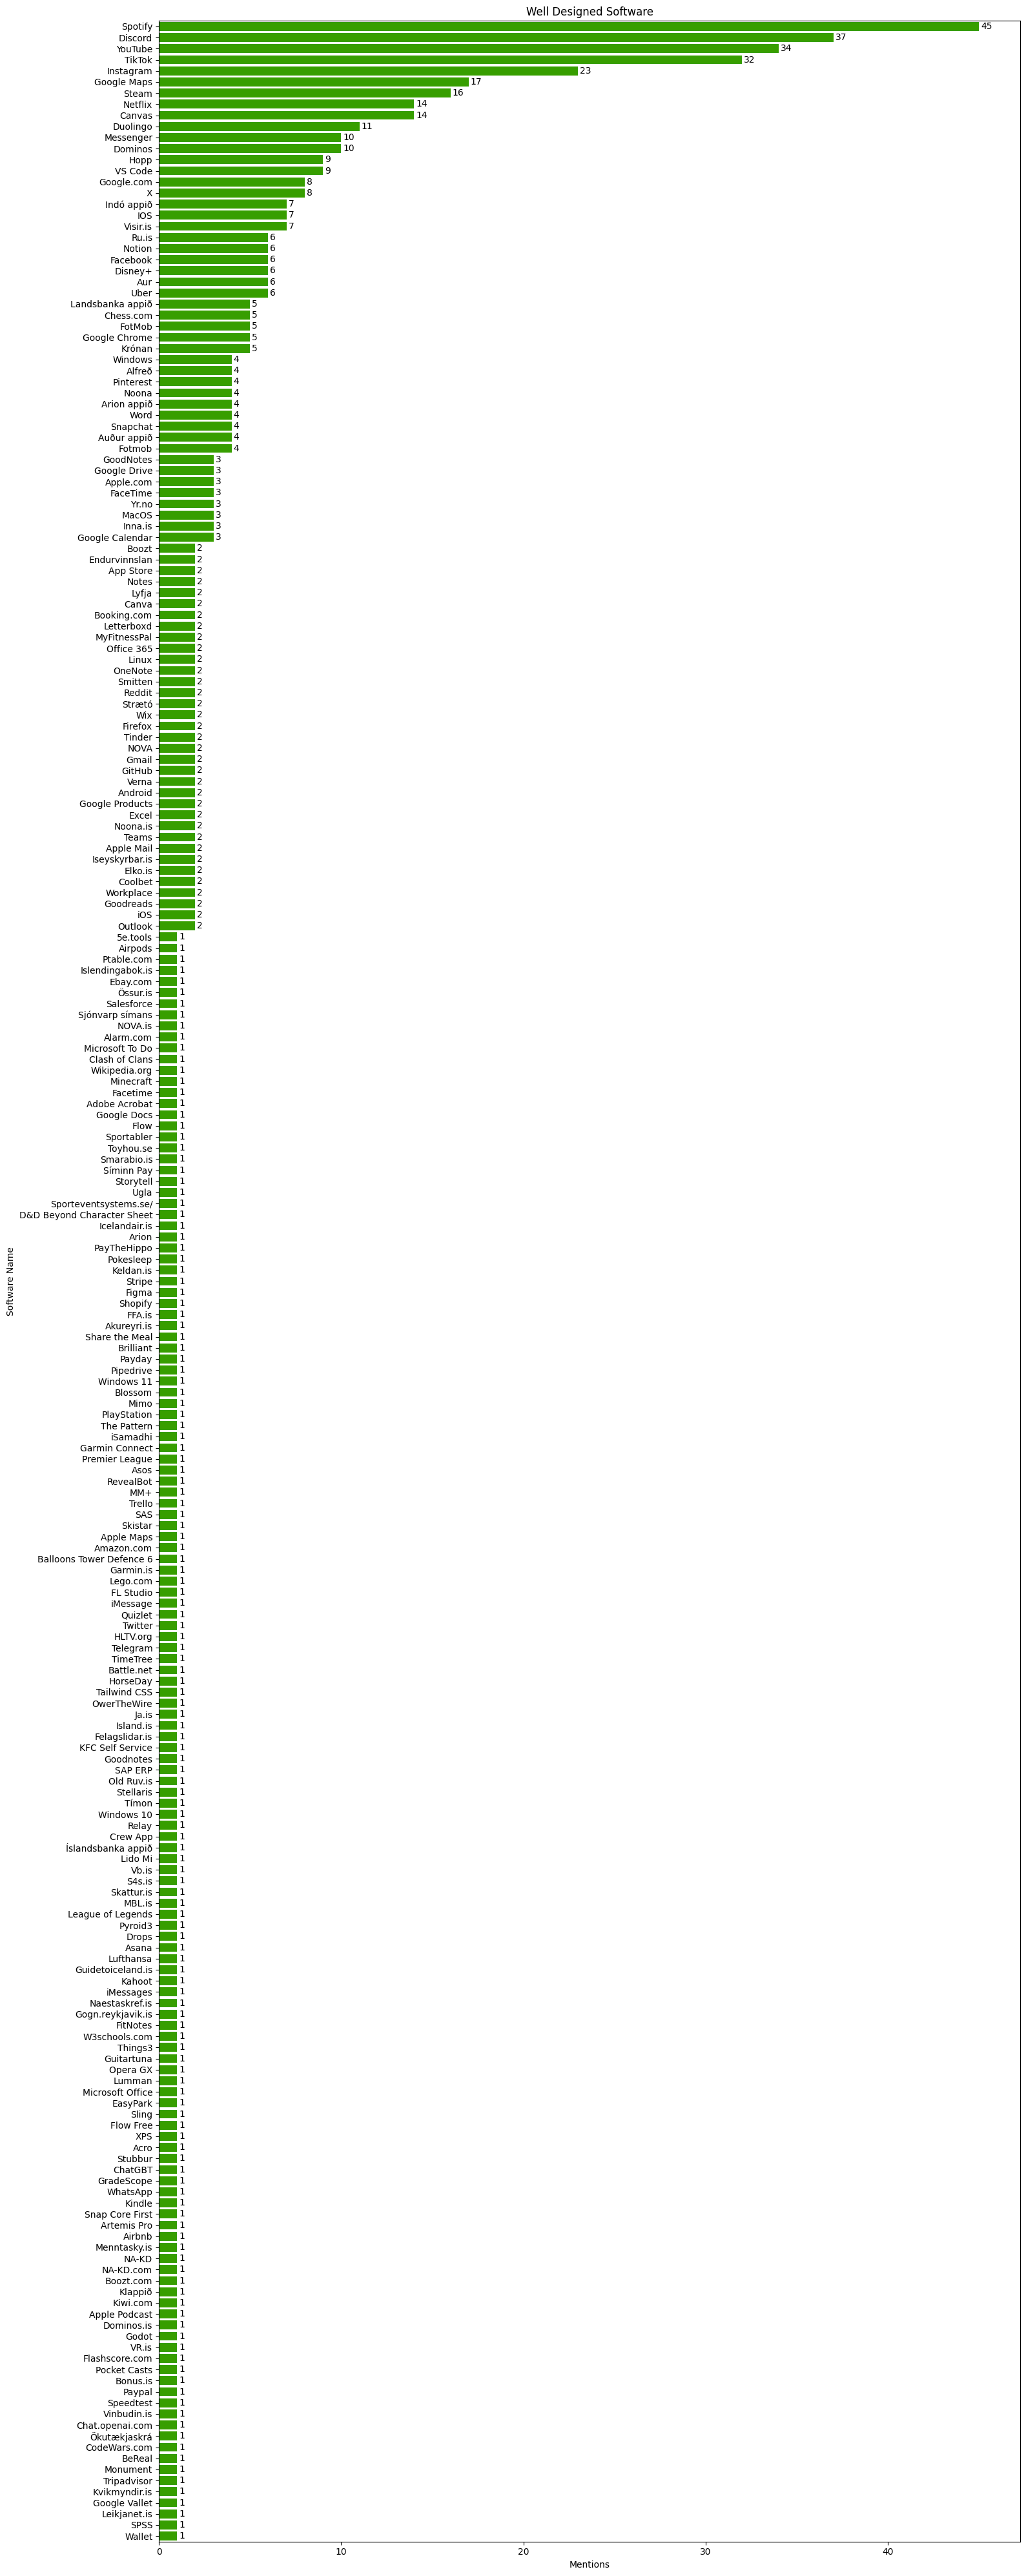

In [7]:
good_counts = df_all_good['softwareName'].value_counts()

#Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(16, 40))  # Adjust the figure size as needed
bars = plt.barh(good_counts.index, good_counts, color=green, height=0.8)  # Adjust the height as needed
plt.ylabel('Software Name')
plt.xlabel('Mentions')
plt.title('Well Designed Software')

# Add value annotations to each bar
for bar, value in zip(bars, good_counts):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center')

# Set y-axis limits to remove extra space
plt.ylim(len(good_counts) - 0.5, -0.5)

plt.tight_layout()
plt.show()

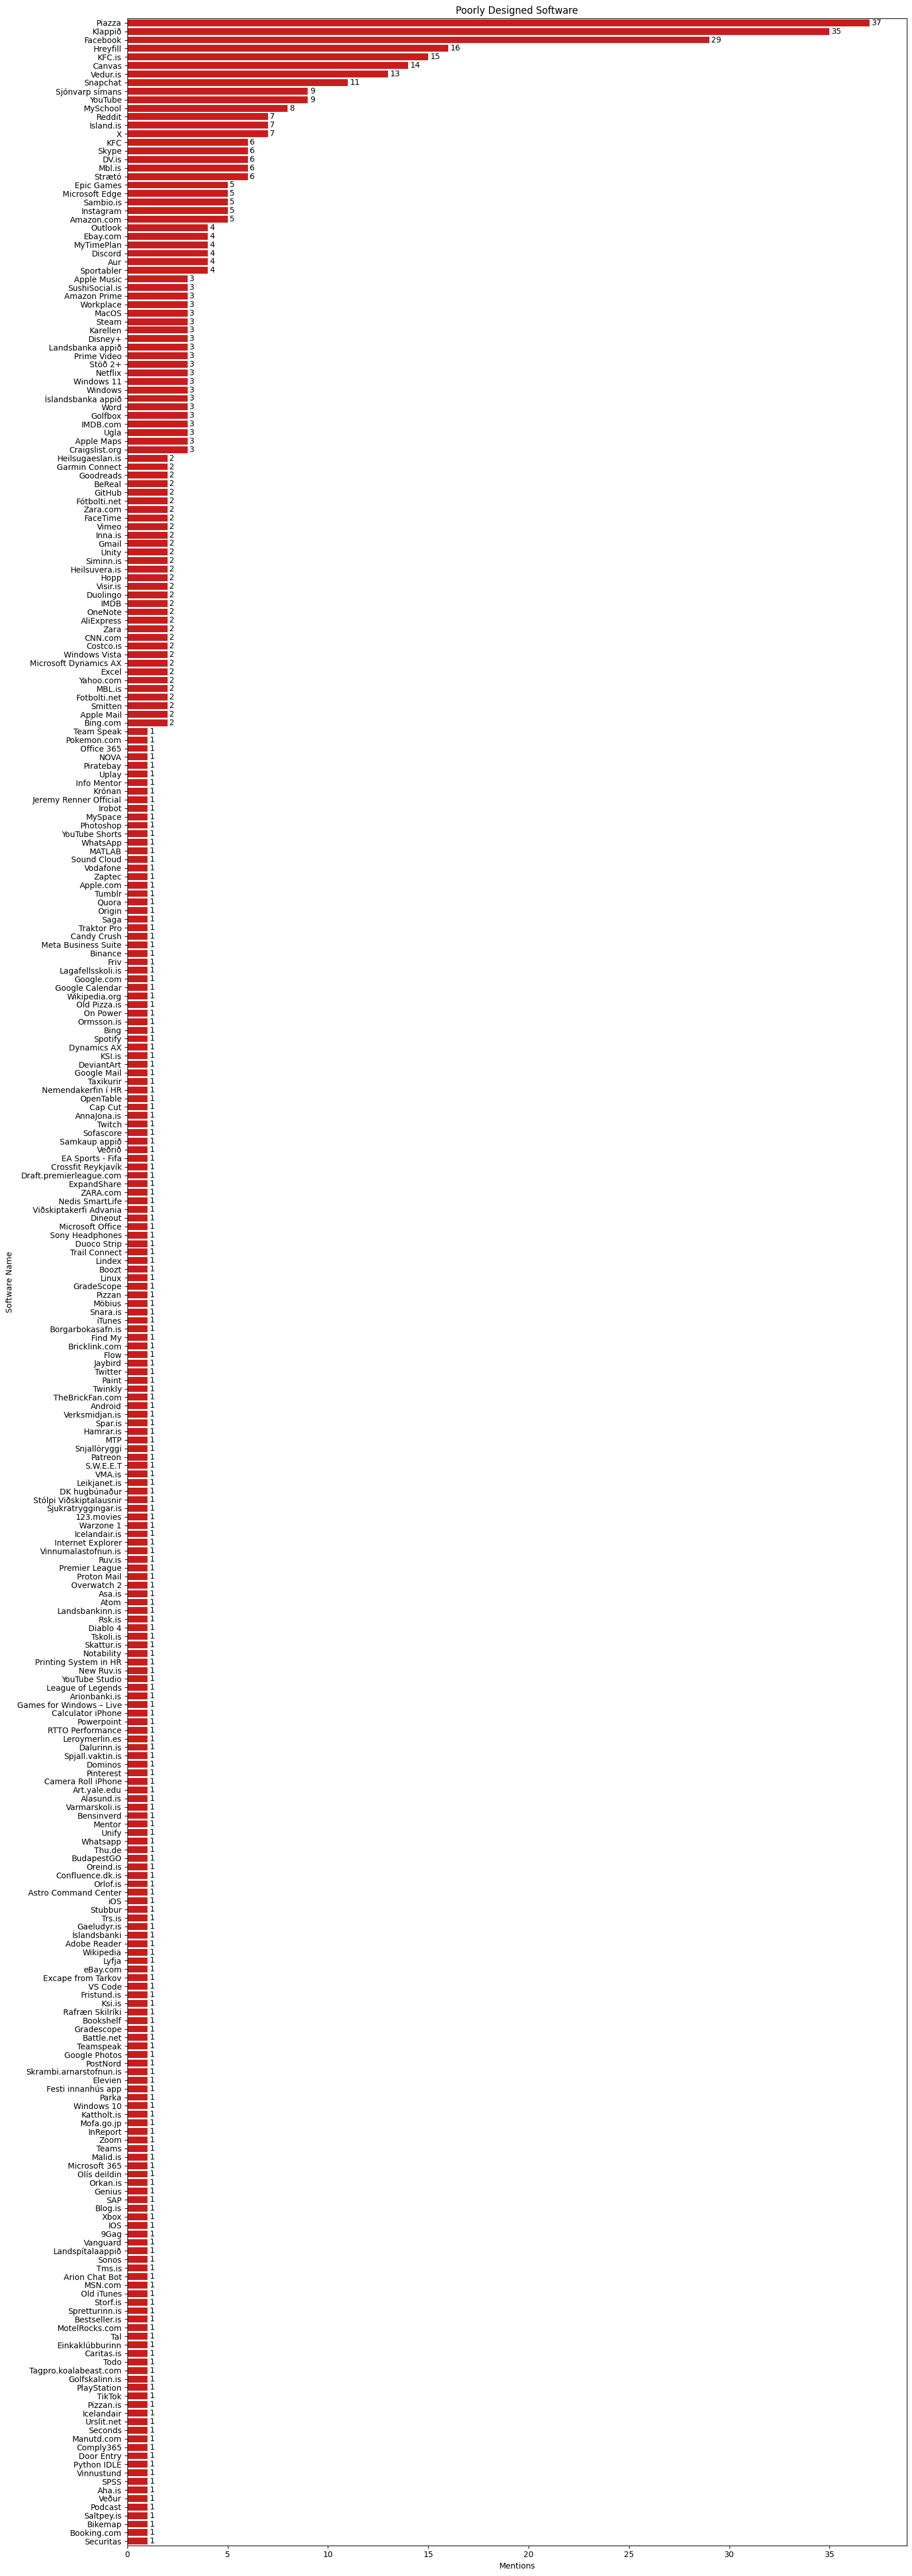

In [8]:
bad_counts = df_all_bad['softwareName'].value_counts()

#Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(16, 45))  # Adjust the figure size as needed
bars = plt.barh(bad_counts.index, bad_counts, color=red, height=0.8)  # Adjust the height as needed
plt.ylabel('Software Name')
plt.xlabel('Mentions')
plt.title('Poorly Designed Software')

# Add value annotations to each bar
for bar, value in zip(bars, bad_counts):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center')

# Set y-axis limits to remove extra space
plt.ylim(len(bad_counts) - 0.5, -0.5)

plt.tight_layout()
plt.show()

In [9]:
# Extracting unique software names and their vote counts
votes_count = df_all_good['softwareName'].value_counts()

# Grouping by software name and finding the most common software type
most_common_type = df_all_good.groupby('softwareName')['softwareType'].agg(lambda x: x.value_counts().index[0])

# Creating a table with software names, types, and votes
table = pd.DataFrame({
    'Software Names': votes_count.index,
    'Software Type': most_common_type[votes_count.index],  # Use the most common type for each software name
    'Number of Mentions': votes_count.values
})

# Adding a new column for the rank starting from 1
table['Rank'] = range(1, len(table) + 1)

# Reordering the columns
table = table[['Rank', 'Software Names', 'Software Type', 'Number of Mentions']]

# Reset the index to remove the 'Software Names' index
table.reset_index(drop=True, inplace=True)

# Displaying the table
pd.set_option('display.max_rows', None)
print(table)

     Rank              Software Names           Software Type  Number of Mentions
0       1                     Spotify              Mobile App                  45
1       2                     Discord             Desktop App                  37
2       3                     YouTube          Mobile/Web App                  34
3       4                      TikTok              Mobile App                  32
4       5                   Instagram              Mobile App                  23
5       6                 Google Maps              Mobile App                  17
6       7                       Steam             Desktop App                  16
7       8                     Netflix       Mobile/Web/TV App                  14
8       9                      Canvas          Mobile/Web App                  14
9      10                    Duolingo              Mobile App                  11
10     11                   Messenger              Mobile App                  10
11     12       

In [10]:
# Extracting unique software names and their vote counts
votes_count = df_all_bad['softwareName'].value_counts()

# Grouping by software name and finding the most common software type
most_common_type = df_all_bad.groupby('softwareName')['softwareType'].agg(lambda x: x.value_counts().index[0])

# Creating a table with software names, types, and votes
table = pd.DataFrame({
    'Software Names': votes_count.index,
    'Software Type': most_common_type[votes_count.index],  # Use the most common type for each software name
    'Number of Mentions': votes_count.values
})

# Adding a new column for the rank starting from 1
table['Rank'] = range(1, len(table) + 1)

# Reordering the columns
table = table[['Rank', 'Software Names', 'Software Type', 'Number of Mentions']]

# Reset the index to remove the 'Software Names' index
table.reset_index(drop=True, inplace=True)

# Displaying the table
pd.set_option('display.max_rows', None)
print(table)


     Rank            Software Names       Software Type  Number of Mentions
0       1                    Piazza             Website                  37
1       2                   Klappið          Mobile App                  35
2       3                  Facebook      Mobile/Web App                  29
3       4                  Hreyfill          Mobile App                  16
4       5                    KFC.is             Website                  15
5       6                    Canvas      Mobile/Web App                  14
6       7                  Vedur.is             Website                  13
7       8                  Snapchat          Mobile App                  11
8       9           Sjónvarp símans   Mobile/Web/TV App                   9
9      10                   YouTube      Mobile/Web App                   9
10     11                  MySchool             Website                   8
11     12                    Reddit          Mobile App                   7
12     13   

# Top Well and Badly Designed Software

<ipython-input-11-489d7a7dd1b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_good['softwareNameWithType'] = df_all_good['softwareName'] + ' (' + df_all_good.groupby('softwareName')['softwareType'].transform(lambda x: x.mode()[0]) + ')'


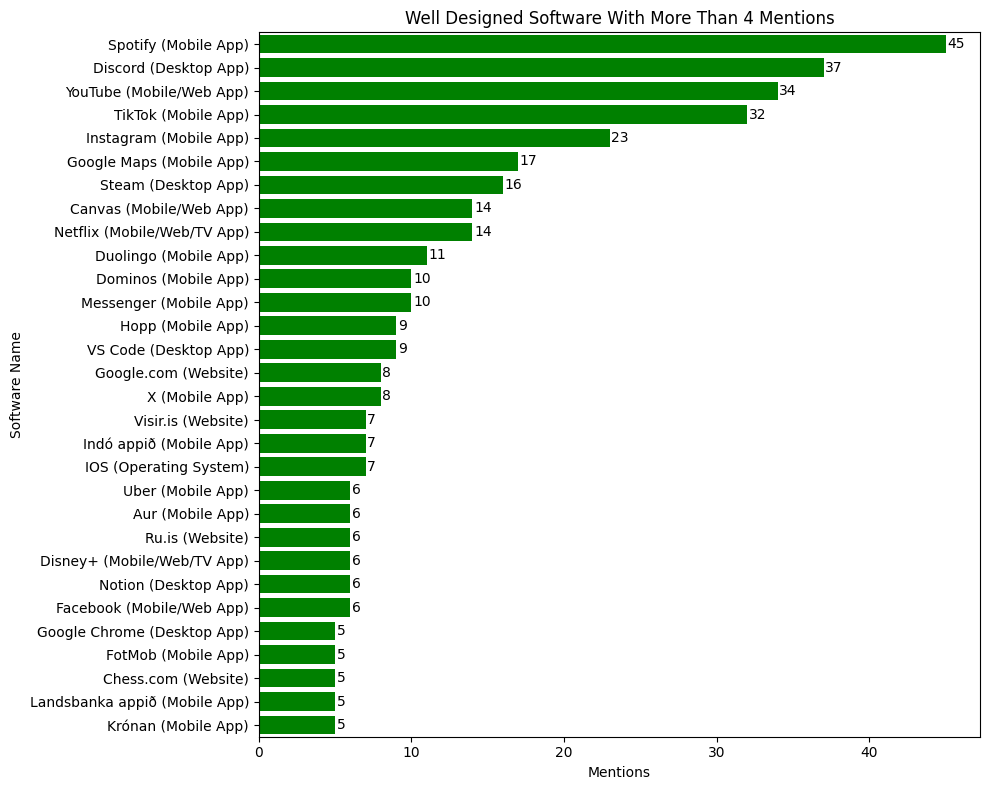

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate 'softwareName' and the mode of 'softwareType' for each 'softwareName'
df_all_good['softwareNameWithType'] = df_all_good['softwareName'] + ' (' + df_all_good.groupby('softwareName')['softwareType'].transform(lambda x: x.mode()[0]) + ')'

# Get the value counts for the concatenated software names
good_counts = df_all_good['softwareNameWithType'].value_counts()

# Filter the DataFrame based on software names with more than 4 mentions
filtered_df_good = df_all_good[df_all_good['softwareNameWithType'].isin(good_counts.index[good_counts > 4])]

# Get the value counts for the filtered software names
good_counts_top = filtered_df_good['softwareNameWithType'].value_counts()

# Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.barh(good_counts_top.index, good_counts_top, color='green', height=0.8)  # Adjust the height as needed
plt.ylabel('Software Name')
plt.xlabel('Mentions')
title = 'Well Designed Software With More Than 4 Mentions'
plt.title(title)

# Add value annotations to each bar
for bar, value in zip(bars, good_counts_top):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center')

# Set y-axis limits to remove extra space
plt.ylim(len(good_counts_top) - 0.5, -0.5)

plt.tight_layout()
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


In [12]:
votes_count = filtered_df_good['softwareName'].value_counts()

# Creating a table with software names and votes
table = pd.DataFrame({
    'Software Names': votes_count.index,
    'Number of Votes': votes_count.values
})
pd.set_option('display.max_rows', None)

print(table)

      Software Names  Number of Votes
0            Spotify               45
1            Discord               37
2            YouTube               34
3             TikTok               32
4          Instagram               23
5        Google Maps               17
6              Steam               16
7             Canvas               14
8            Netflix               14
9           Duolingo               11
10           Dominos               10
11         Messenger               10
12              Hopp                9
13           VS Code                9
14        Google.com                8
15                 X                8
16          Visir.is                7
17        Indó appið                7
18               IOS                7
19              Uber                6
20               Aur                6
21             Ru.is                6
22           Disney+                6
23            Notion                6
24          Facebook                6
25     Googl

<ipython-input-13-17a9b11b0f1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_bad['softwareNameWithType'] = df_all_bad['softwareName'] + ' (' + df_all_bad.groupby('softwareName')['softwareType'].transform(lambda x: x.mode()[0]) + ')'


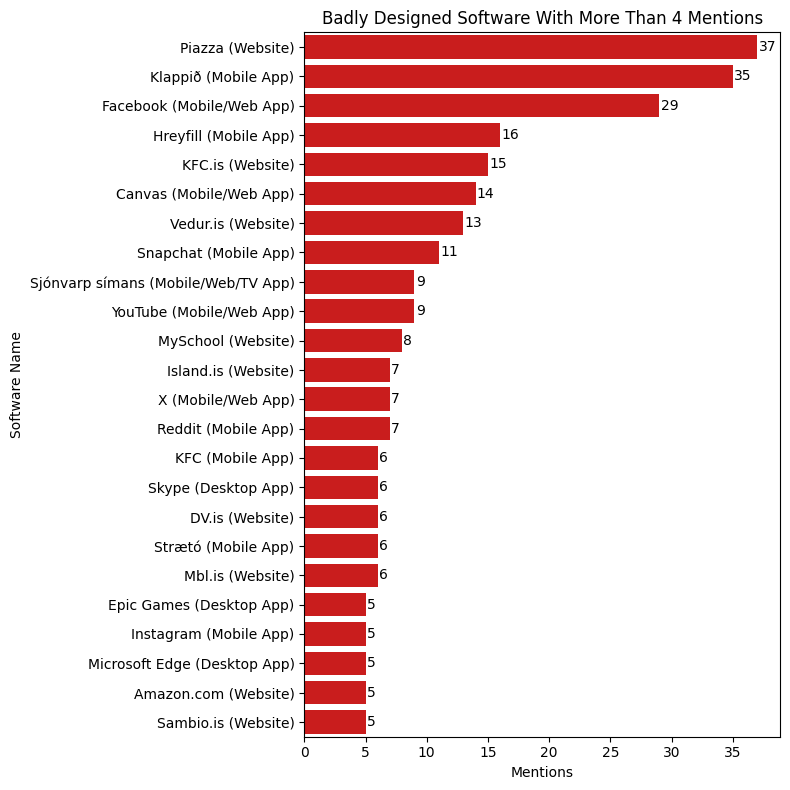

In [13]:
# Concatenate 'softwareName' and the mode of 'softwareType' for each 'softwareName' in the bad DataFrame
df_all_bad['softwareNameWithType'] = df_all_bad['softwareName'] + ' (' + df_all_bad.groupby('softwareName')['softwareType'].transform(lambda x: x.mode()[0]) + ')'

# Get the value counts for the concatenated software names
bad_counts = df_all_bad['softwareNameWithType'].value_counts()

# Filter the DataFrame based on software names with more than 4 mentions
filtered_df_bad = df_all_bad[df_all_bad['softwareNameWithType'].isin(bad_counts.index[bad_counts > 4])]

# Get the value counts for the filtered software names
bad_counts_top = filtered_df_bad['softwareNameWithType'].value_counts()

# Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
bars = plt.barh(bad_counts_top.index, bad_counts_top, color=red, height=0.8)  # Adjust the height as needed
plt.ylabel('Software Name')
plt.xlabel('Mentions')
title = 'Badly Designed Software With More Than 4 Mentions'
plt.title(title)

# Add value annotations to each bar
for bar, value in zip(bars, bad_counts_top):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center')

# Set y-axis limits to remove extra space
plt.ylim(len(bad_counts_top) - 0.5, -0.5)

plt.tight_layout()
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


In [14]:
votes_count = filtered_df_bad['softwareName'].value_counts()

# Creating a table with software names and votes
table = pd.DataFrame({
    'Software Names': votes_count.index,
    'Number of Mentions': votes_count.values
})
pd.set_option('display.max_rows', None)

print(table)

     Software Names  Number of Mentions
0            Piazza                  37
1           Klappið                  35
2          Facebook                  29
3          Hreyfill                  16
4            KFC.is                  15
5            Canvas                  14
6          Vedur.is                  13
7          Snapchat                  11
8   Sjónvarp símans                   9
9           YouTube                   9
10         MySchool                   8
11        Island.is                   7
12                X                   7
13           Reddit                   7
14              KFC                   6
15            Skype                   6
16            DV.is                   6
17           Strætó                   6
18           Mbl.is                   6
19       Epic Games                   5
20        Instagram                   5
21   Microsoft Edge                   5
22       Amazon.com                   5
23        Sambio.is                   5


# Distribution of Unique Software Voted

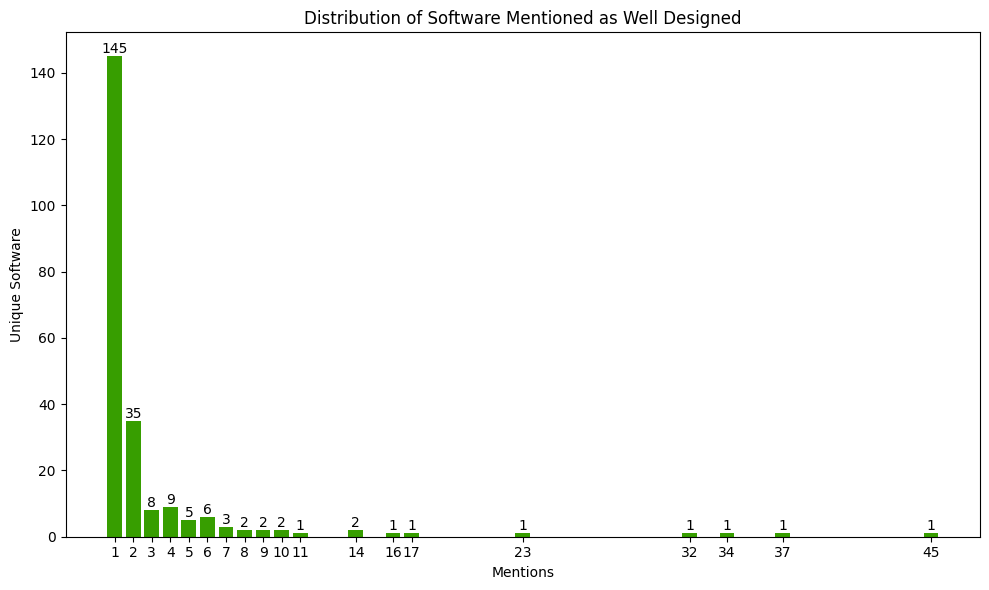

In [15]:
# Initialize an empty dictionary
count_dict = {}

# Iterate through the value counts
for app, count in good_counts.items():
    # Increment the count in the dictionary
    count_dict[count] = count_dict.get(count, 0) + 1

plt.figure(figsize=(10, 6))
counts, frequencies = zip(*count_dict.items())
bars = plt.bar(counts, frequencies, color=green)
plt.ylabel('Unique Software')
plt.xlabel('Mentions')
title = 'Distribution of Software Mentioned as Well Designed'
plt.title(title)

# Add annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(counts)

plt.tight_layout()
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

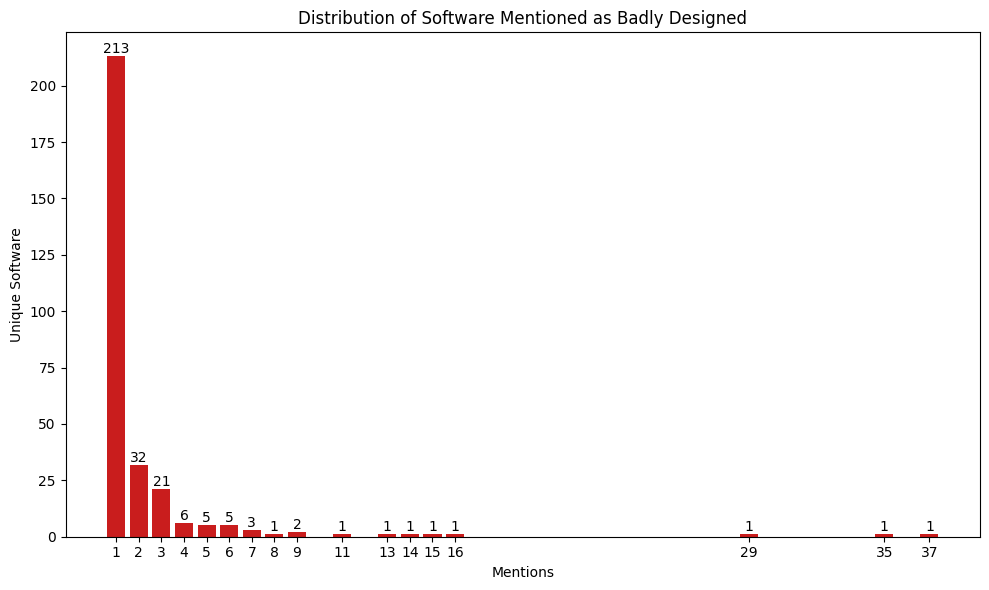

In [16]:
# Initialize an empty dictionary
count_dict = {}

# Iterate through the value counts
for app, count in bad_counts.items():
    # Increment the count in the dictionary
    count_dict[count] = count_dict.get(count, 0) + 1

# Convert dictionary to two lists for plotting
counts, frequencies = zip(*count_dict.items())

# Plot the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(counts, frequencies, color=red)
plt.xlabel('Mentions')
plt.ylabel('Unique Software')
title = 'Distribution of Software Mentioned as Badly Designed'
plt.title(title)

# Add annotations to each bar
for count, frequency in zip(counts, frequencies):
    plt.text(count, frequency, str(frequency), ha='center', va='bottom')

plt.xticks(counts)

plt.tight_layout()
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Software Types

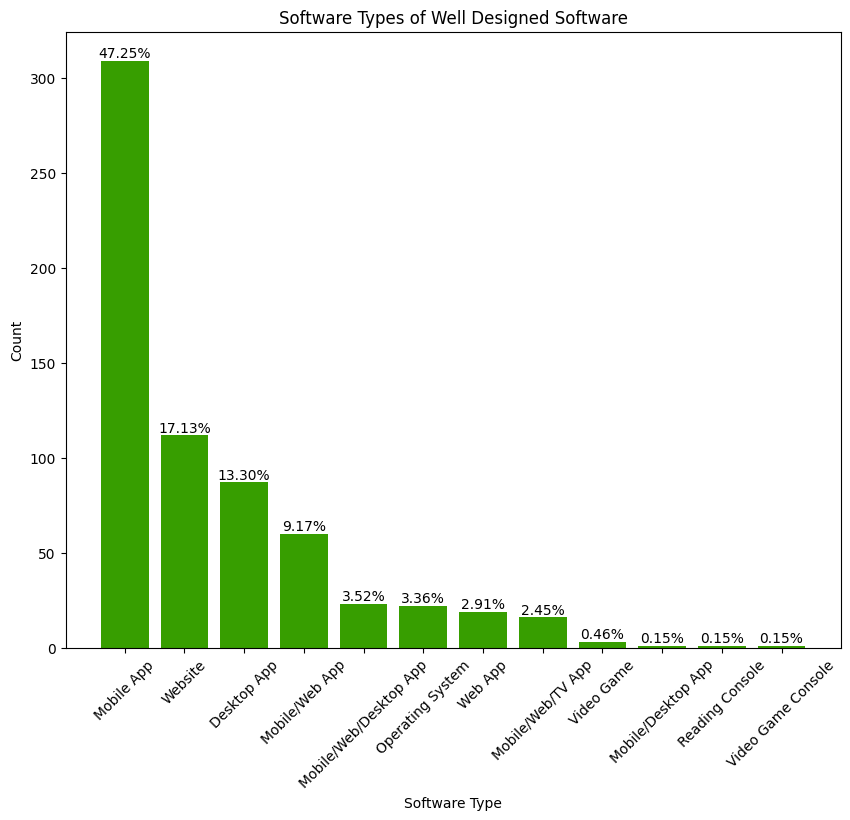

In [17]:
counts = df_all_good['softwareType'].value_counts()
# Calculate percentages
total = counts.sum()
percentages = counts / total * 100

# Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.bar(counts.index, counts, color=green)
plt.xlabel('Software Type')
plt.ylabel('Count')
title = 'Software Types of Well Designed Software'
plt.title(title)

# Add percentages to each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

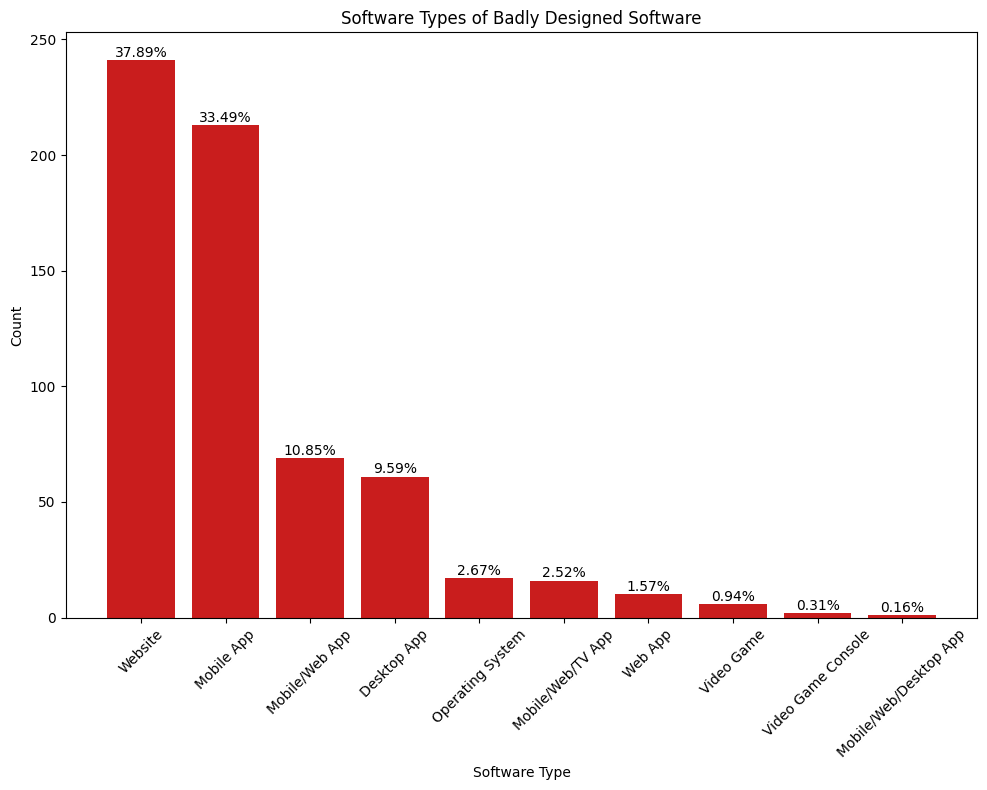

In [18]:
bad_counts = df_all_bad['softwareType'].value_counts()

# Calculate percentages
total_bad = bad_counts.sum()
percentages_bad = bad_counts / total_bad * 100

# Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.bar(bad_counts.index, bad_counts, color=red)
plt.xlabel('Software Type')
plt.ylabel('Count')
title = 'Software Types of Badly Designed Software'
plt.title(title)

# Add percentages to each bar
for bar, percentage in zip(bars, percentages_bad):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)

plt.tight_layout()
plt.show()

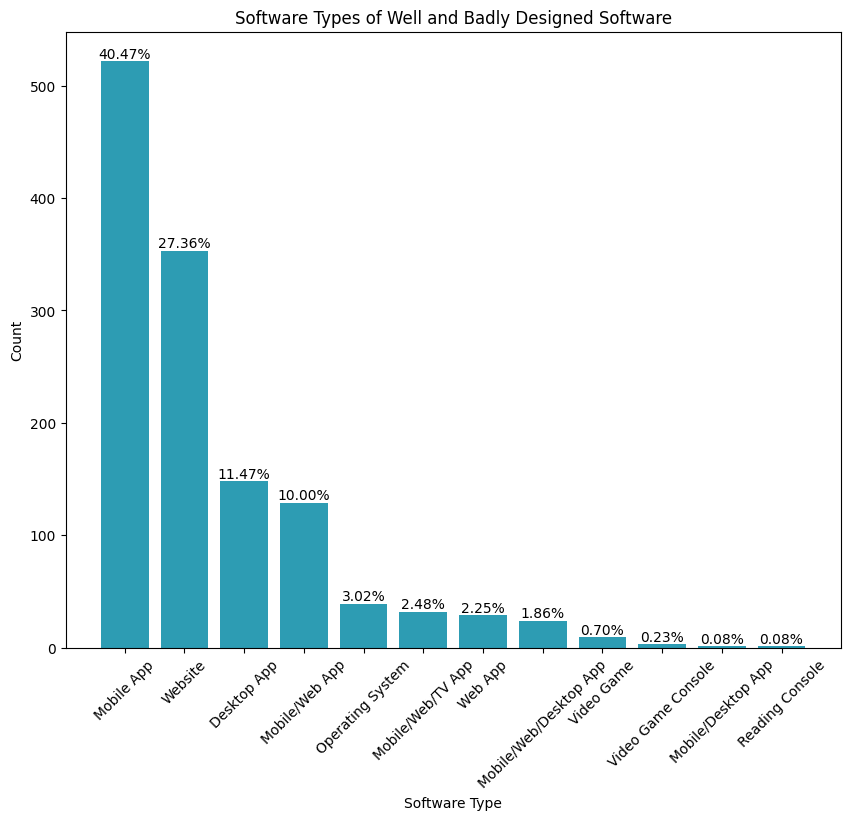

In [19]:
counts = df['softwareType'].value_counts()

# Calculate percentages
total = counts.sum()
percentages_bad = counts / total * 100

# Plot the horizontal bar chart with adjusted height and value annotations
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.bar(counts.index, counts, color=blue)
plt.xlabel('Software Type')
plt.ylabel('Count')
title = 'Software Types of Well and Badly Designed Software'
plt.title(title)

# Add percentages to each bar
for bar, percentage in zip(bars, percentages_bad):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# User ages

<ipython-input-20-a4fac9f33c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_age_df.dropna(subset=['age'], axis=0, inplace=True)


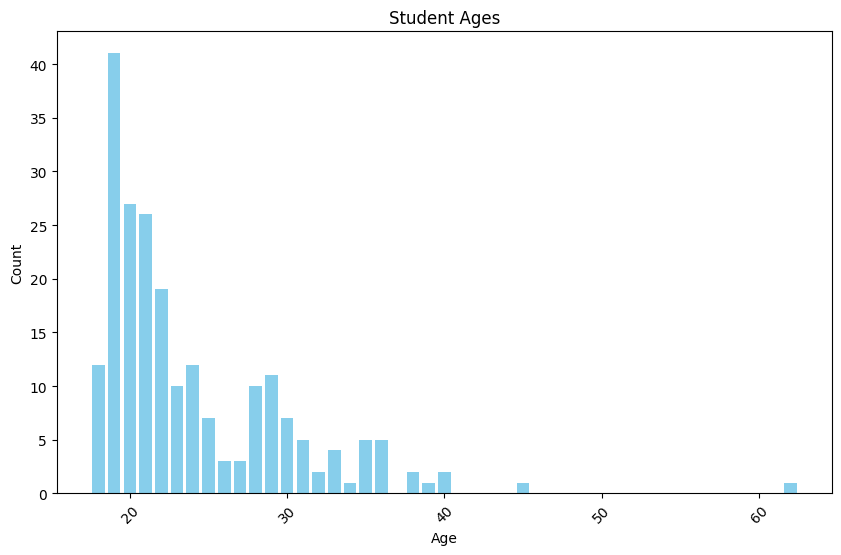

Average age: 23.972350230414747
Median age: 22.0


In [20]:
unique_age_df = df.drop_duplicates(subset=['submissionId', 'age'])
unique_age_df.dropna(subset=['age'], axis=0, inplace=True)

# Group by 'age', then count occurrences
age_counts = unique_age_df.groupby('age').size().reset_index(name='count')

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(age_counts['age'], age_counts['count'], color='skyblue')
title = 'Student Ages'
plt.title(title)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Calculate average and median
average_age = np.mean(unique_age_df['age'])
median_age = np.median(unique_age_df['age'])

# Print out the average and median
print("Average age:", average_age)
print("Median age:", median_age)

# Extra Information

In [21]:
# Counting total votes
total_votes = len(df)
total_considered_good = df['considersGood'].sum()
total_considered_bad = total_votes - total_considered_good

# Creating two separate tables
table_total = pd.DataFrame({
    'Total Considered Good Designed': [total_considered_good],
    'Total Considered Bad Designed': [total_considered_bad],
    'Total': [total_votes]
})

# Counting bad designs with at least one reason from top 8 bad
bad_designs_with_reasons = df_top_bad[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].any(axis=1).sum()
# Counting good designs with at least one reason from top 9 good
good_designs_with_reasons = df_top_good[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].any(axis=1).sum()
total = good_designs_with_reasons + bad_designs_with_reasons
table_reasons = pd.DataFrame({
    'Good Designs with Reasons': [good_designs_with_reasons],
    'Bad Designs with Reasons': [bad_designs_with_reasons],
    'Total': [total ]
})

# Printing tables
print("Total:")
print(table_total)

print("Total with reasons:")
print(table_reasons)

Total:
   Total Considered Good Designed  Total Considered Bad Designed  Total
0                             654                            636   1290
Total with reasons:
   Good Designs with Reasons  Bad Designs with Reasons  Total
0                        231                       167    398


In [22]:
unique_submission_count = df['submissionId'].nunique()
print("Unique submission count: ", unique_submission_count)

Unique submission count:  218


# Reasons Used for Top 9 Good and Top 8 Bad Software Design Opinions

## Functions

In [23]:
def add_reasons_to_hash(series, name, hash_map):
  series.dropna(inplace=True)
  reasons = series.values
  if name in hash_map:
    hash_map[name].extend(reasons)
  else:
    hash_map[name] = list(reasons)

In [24]:
def add_main_categories(df_good, sub_to_main_dict, name):
  software_good = df_good[df_good['softwareName'] == name].copy()

  # Apply the function to each row of the DataFrame
  software_good.loc[:, 'mainCategories'] = software_good.apply(lambda row: [subcategory_to_maincategory[col] for col in row[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].dropna()], axis=1)

  return software_good

In [25]:
def print_reasons_table(reasons_map, main_categories, index, isGood):
    # Initialize the matrix
    matrix = np.zeros((len(reasons_map), len(main_categories)), dtype=float)

    # Populate the matrix
    for i, (_, app_reasons) in enumerate(reasons_map.items()):
        # Count the occurrences of each category for the application
        category_counts = {category: app_reasons.count(category) for category in main_categories}

        # Calculate the total number of reasons for the application
        total_reasons = len(app_reasons)

        # Calculate the percentage of each category for the application
        for j, category in enumerate(main_categories):
            category_count = category_counts.get(category, 0)
            if total_reasons != 0:
                category_percentage = (category_count / total_reasons) * 100
            else:
                category_percentage = 0
            matrix[i, j] = category_percentage

    # Generate the table with colored text and background
    table = []
    if(isGood):
      for i, (app_name, _) in enumerate(reasons_map.items()):
          row = []
          max_percentage = max(matrix[i])
          for j in range(len(main_categories)):
              if matrix[i, j] == max_percentage and max_percentage != 0:
                  # Green background for the highest percentage
                  cell = f"\033[1;4;30;48;2;71;204;41m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] == 0:
                  # Empty cell for 0% values
                  cell = ""
              elif matrix[i, j] <= 10:
                  cell = f"\033[0;30;48;2;255;255;255m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] <= 20:
                  cell = f"\033[0;30;48;2;211;242;212m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] <= 35:
                  cell = f"\033[0;30;48;2;135;240;132m{matrix[i, j]:.2f}%\033[0m"
              else:
                  cell = f"{matrix[i, j]:.2f}%"
              row.append(cell)
          table.append(row)
    else:
      for i, (app_name, _) in enumerate(reasons_map.items()):
          row = []
          for j in range(len(main_categories)):
              if matrix[i, j] == max(matrix[i]) and max(matrix[i]) != 0:
                  # Red background for the highest percentage
                  cell = f"\033[1;4;30;48;2;255;133;117m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] == 0:
                  # Empty cell for 0% values
                  cell = ""
              elif matrix[i, j] <= 10:
                  cell = f"\033[0;30;48;2;255;255;255m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] <= 20:
                  cell = f"\033[0;30;48;2;255;242;189m{matrix[i, j]:.2f}%\033[0m"
              elif matrix[i, j] <= 35:
                  cell = f"\033[0;30;48;2;255;192;138m{matrix[i, j]:.2f}%\033[0m"
              else:
                  cell = f"{matrix[i, j]:.2f}%"
              row.append(cell)
          table.append(row)

    # Print the table with headers, index, and formatted cells
    print(tabulate(table, headers=main_categories, showindex=index, tablefmt="fancy_grid"))

In [26]:
import seaborn as sns
from termcolor import colored

def plot_main_reasons_for_designed_complex(name, distance, software_good, isGood):

    # Plot all the main categories
    main_categories = software_good['mainCategories'].explode()
    # Count occurrences of each main category
    main_category_counts = main_categories.value_counts()

    # Concatenate the reasons from multiple columns into a single Series
    sub_categories = pd.concat([software_good['reason1'], software_good['reason2'], software_good['reason3'],
                         software_good['reason4'], software_good['reason5'], software_good['reason6']])

    # Drop NaN values
    sub_categories = sub_categories.dropna()

    # Create a dictionary to store the counts of subcategories for each main category
    main_category_subcategory_counts = {main_cat: {subcategory: 0 for subcategory in subcategory_to_maincategory.keys()}
                                        for main_cat in main_categories}

    # Iterate through sub_categories and count subcategory occurrences for each main category
    for category in sub_categories:
        main_cat = subcategory_to_maincategory.get(category)
        if main_cat:
            main_category_subcategory_counts[main_cat][category] += 1

    # Filter out main categories with no subcategories
    main_category_subcategory_counts = {key: value for key, value in main_category_subcategory_counts.items() if any(value.values())}
    main_category_subcategory_counts = {key: {inner_key: inner_value for inner_key, inner_value in value.items() if inner_value != 0} for key, value in main_category_subcategory_counts.items()}

    # Create a DataFrame from the counts
    df_counts = pd.DataFrame(main_category_subcategory_counts).T

    # Order df_counts
    # Calculate the sum of each row
    row_sums = df_counts.sum(axis=1)

    # Sort the DataFrame based on the row sums (descending order)
    df_counts = df_counts.loc[row_sums.sort_values(ascending=False).index]

    plt.figure(figsize=(12, 6))
    ax = plt.gca()  # Get the current axes

    # Plot the DataFrame using the custom color palette
    df_counts.plot(kind='bar', stacked=True, ax=ax, color=[subcategories_palette.get(subcategory, '#999999') for subcategory in df_counts.columns])
    title = ''
    if(isGood):
      title = f'Reasons Used for {name} Being Well Designed'
    else:
      title = f'Reasons Used for {name} Being Badly Designed'
    plt.title(title)
    plt.xlabel('Main Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    total_count = df_counts.sum(axis=1).sum()

    if name == "Netflix":
        y_offset = 0.1
    else:
        y_offset = 0.25
    for x, y in enumerate(df_counts.sum(axis=1)):
        ax.annotate(f'{int(y)} ({(y/total_count) * 100:.2f}%)', (x, y+y_offset), ha='center')

    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -0.75
    if name == "Spotify" or name == "Discord":
      y_offset = -1
    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
            # Put the text in the middle of each bar. get_x returns the start
            # so we add half the width to get to the middle.
            bar.get_x() + bar.get_width() / 2,
            # Vertically, add the height of the bar to the start of the bar,
            # along with the offset.
            bar.get_height() + bar.get_y() + y_offset,
            # This is actual value we'll show.
            round(bar.get_height()),
            # Center the labels and style them a bit.
            ha='center',
            color='w',
            weight='bold',
            size=9
        )

    # Create legend entries for each main category with their respective subcategories
    legend_handles = []
    legend_labels = []
    for main_cat, subcat_dict in main_category_subcategory_counts.items():
        legend_handles.append(plt.Rectangle((0,0),1,1, color='white'))
        #legend_labels.append('• ' + f'{main_cat}' + ' •')
        legend_labels.append(r'$\bf{' + main_cat.replace(" ", r"\ ") + '}$')


        for subcat, count in subcat_dict.items():
            color = subcategories_palette.get(subcat, '#999999')
            legend_handles.append(plt.Rectangle((0,0),1,1, color=color))
            legend_labels.append(f'{subcat}')

    # Add combined legend to the plot
    ax.legend(legend_handles, legend_labels, title='Main and Subcategories', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

    plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

    return main_categories

In [27]:
def plot_main_reasons_for_designed_simple(name, color, distance, software, isGood):

    main_categories = software['mainCategories'].explode()

    # Count occurrences of each main category
    main_category_counts = main_categories.value_counts()

    # Plot the main category counts
    plt.figure(figsize=(10, 6))
    ax = main_category_counts.plot(kind='bar', color=color)

    # Set title based on isGood
    if isGood:
        plt.title(f'Reasons Used for {name} Being Well Designed')
    else:
        plt.title(f'Reasons Used for {name} Being Badly Designed')

    plt.xlabel('Main Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add percentage and count on top of each bar
    total_height = len(main_categories)
    min_distance = distance  # Minimum distance from the top of the plot
    for i in ax.patches:
        # Calculate the position for the text
        bar_height = i.get_height()
        text_height = min(bar_height + total_height * 0.01, ax.get_ylim()[1] - min_distance)
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x() + i.get_width() / 2, text_height,
                f"{int(bar_height)} ({round((bar_height / total_height) * 100, 2)}%)", ha='center', fontsize=10)

    plt.show()

    return main_categories

In [28]:
def plot_sub_reasons_for_designed_simple(name, color, distance, df_software, isGood):
    software_good = df_software[df_software['softwareName'] == name]

    # Concatenate the reasons from multiple columns into a single Series
    reasons = pd.concat([software_good['reason1'], software_good['reason2'], software_good['reason3'], software_good['reason4'], software_good['reason5'], software_good['reason6']])

    # Drop NaN values
    reasons = reasons.dropna()

    # Count the occurrences of each reason
    reason_counts = reasons.value_counts()

    # Plot the most common reasons
    plt.figure(figsize=(12, 6))
    ax = reason_counts.plot(kind='bar', color=color)

    # Set title based on isGood
    if isGood:
        plt.title(f'Reasons Used for {name} Being Well Designed')
    else:
        plt.title(f'Reasons Used for {name} Being Badly Designed')

    plt.xlabel('Subcategories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add percentage and count on top of each bar
    total_height = len(reasons)
    min_distance = distance  # Minimum distance from the top of the plot
    for i in ax.patches:
        # Calculate the position for the text
        bar_height = i.get_height()
        text_height = min(bar_height + total_height * 0.01, ax.get_ylim()[1] - min_distance)
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x() + i.get_width() / 2, text_height,
                f"{int(bar_height)} ({round((bar_height / total_height) * 100, 2)}%)", ha='center', fontsize=10)

    plt.show()

    return reasons

## Main Categories Used for Good Software Design Opinions

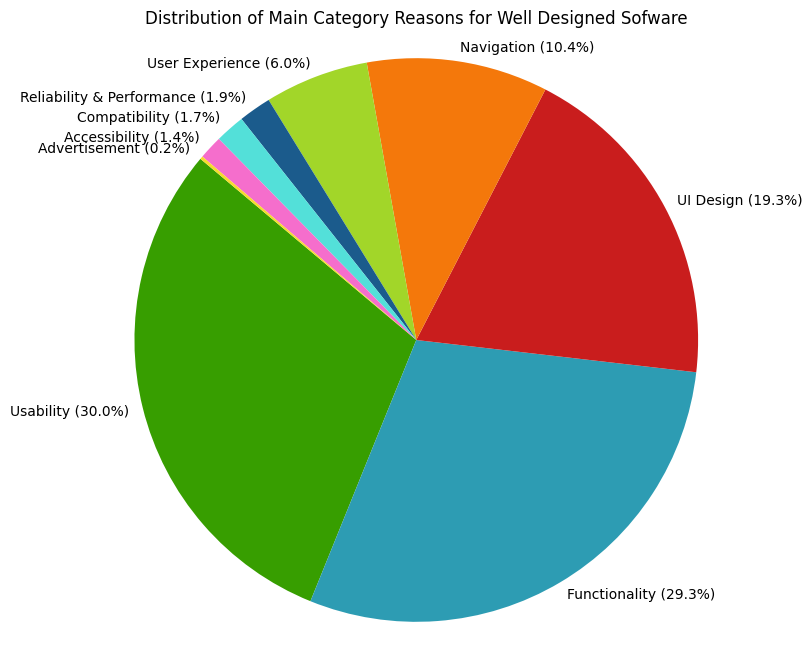

In [29]:
software_df_with_main_categories = pd.DataFrame()

for name, info in data_good_software.items():
    software_df_with_main_categories = pd.concat([software_df_with_main_categories, add_main_categories(df_top_good, subcategory_to_maincategory, name)], ignore_index=True)

# Count the occurrences of each main category
category_counts = software_df_with_main_categories['mainCategories'].explode().value_counts()

# Calculate the percentage for each category
percentages = category_counts / category_counts.sum() * 100

# Get colors from the custom palette based on main categories
colors = [maincategories_palette.get(category, 'gray') for category in category_counts.index]

# Create labels with main category names and percentage values
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, percentages)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(category_counts, labels=labels, startangle=140, colors=colors, labeldistance=1.05)

title = 'Distribution of Main Category Reasons for Well Designed Sofware'
plt.title(title)
plt.axis('equal')
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

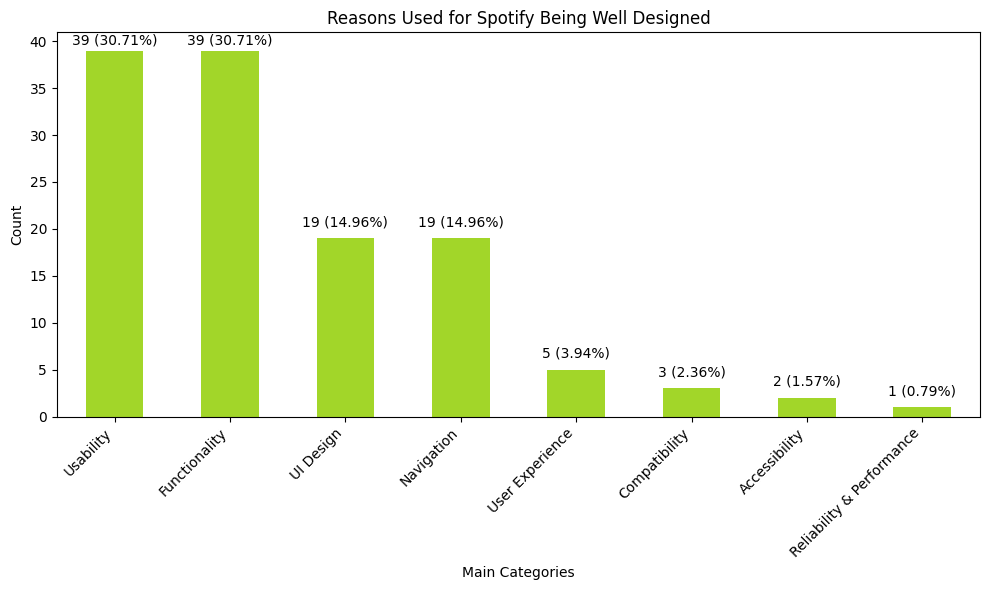

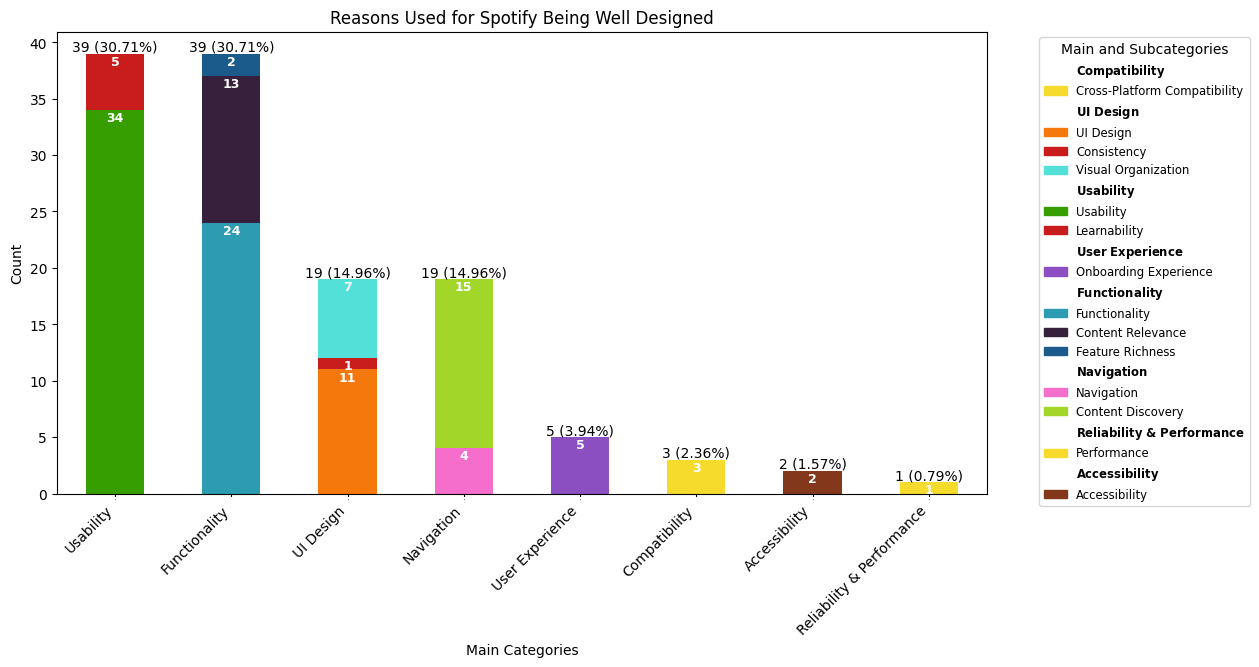

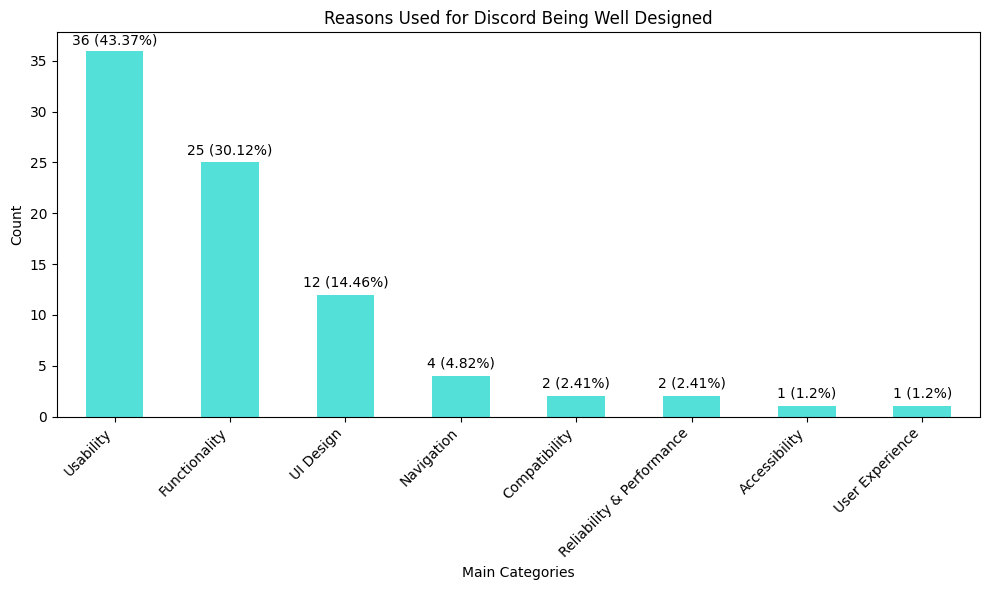

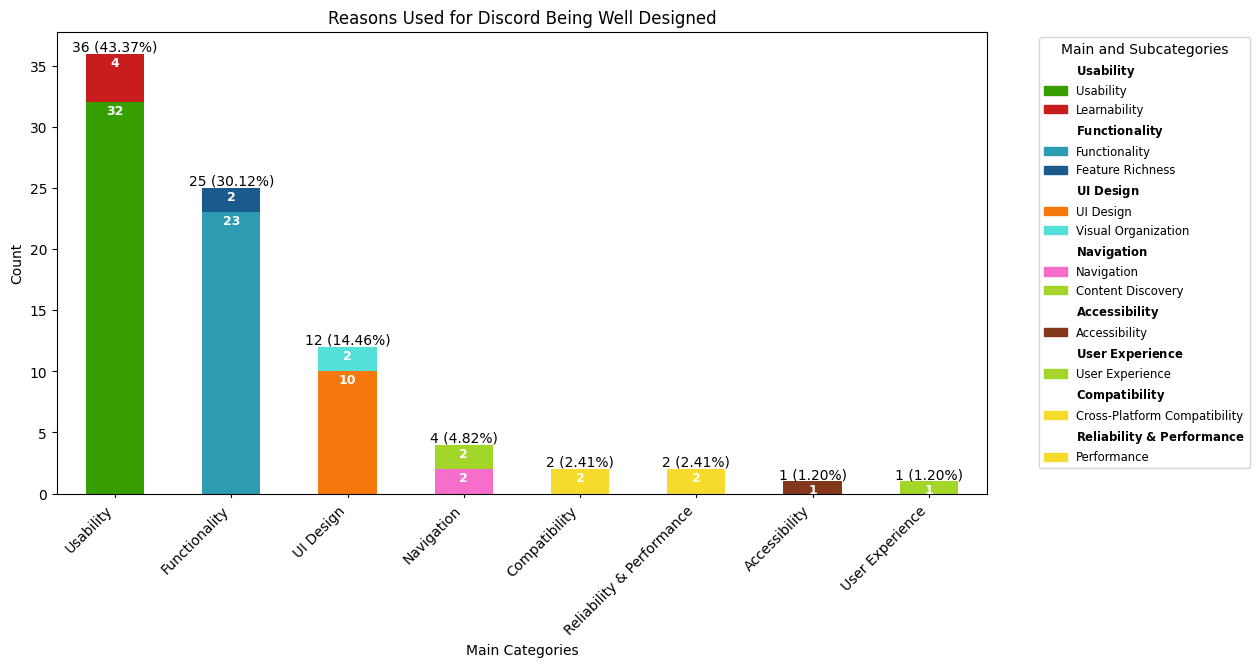

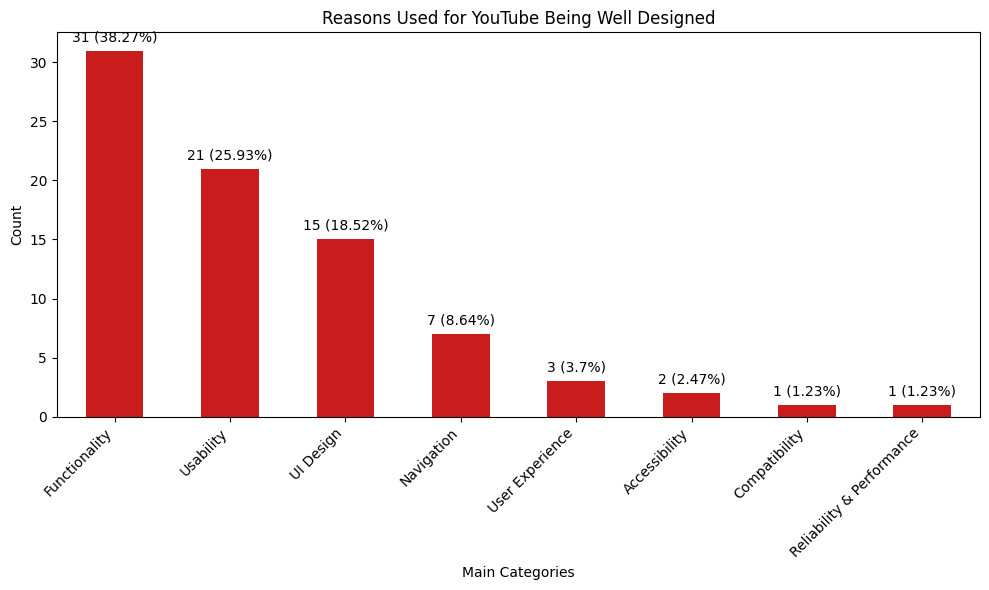

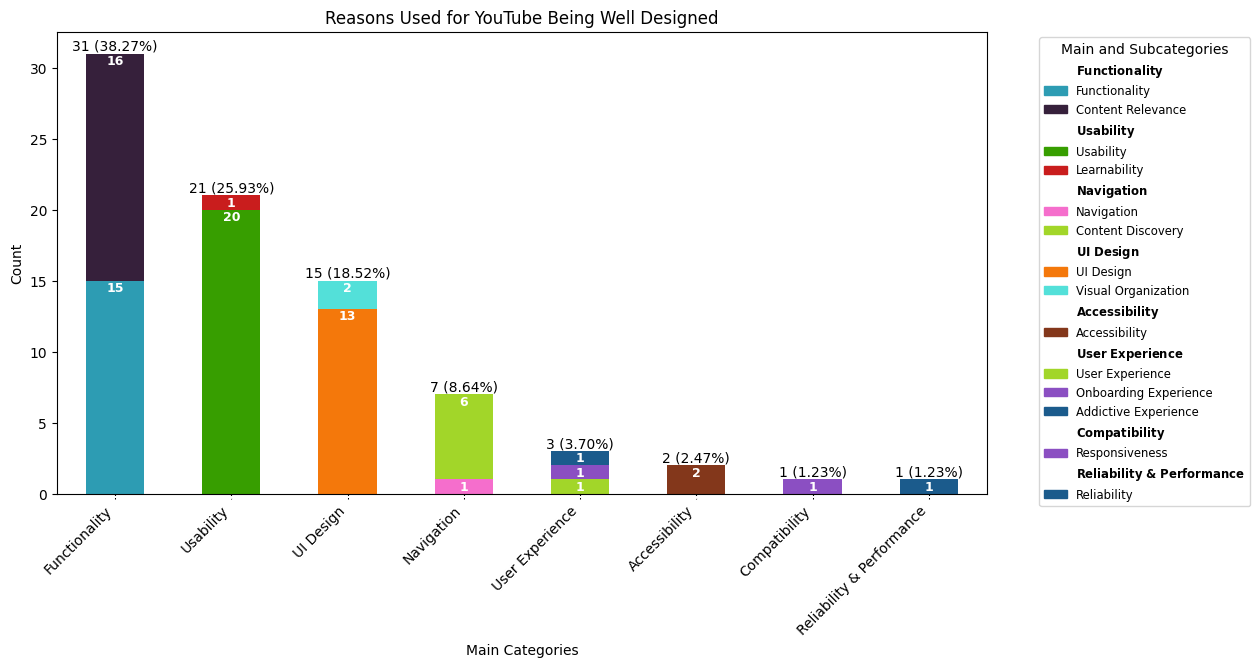

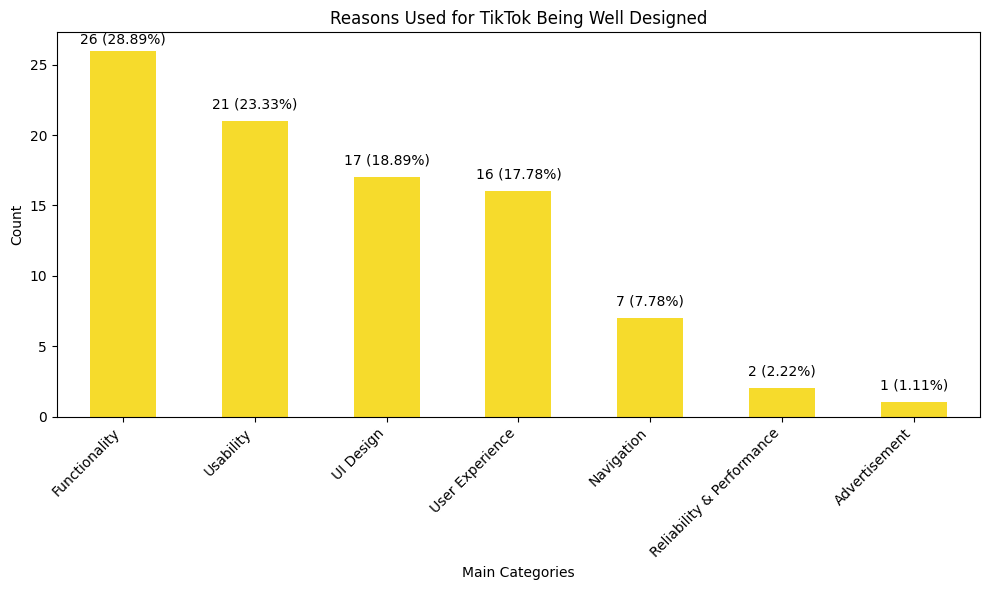

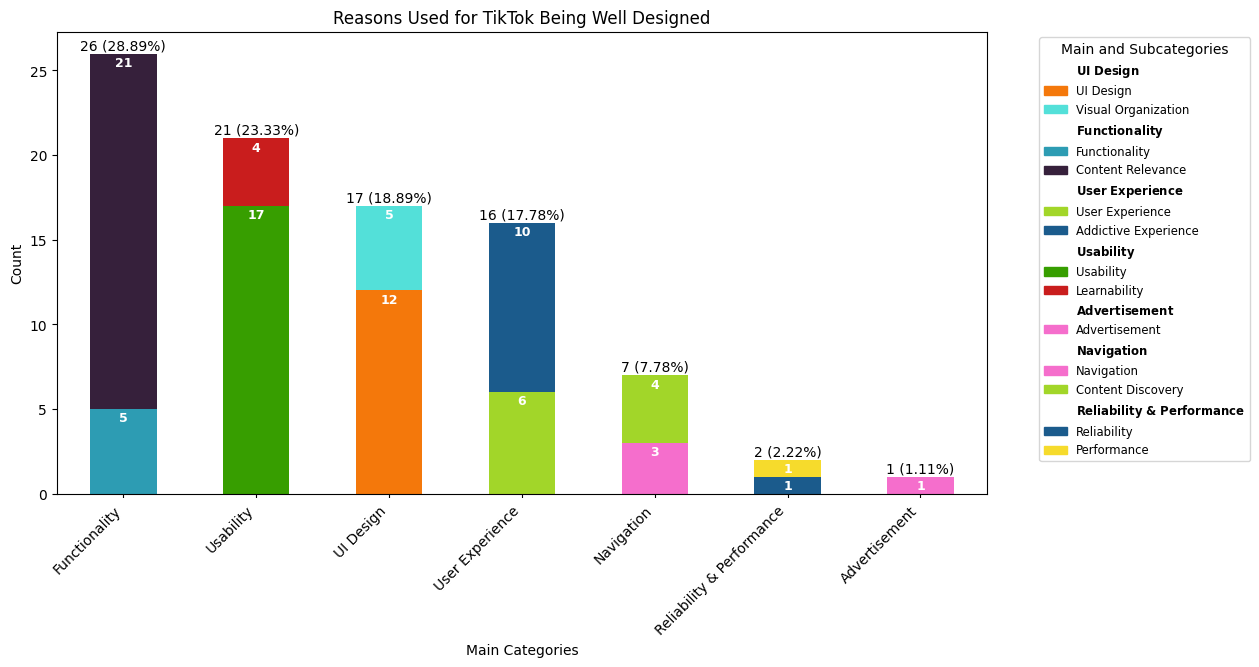

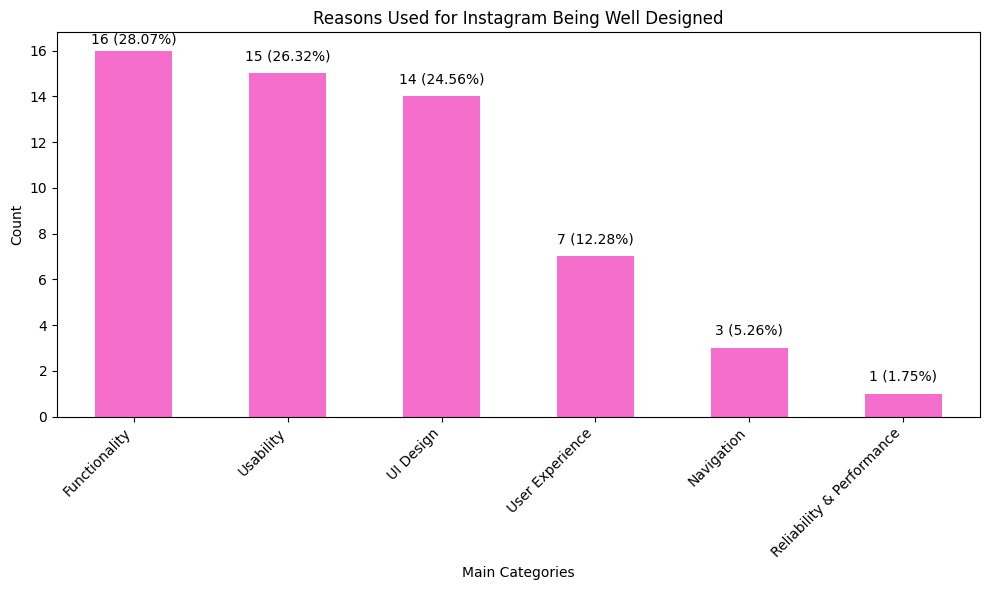

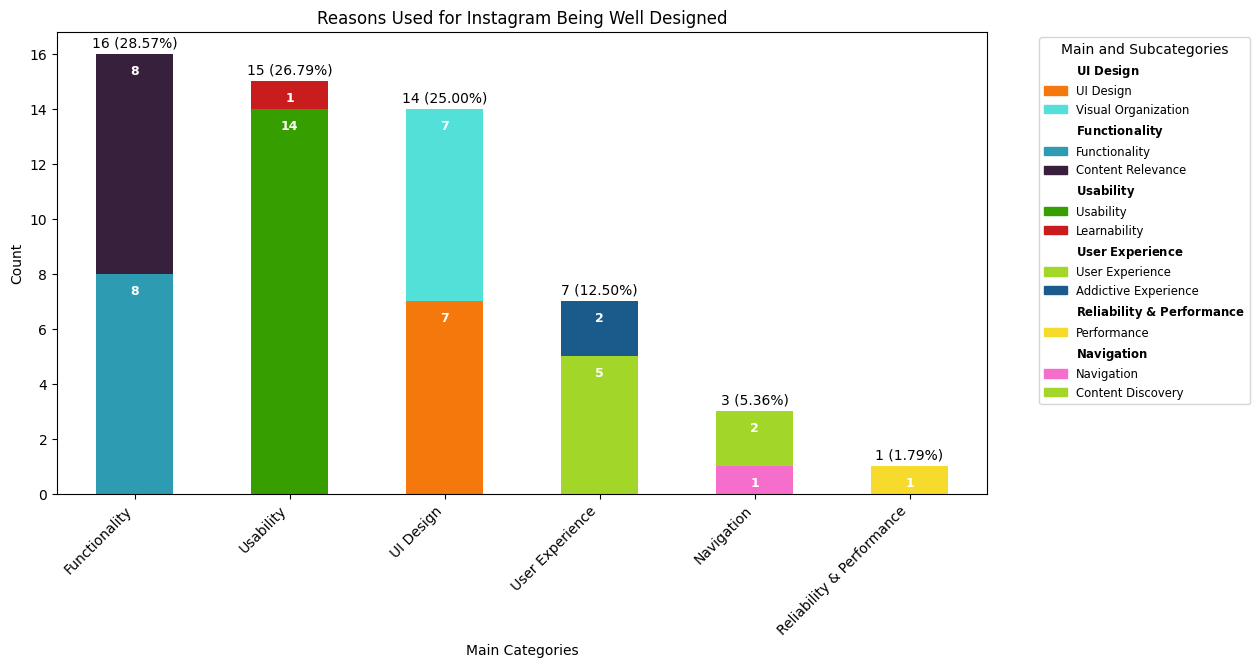

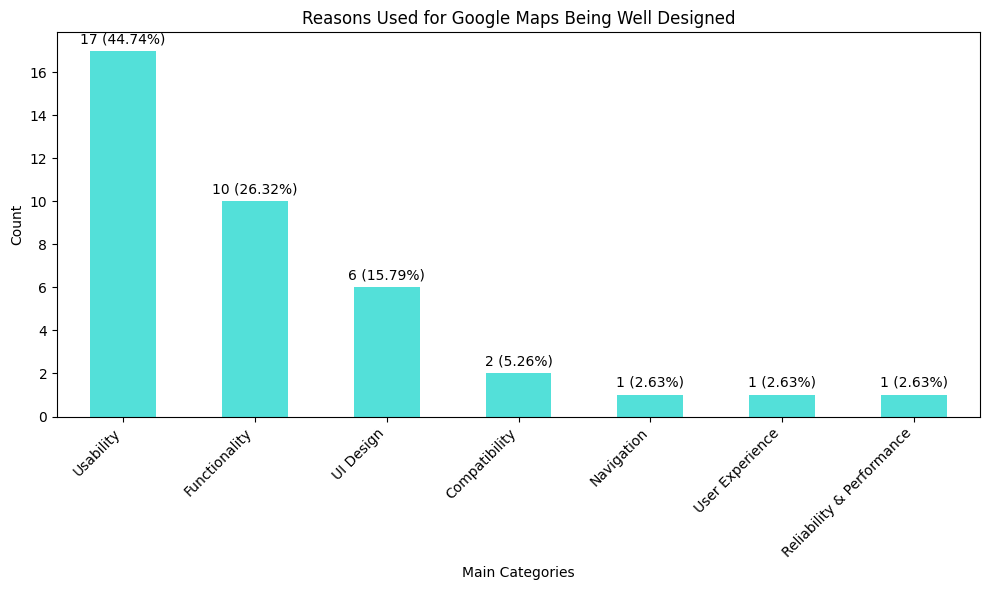

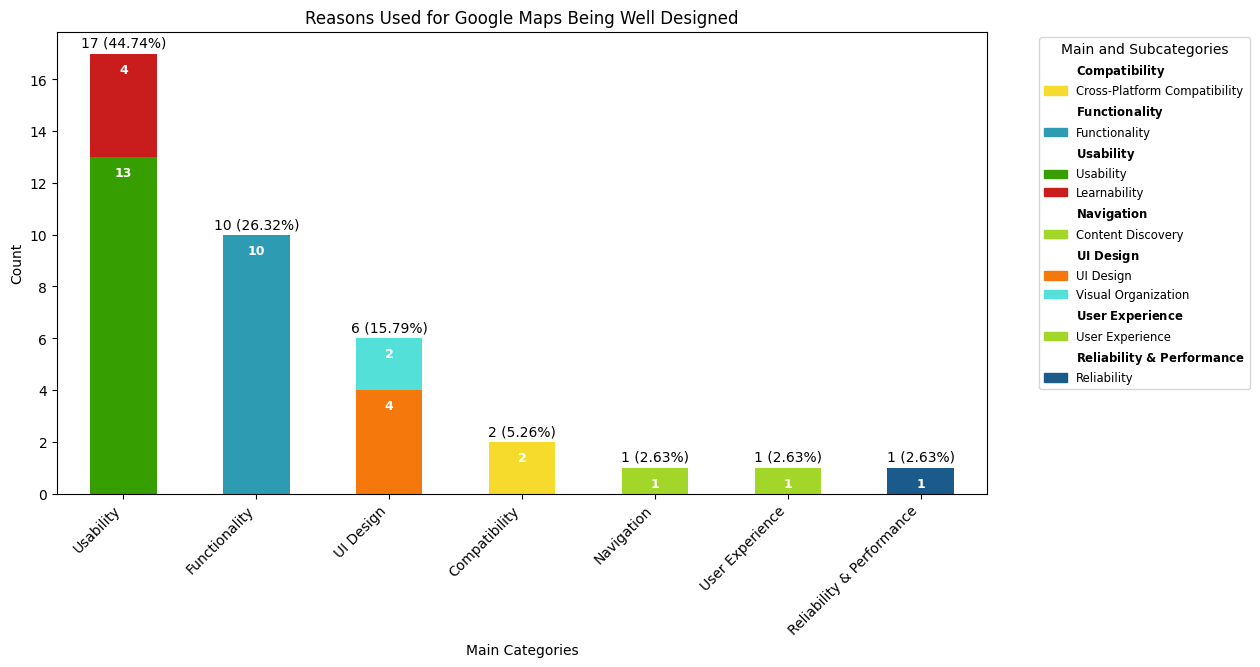

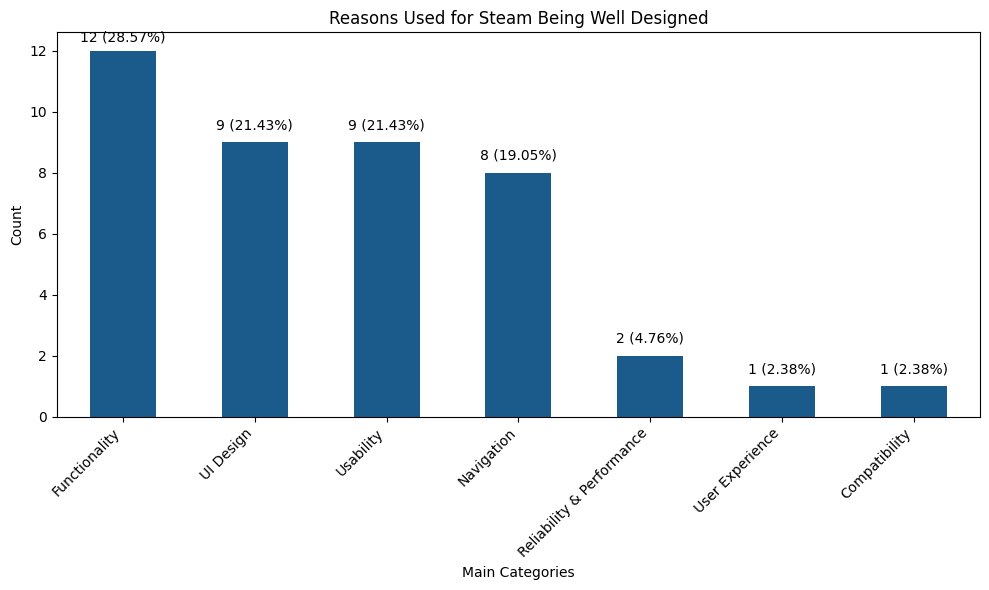

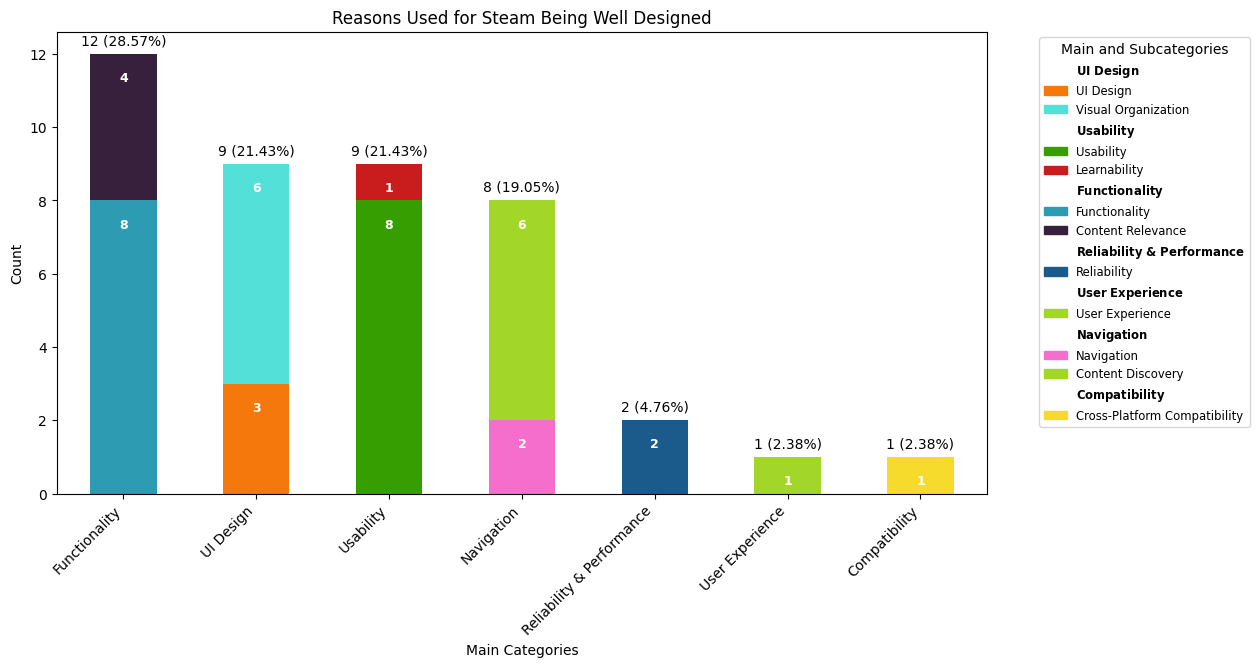

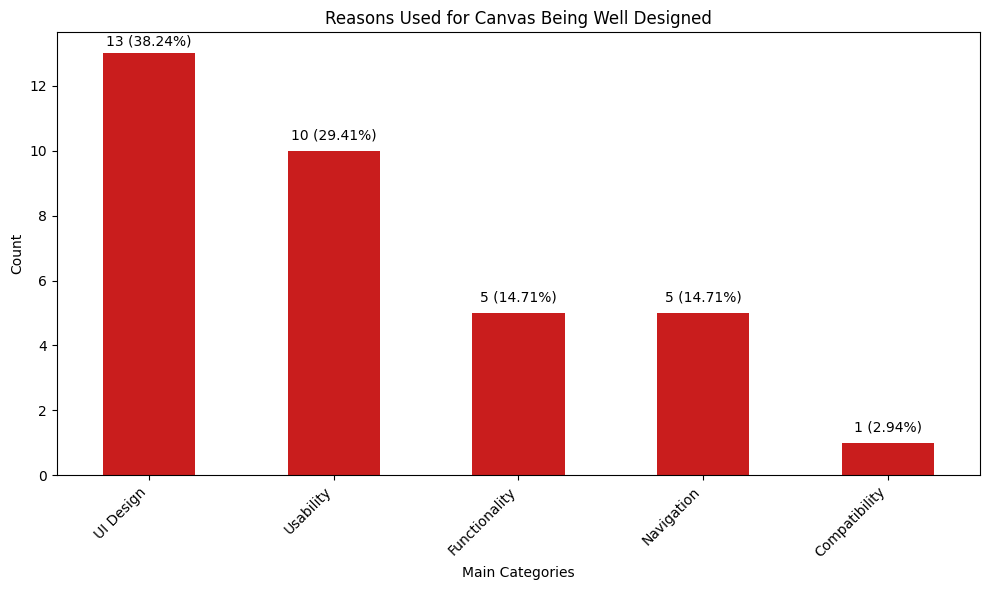

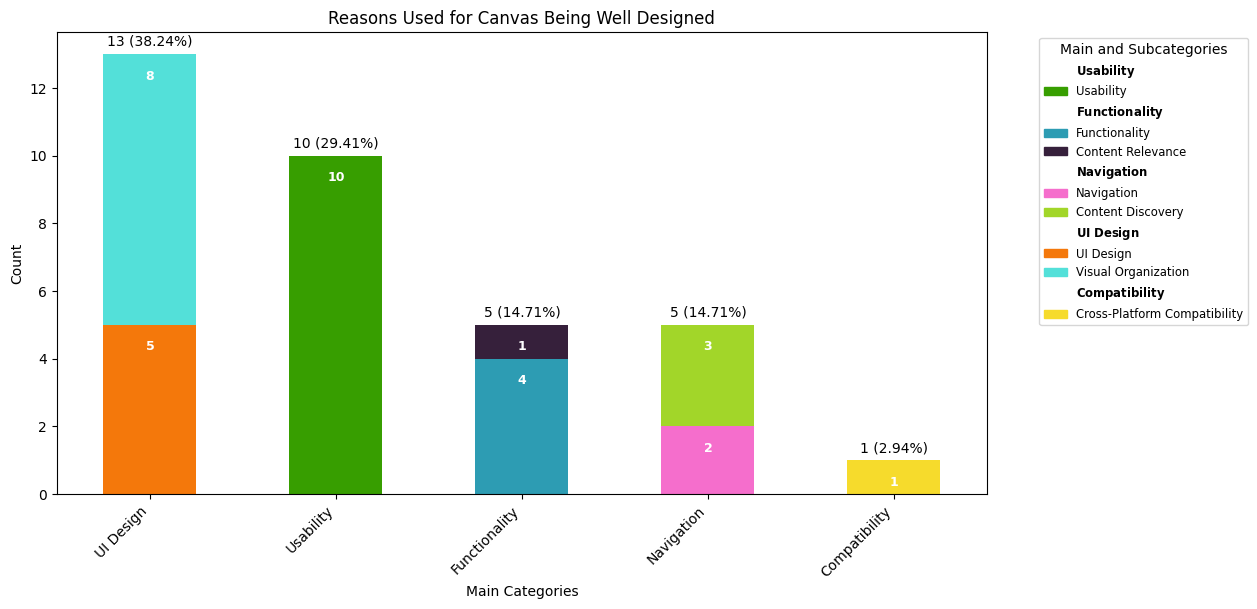

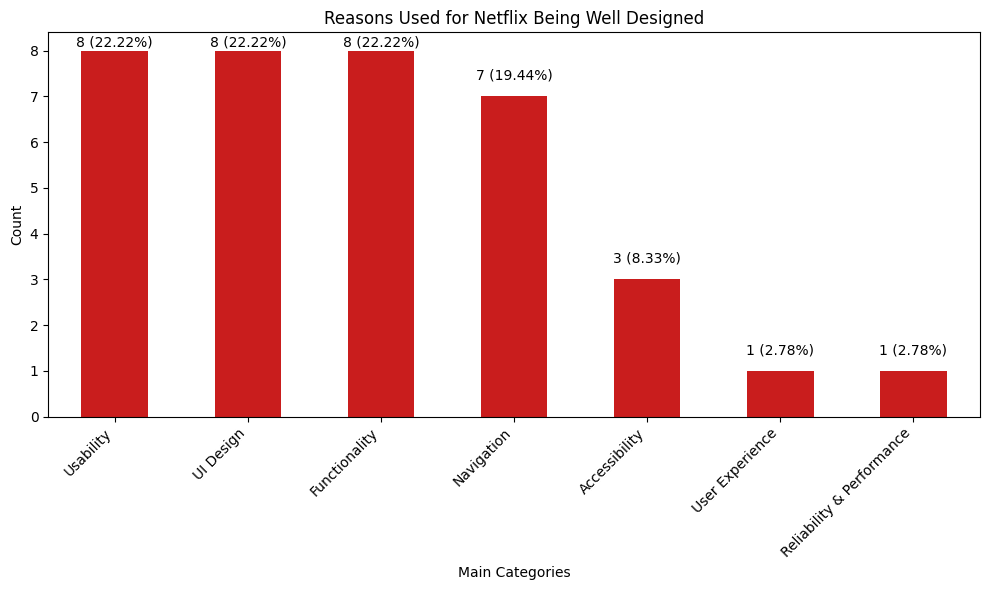

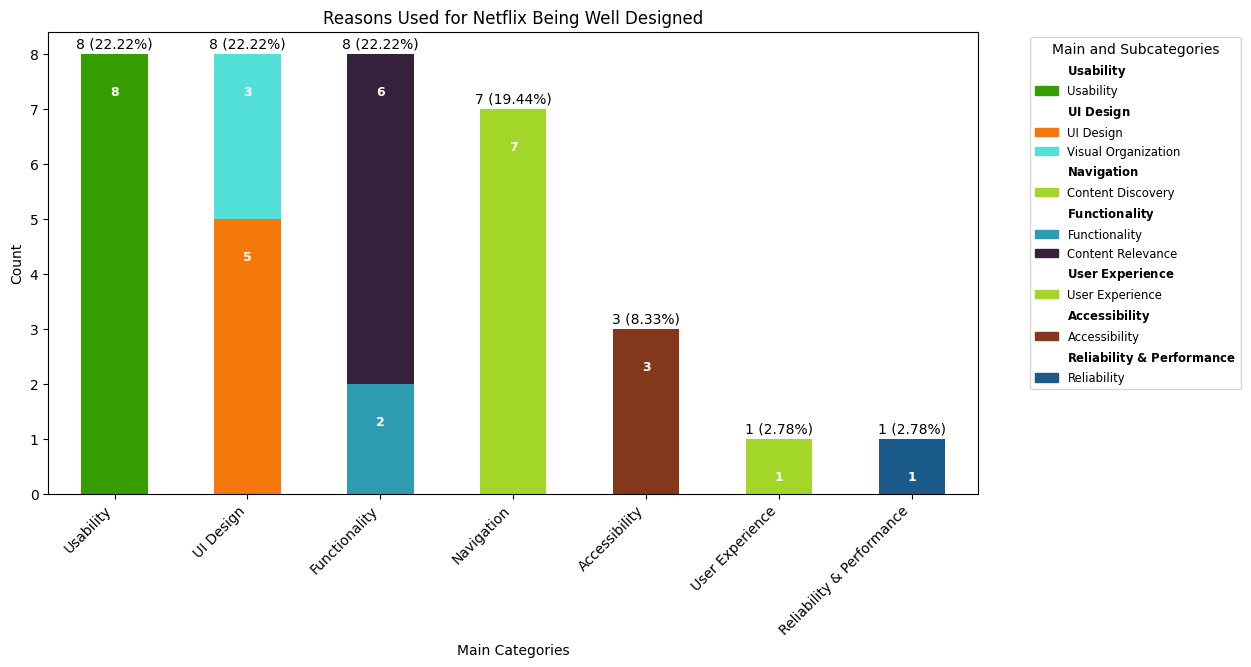

{'Spotify': ['Compatibility', 'UI Design', 'Usability', 'User Experience', 'UI Design', 'Usability', 'Functionality', 'Usability', 'Functionality', 'Functionality', 'Usability', 'UI Design', 'Navigation', 'Functionality', 'Usability', 'Functionality', 'Functionality', 'Usability', 'UI Design', 'Navigation', 'Functionality', 'Navigation', 'UI Design', 'Functionality', 'Usability', 'User Experience', 'Usability', 'Navigation', 'Functionality', 'Usability', 'Reliability & Performance', 'Accessibility', 'Usability', 'Functionality', 'Functionality', 'Functionality', 'Usability', 'Navigation', 'Functionality', 'UI Design', 'UI Design', 'Usability', 'Functionality', 'Functionality', 'Usability', 'Functionality', 'Usability', 'Usability', 'Functionality', 'Usability', 'Usability', 'Functionality', 'Usability', 'UI Design', 'Functionality', 'Navigation', 'Functionality', 'UI Design', 'Usability', 'Functionality', 'Navigation', 'Usability', 'Functionality', 'Usability', 'UI Design', 'Functional

In [30]:
good_reasons_map = {}

for name, info in data_good_software.items():
  software_df_with_main_categories = add_main_categories(df_top_good, subcategory_to_maincategory, name)
  reasons = plot_main_reasons_for_designed_simple(name, info['color'], info['distance'], software_df_with_main_categories, True)
  reasons = plot_main_reasons_for_designed_complex(name, info['distance'], software_df_with_main_categories, True)
  add_reasons_to_hash(reasons, name, good_reasons_map)


print(good_reasons_map)
print_reasons_table(good_reasons_map, main_categories, list(data_good_software.keys()), True)

## Sub Categories Used for Good Software Design Opinions

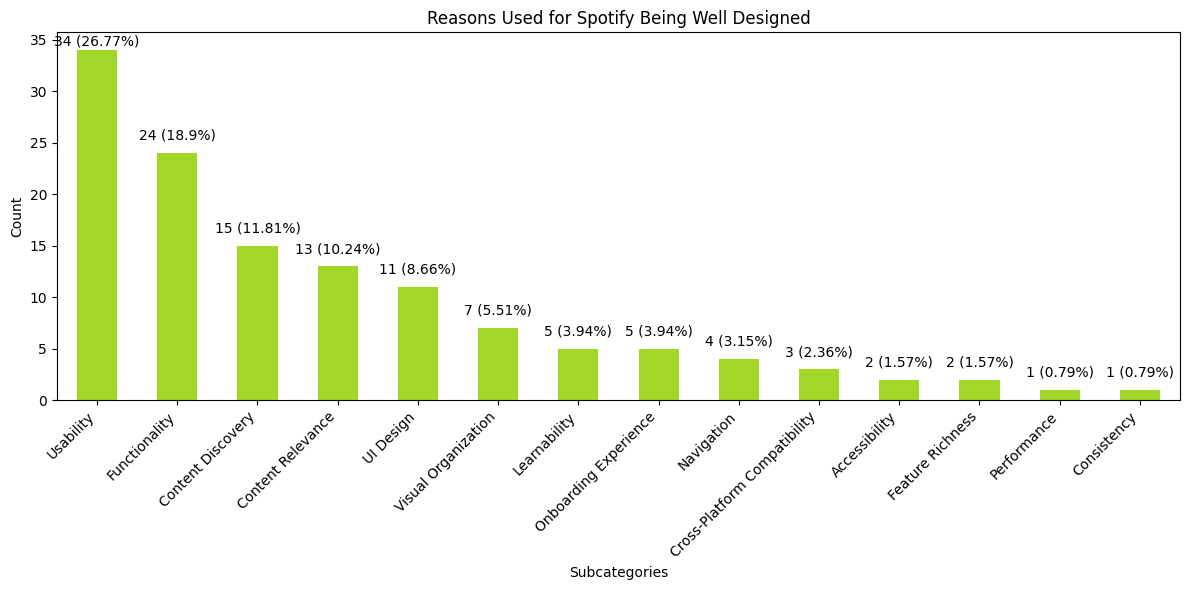

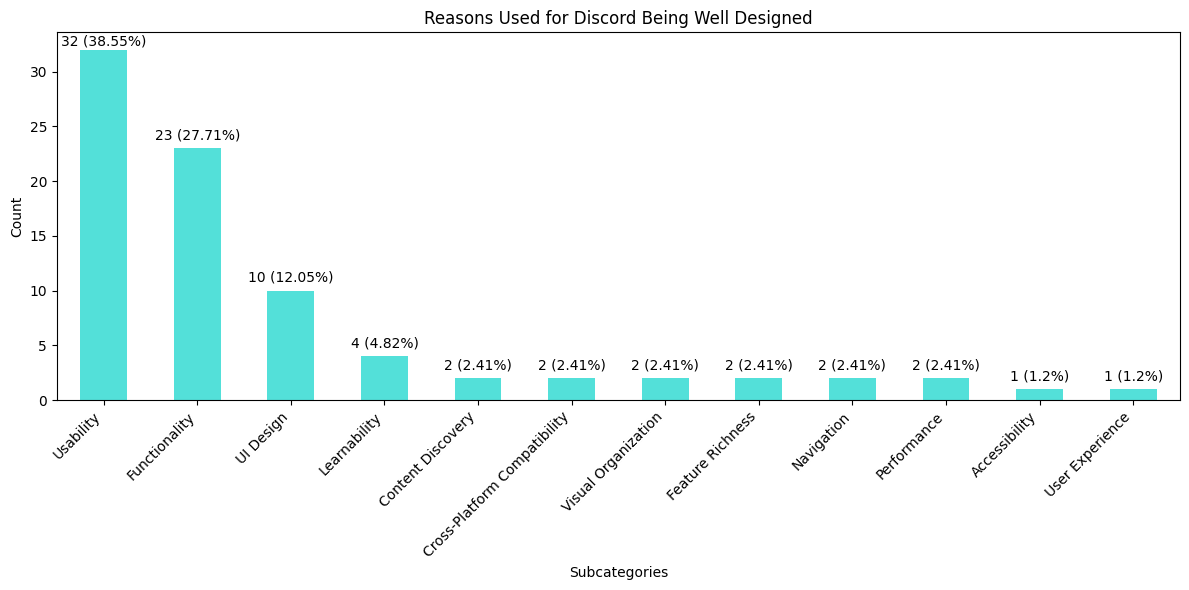

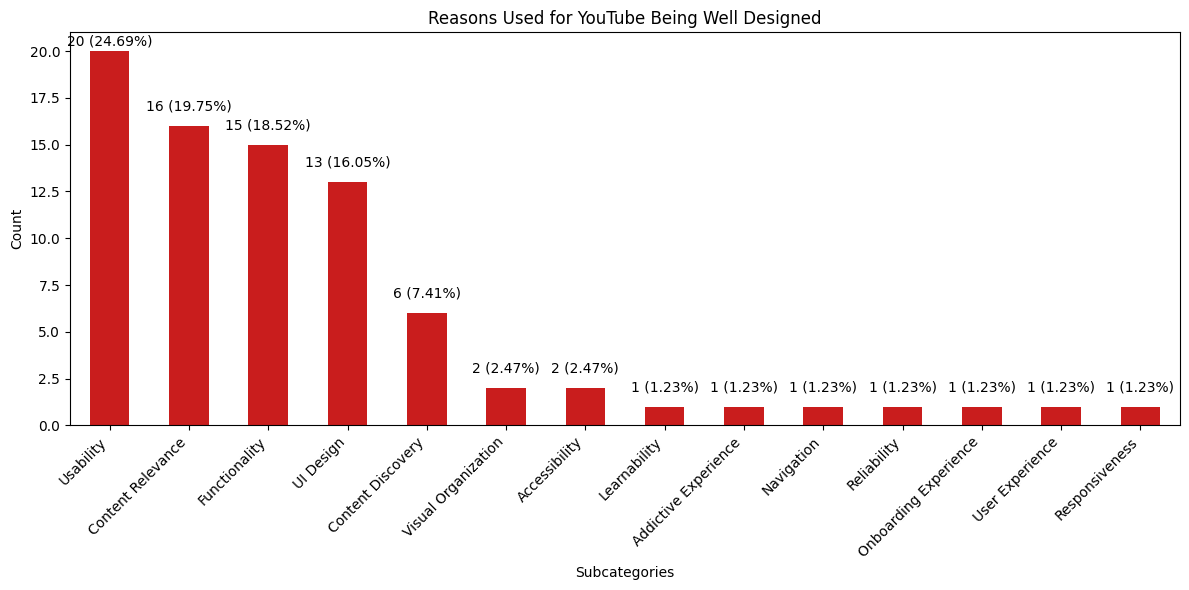

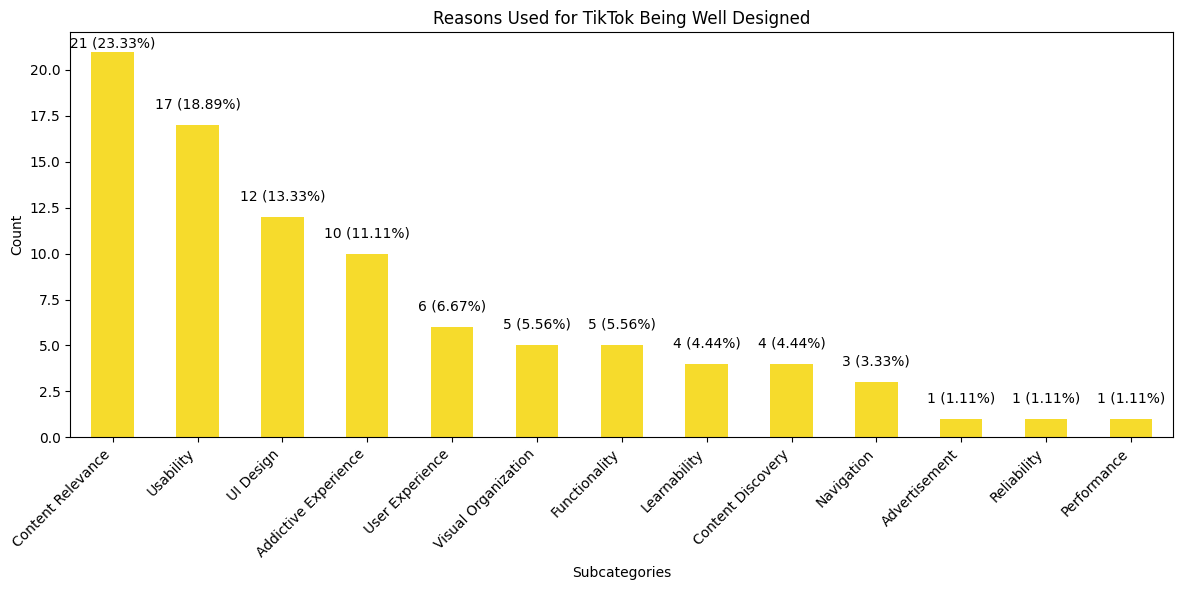

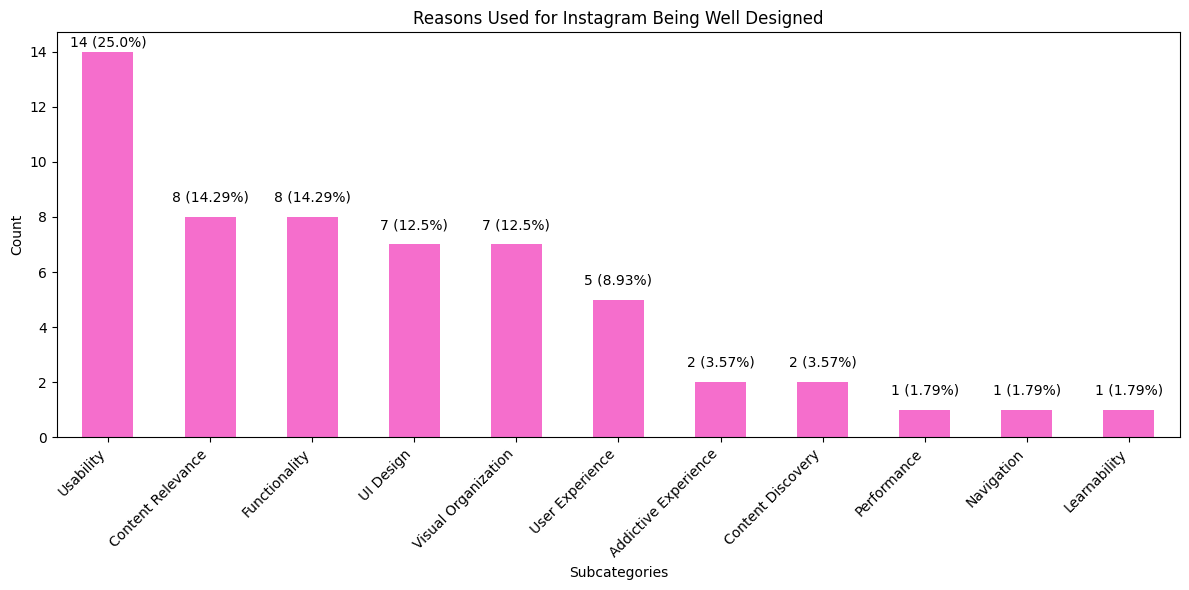

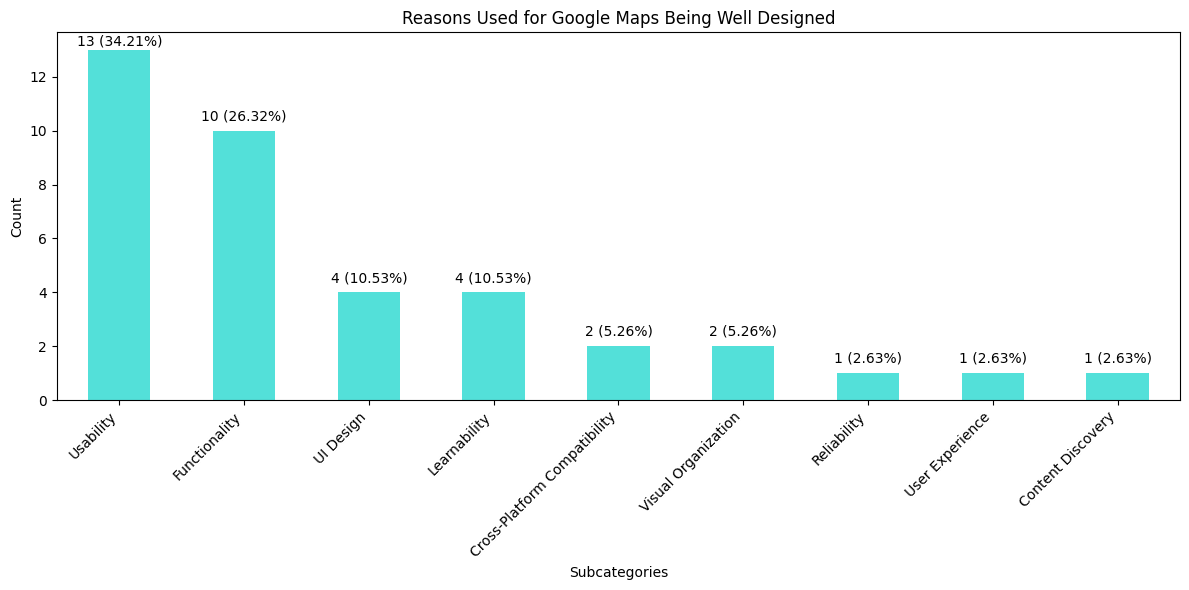

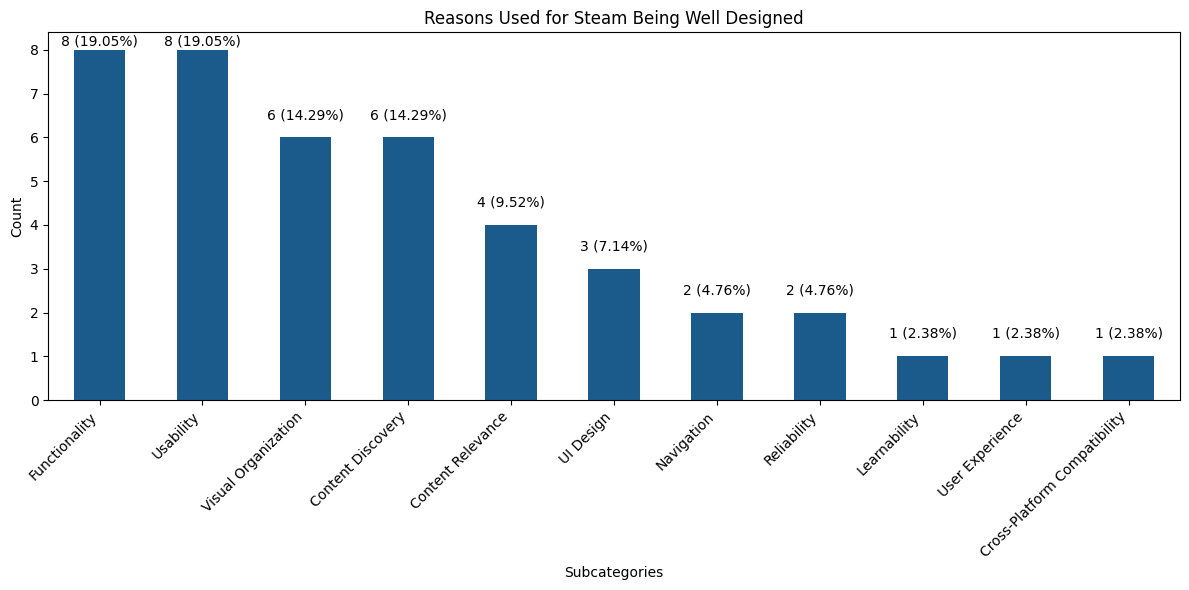

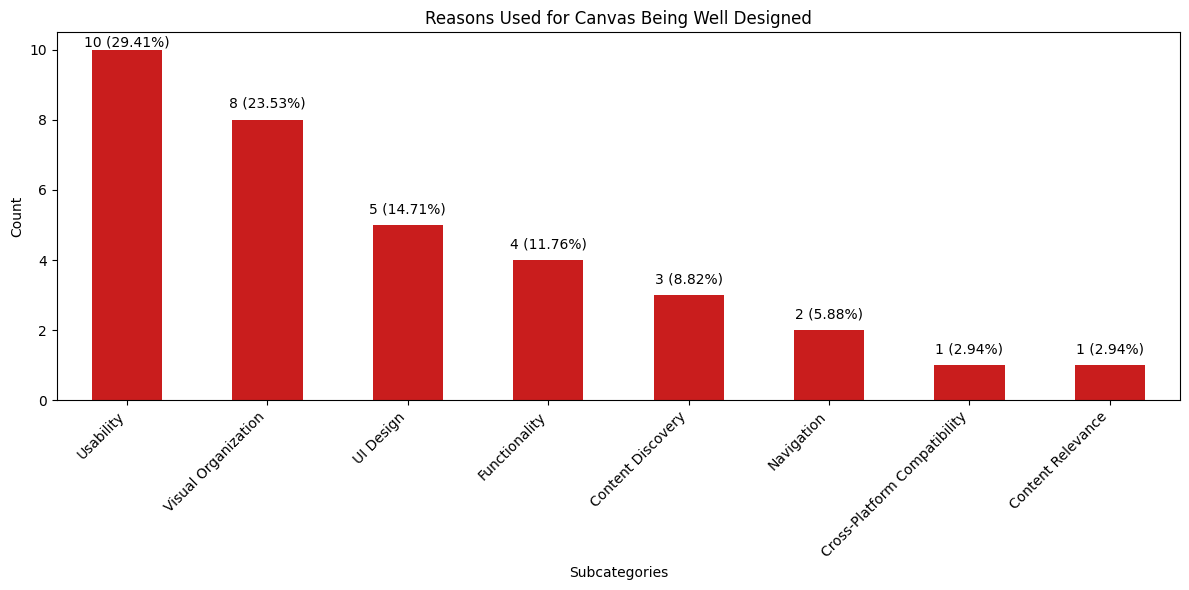

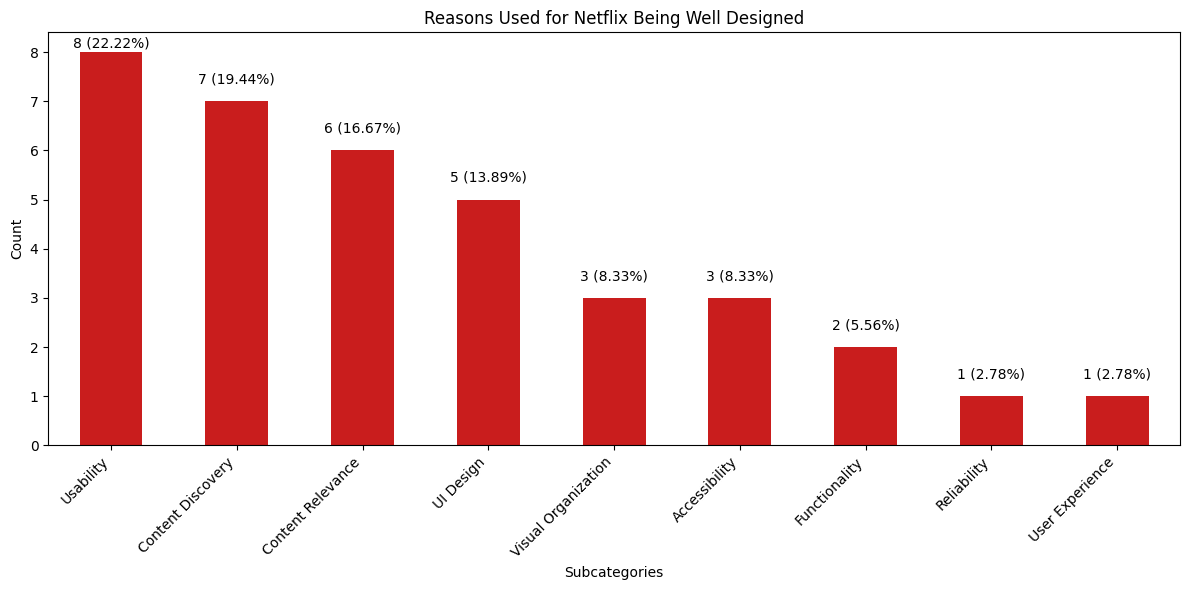

╒═════════════╤═════════════╤════════════════╤═════════════════╤═════════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════╤═══════════════╤═══════════════════════╤═══════════════╤═══════════════╤════════════╤═══════════╤═════════════════╤════════════════════════════════╤══════════════════╤═════════════════╤═══════════════════╤═════════════════════════╤════════════════════════╕
│             │ Usability   │ Learnability   │ Functionality   │ Content Relevance   │ Feature Richness   │ Navigation   │ Content Discovery   │ UI Design   │ Consistency   │ Visual Organization   │ Reliability   │ Performance   │ Security   │ Privacy   │ Advertisement   │ Cross-Platform Compatibility   │ Responsiveness   │ Accessibility   │ User Experience   │ Onboarding Experience   │ Addictive Experience   │
╞═════════════╪═════════════╪════════════════╪═════════════════╪═════════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════╪════════════

In [31]:
good_reasons_map = {}

for name, info in data_good_software.items():
  reasons = plot_sub_reasons_for_designed_simple(name, info['color'], info['distance'], df_top_good, True)
  add_reasons_to_hash(reasons, name, good_reasons_map)

print_reasons_table(good_reasons_map, subcategories, list(data_good_software.keys()), True)

## Main Categories Used for Bad Software Design Opinions

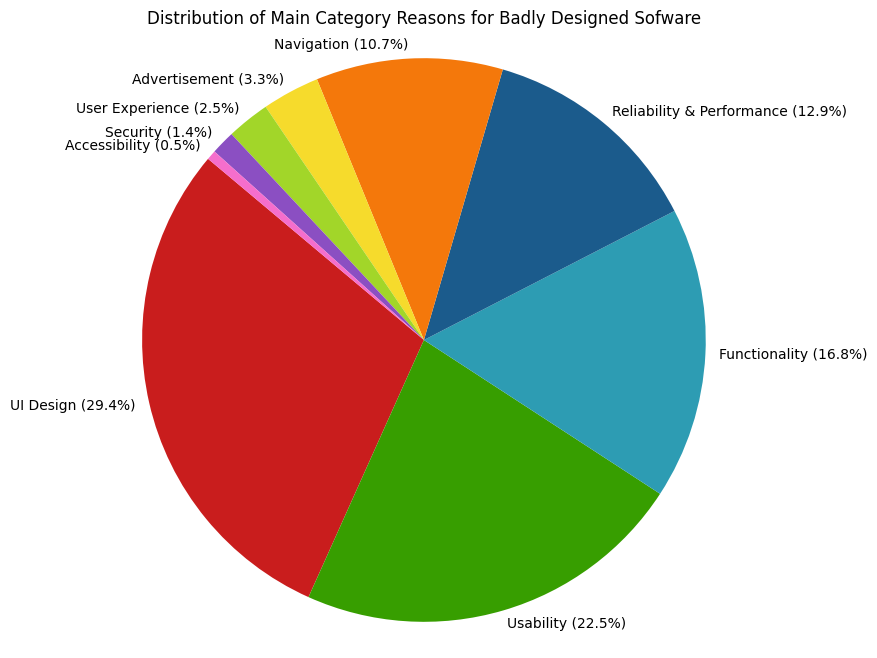

In [32]:
software_df_with_main_categories = pd.DataFrame()

for name, info in data_bad_software.items():
    software_df_with_main_categories = pd.concat([software_df_with_main_categories, add_main_categories(df_top_bad, subcategory_to_maincategory, name)], ignore_index=True)

# Count the occurrences of each main category
category_counts = software_df_with_main_categories['mainCategories'].explode().value_counts()

# Calculate the percentage for each category
percentages = category_counts / category_counts.sum() * 100

# Get colors from the custom palette based on main categories
colors = [maincategories_palette.get(category, 'gray') for category in category_counts.index]

# Create labels with main category names and percentage values
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, percentages)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(category_counts, labels=labels, startangle=140, colors=colors, labeldistance=1.05)

title = 'Distribution of Main Category Reasons for Badly Designed Sofware'
plt.title(title)
plt.axis('equal')
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

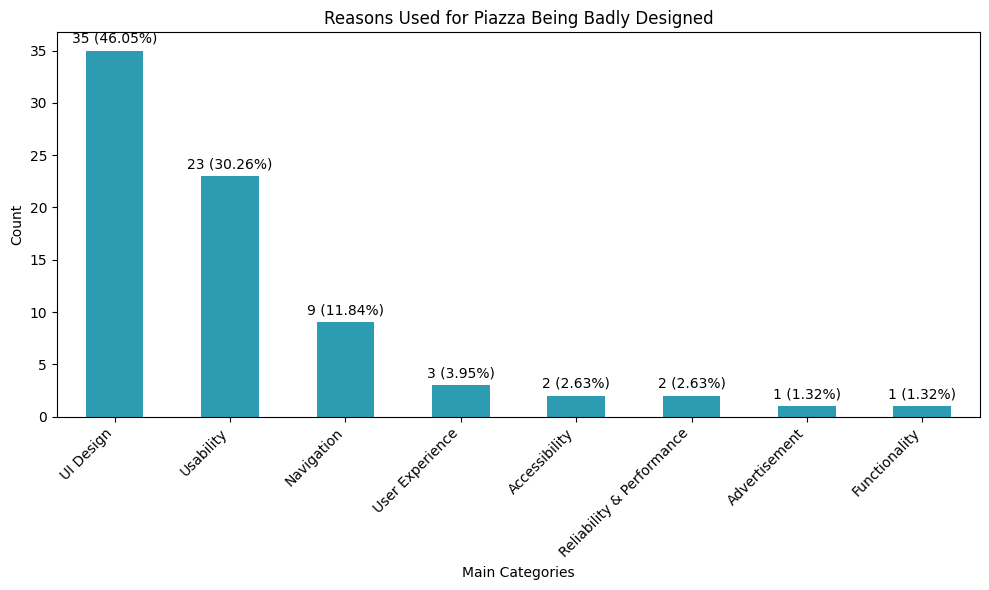

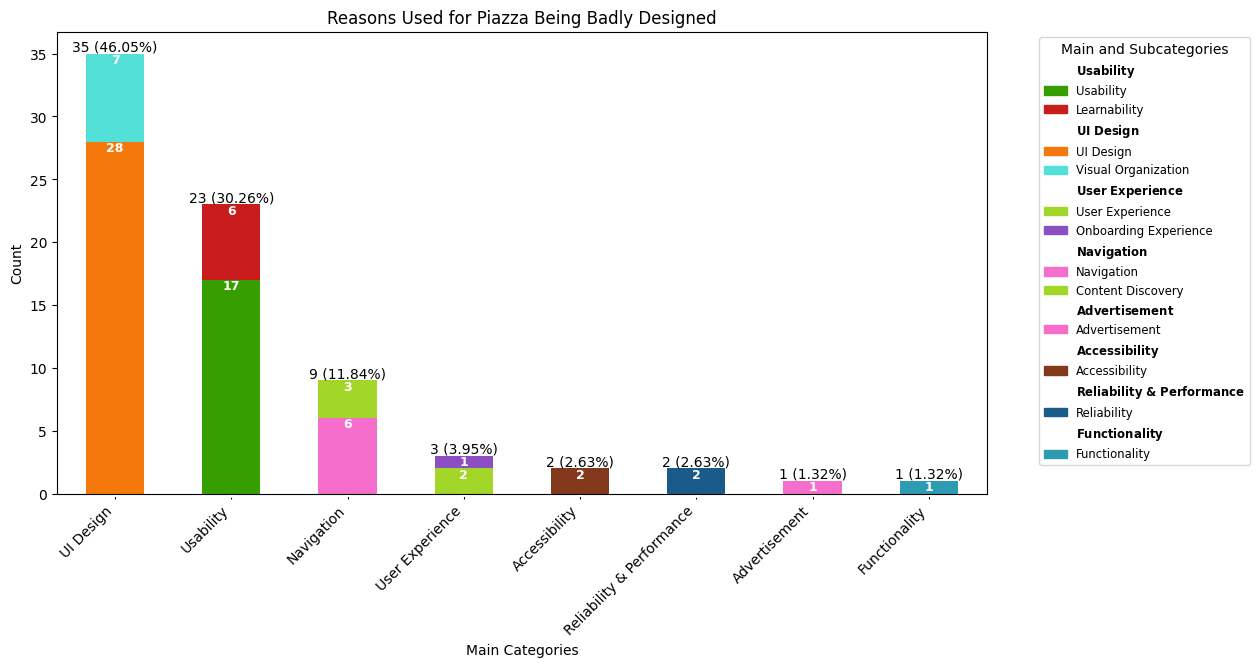

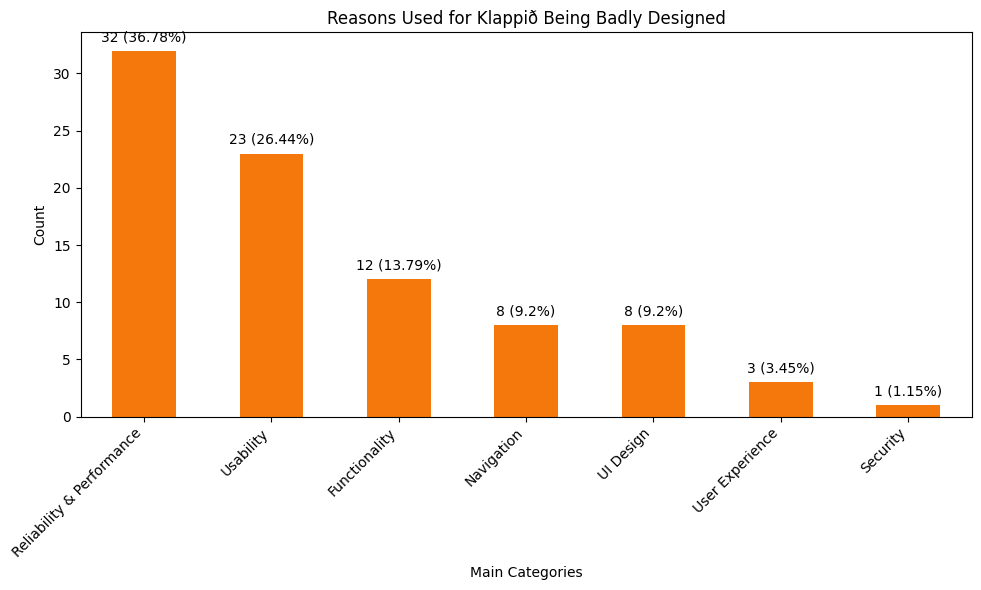

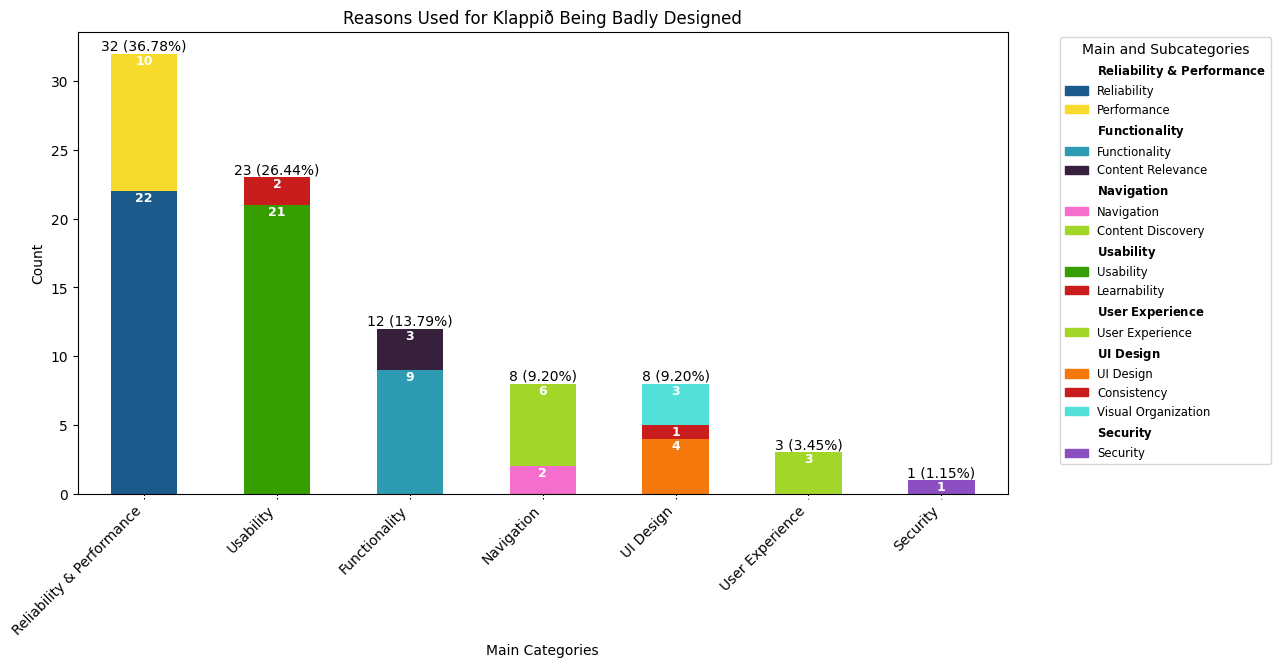

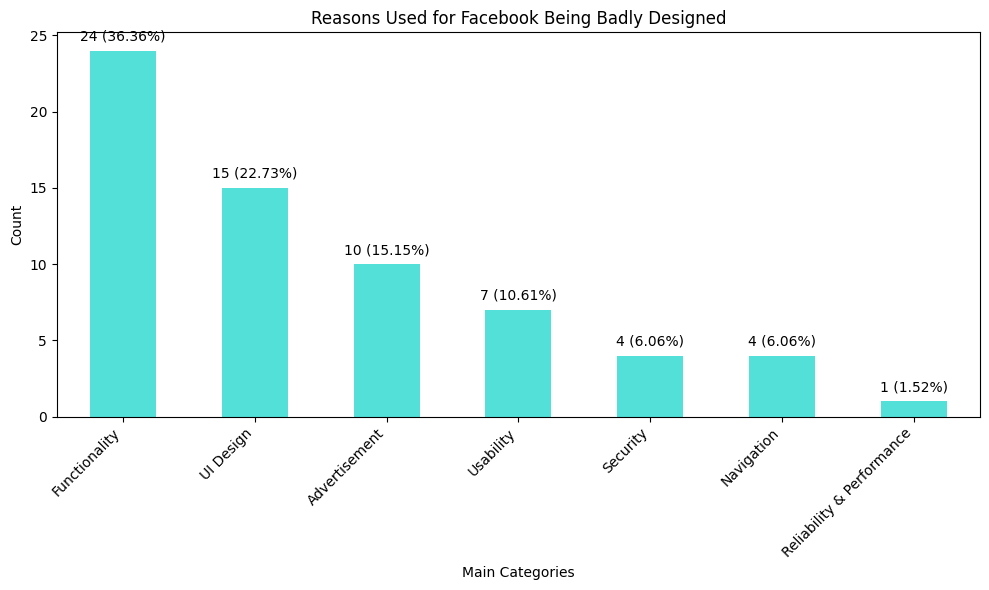

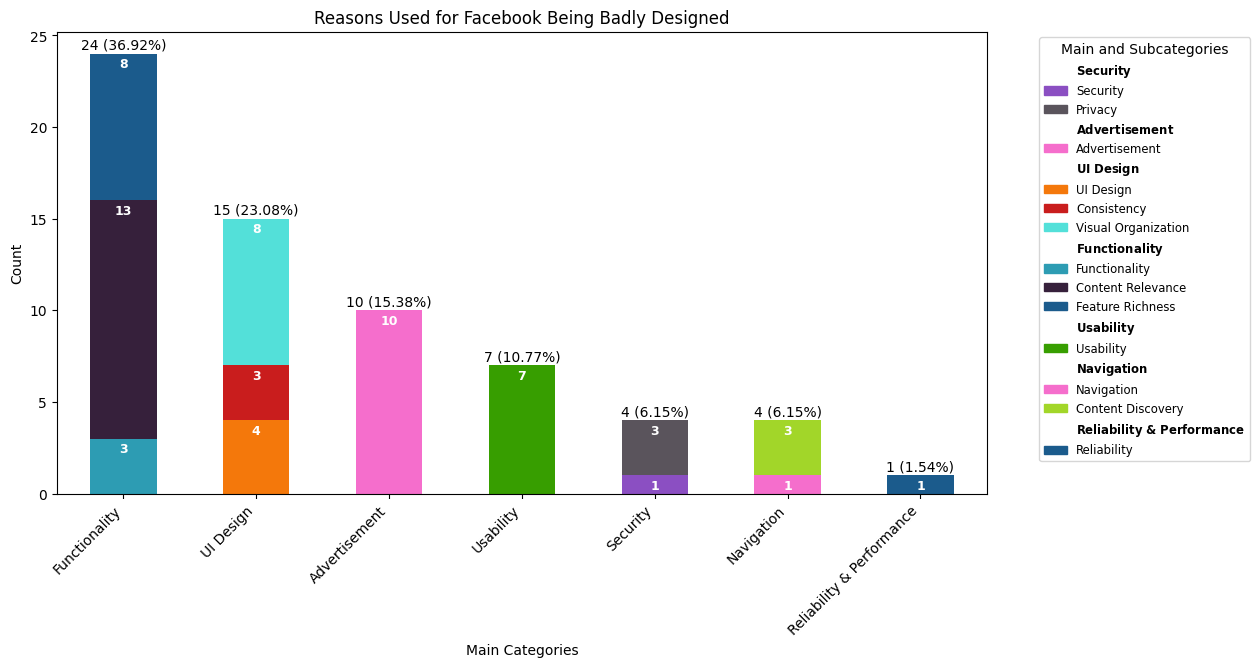

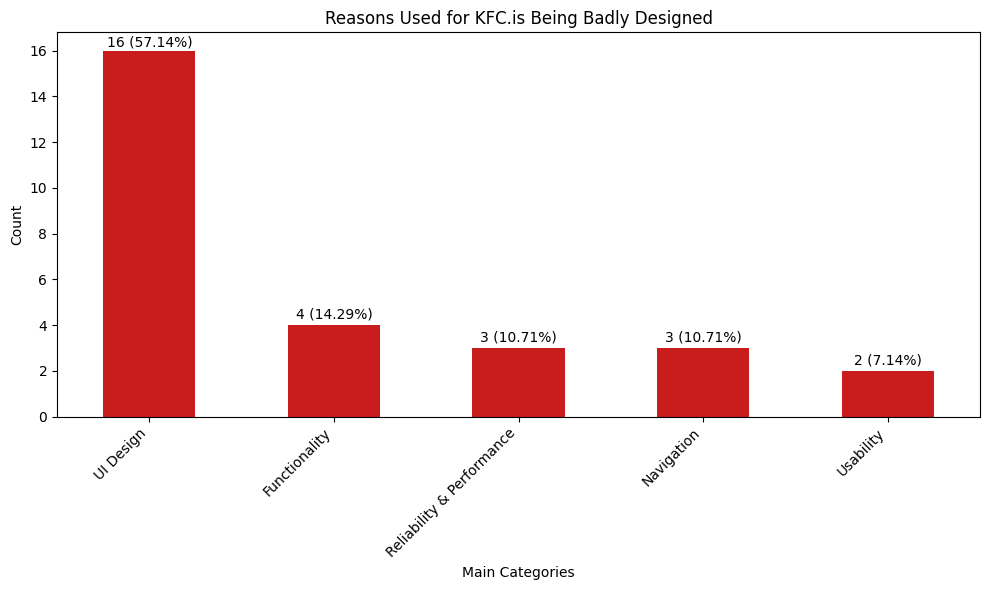

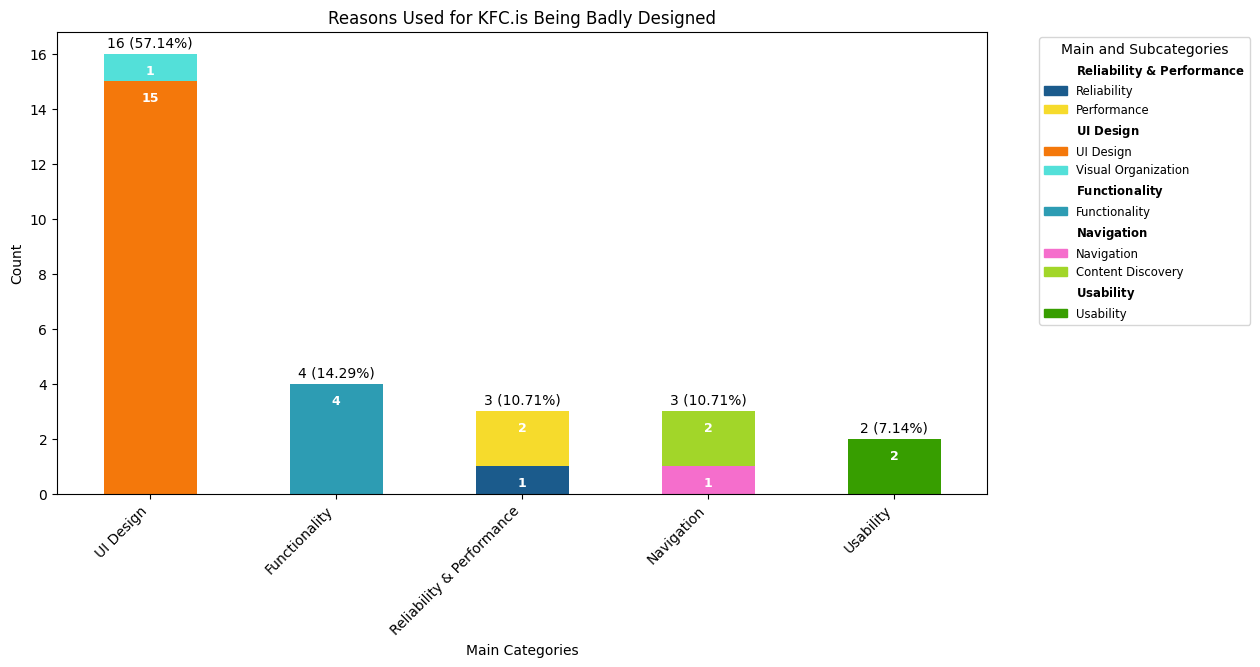

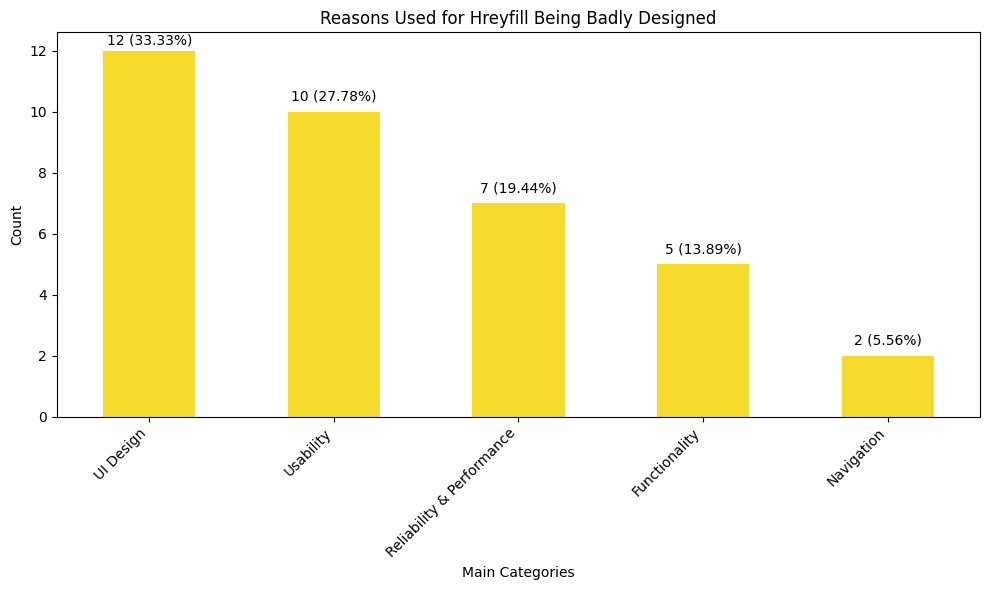

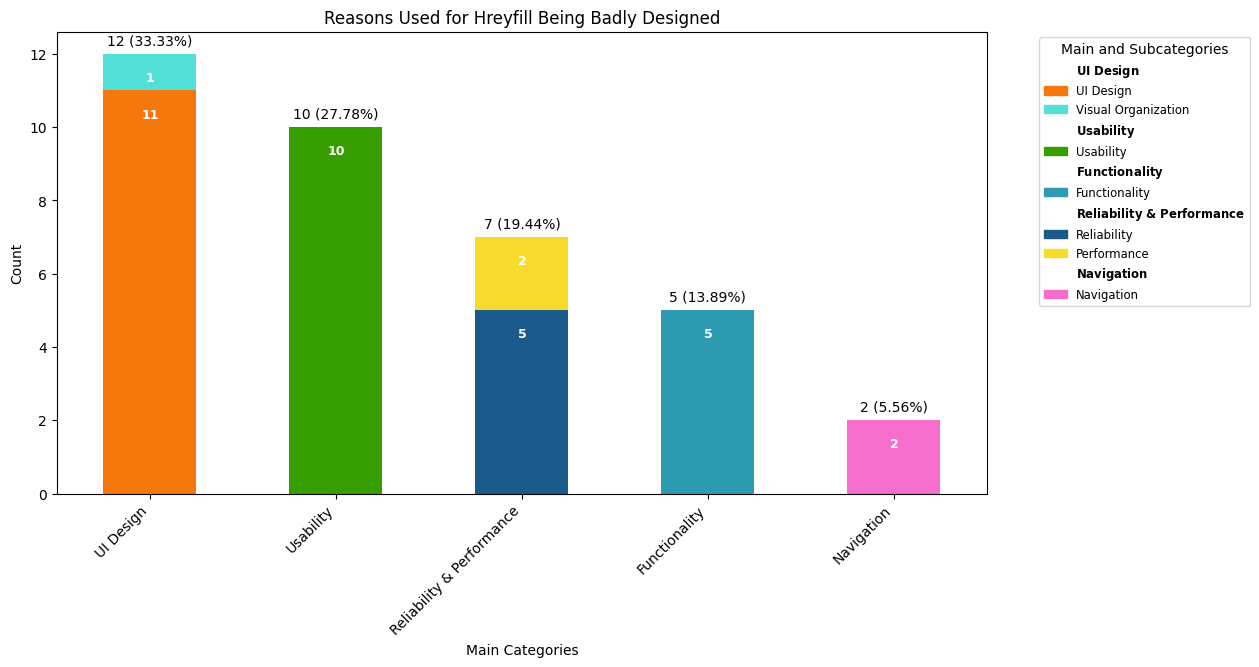

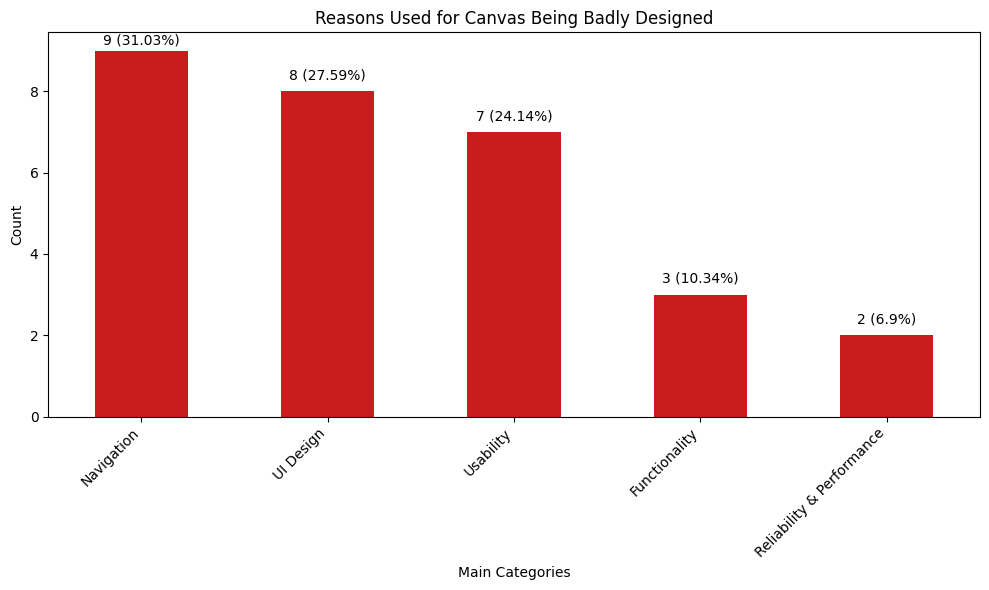

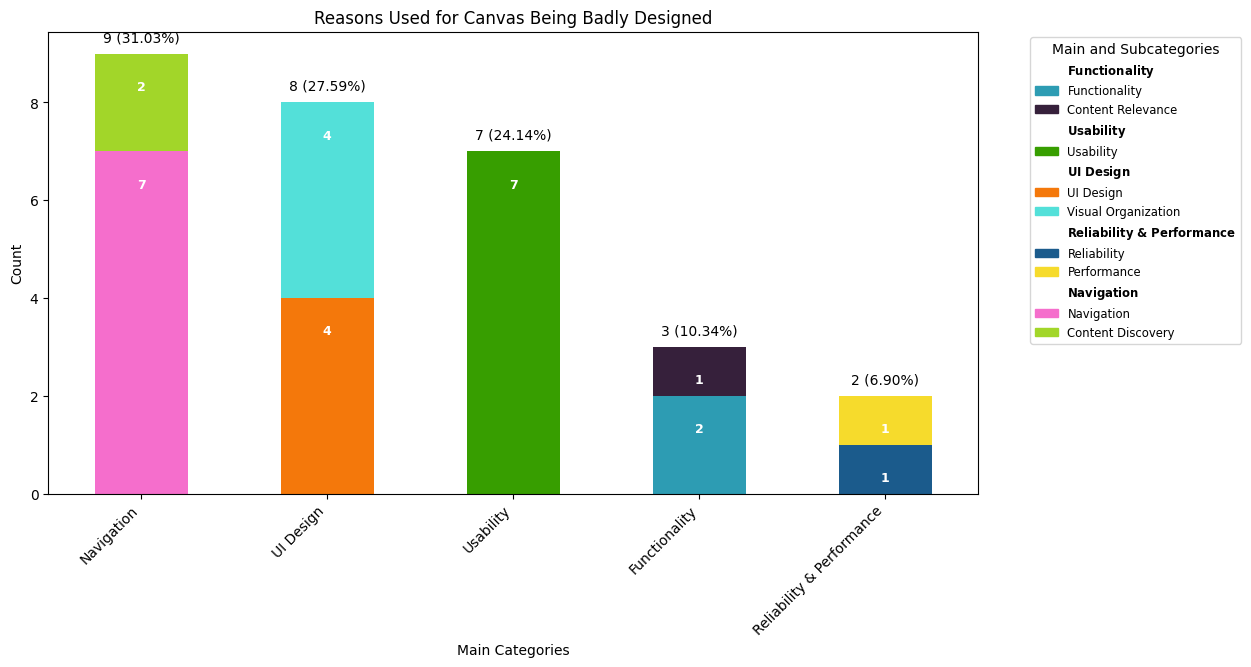

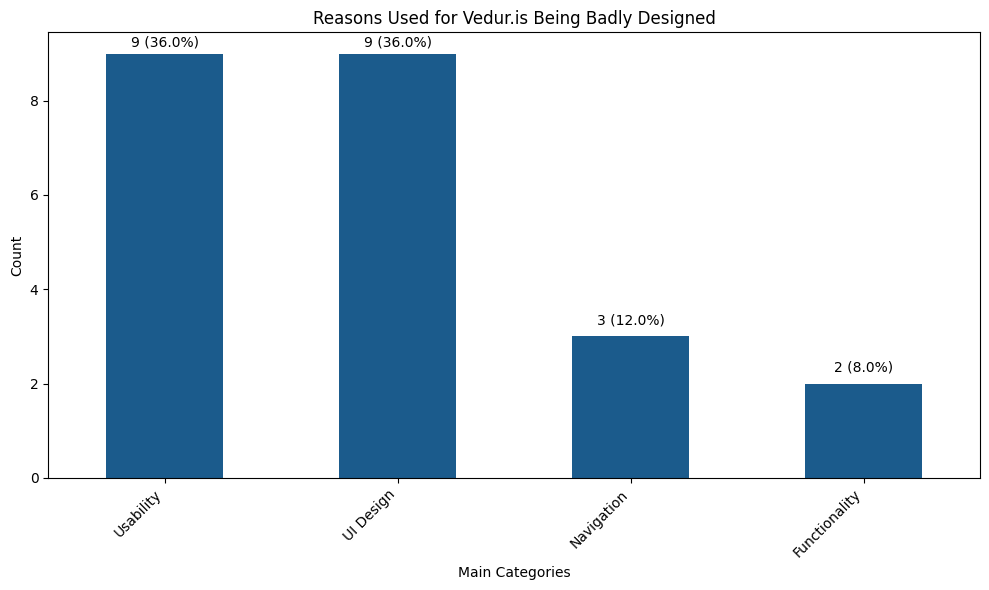

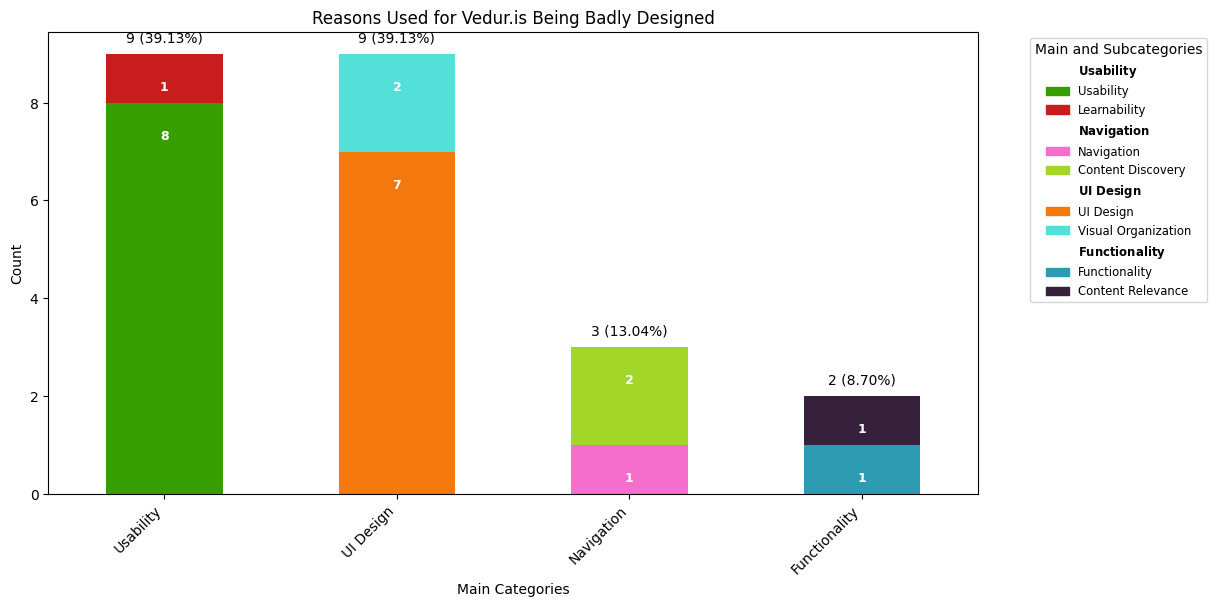

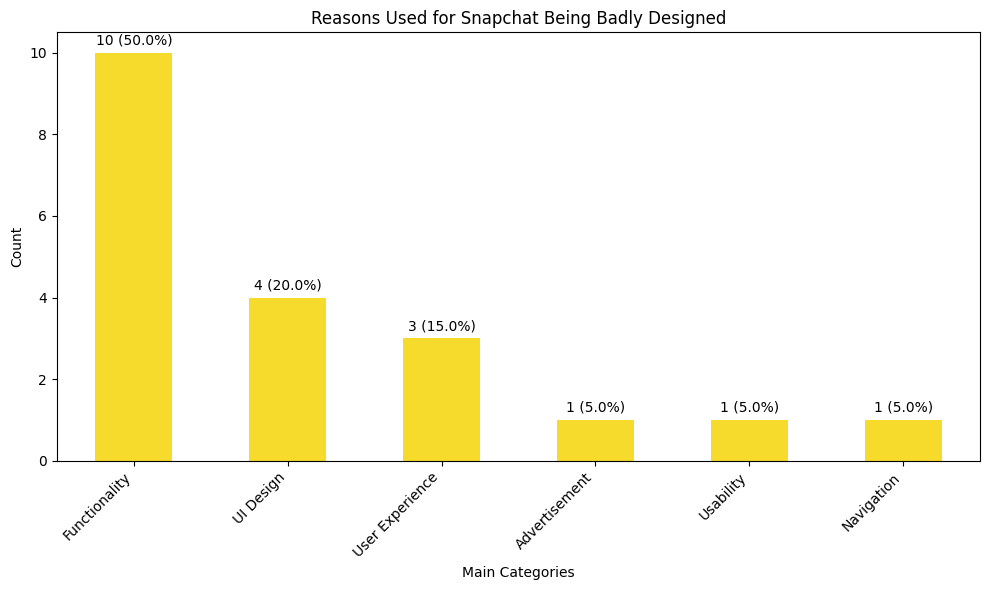

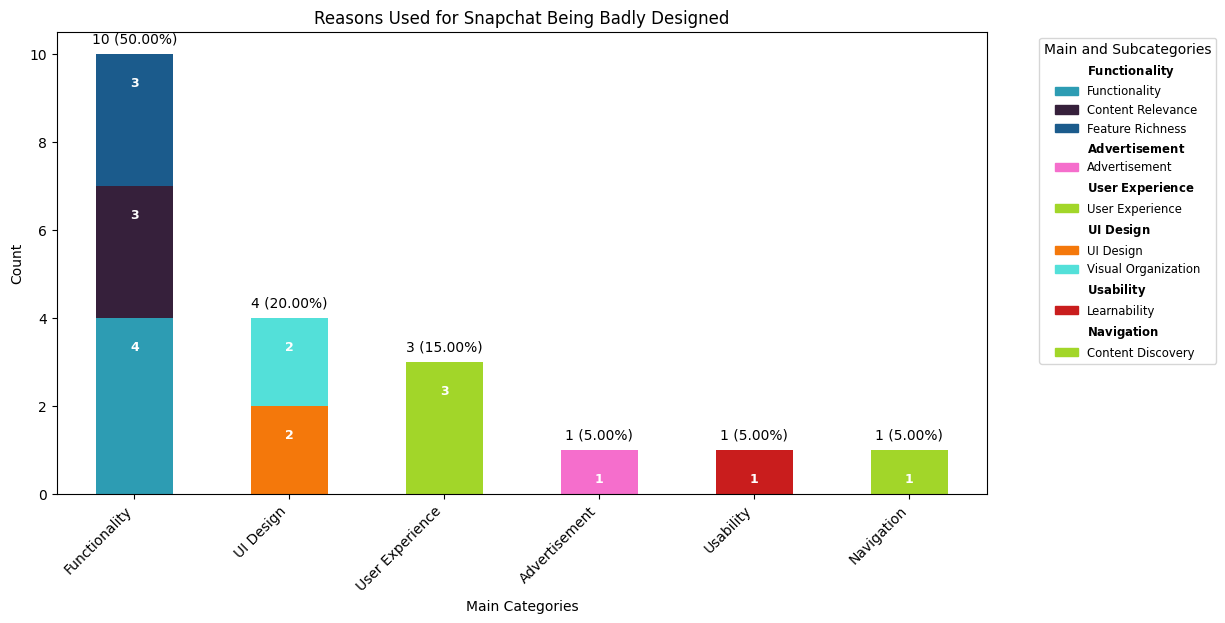

╒══════════╤═════════════════╤═════════════╤═══════════════════╤═════════════╤══════════════╤═════════════════════════════╤════════════╤═════════════════╤═════════════════╤═════════════════╕
│          │ Functionality   │ Usability   │ User Experience   │ UI Design   │ Navigation   │ Reliability & Performance   │ Security   │ Advertisement   │ Compatibility   │ Accessibility   │
╞══════════╪═════════════════╪═════════════╪═══════════════════╪═════════════╪══════════════╪═════════════════════════════╪════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Piazza   │ 1.32%           │ 30.26%      │ 3.95%             │ 46.05%      │ 11.84%       │ 2.63%                       │            │ 1.32%           │                 │ 2.63%           │
├──────────┼─────────────────┼─────────────┼───────────────────┼─────────────┼──────────────┼─────────────────────────────┼────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Klappið  │ 13.79%          │ 26.44%      │ 

In [33]:
bad_reasons_map = {}

for name, info in data_bad_software.items():
  software_df_with_main_categories = add_main_categories(df_top_bad, subcategory_to_maincategory, name)
  reasons = plot_main_reasons_for_designed_simple(name, info['color'], info['distance'], software_df_with_main_categories, False)
  reasons = plot_main_reasons_for_designed_complex(name, info['distance'], software_df_with_main_categories, False)
  add_reasons_to_hash(reasons, name, bad_reasons_map)

# Adjust the index to match the number of rows in the table
index = list(bad_reasons_map.keys())[:len(list(data_bad_software.keys()))]
print_reasons_table(bad_reasons_map, main_categories, index, False)

## Sub Categories Used for Bad Software Design Opinions

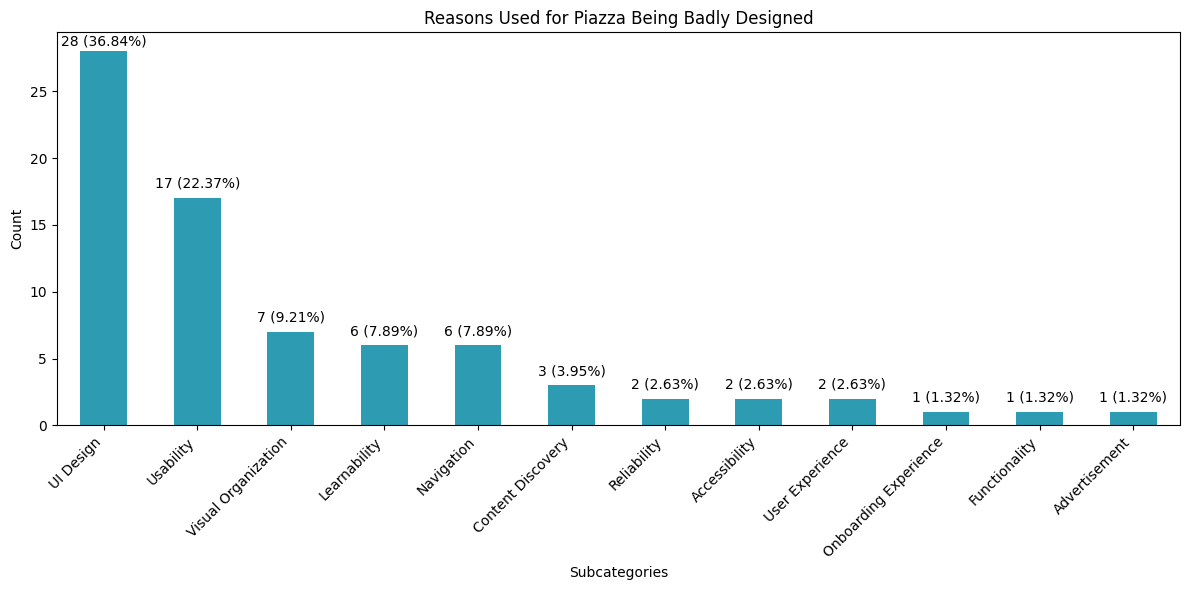

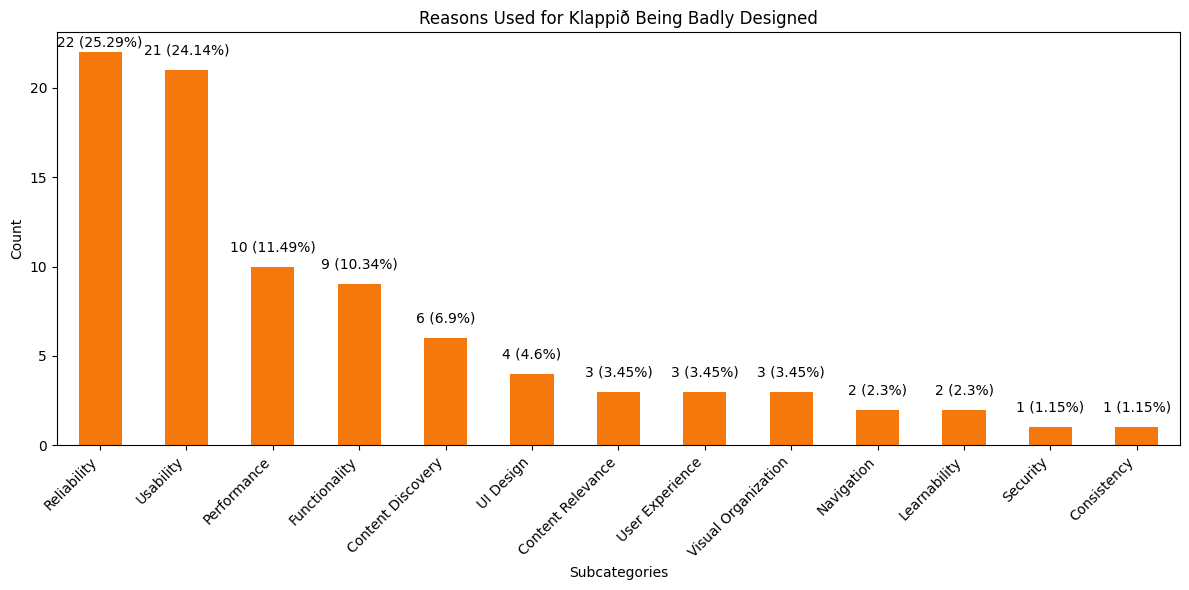

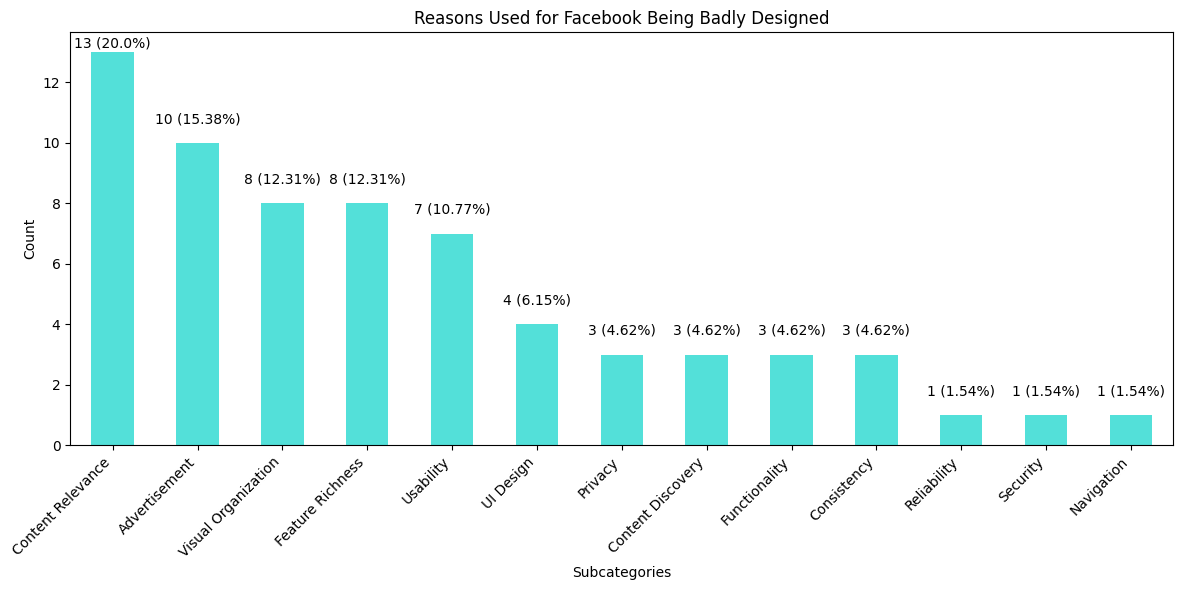

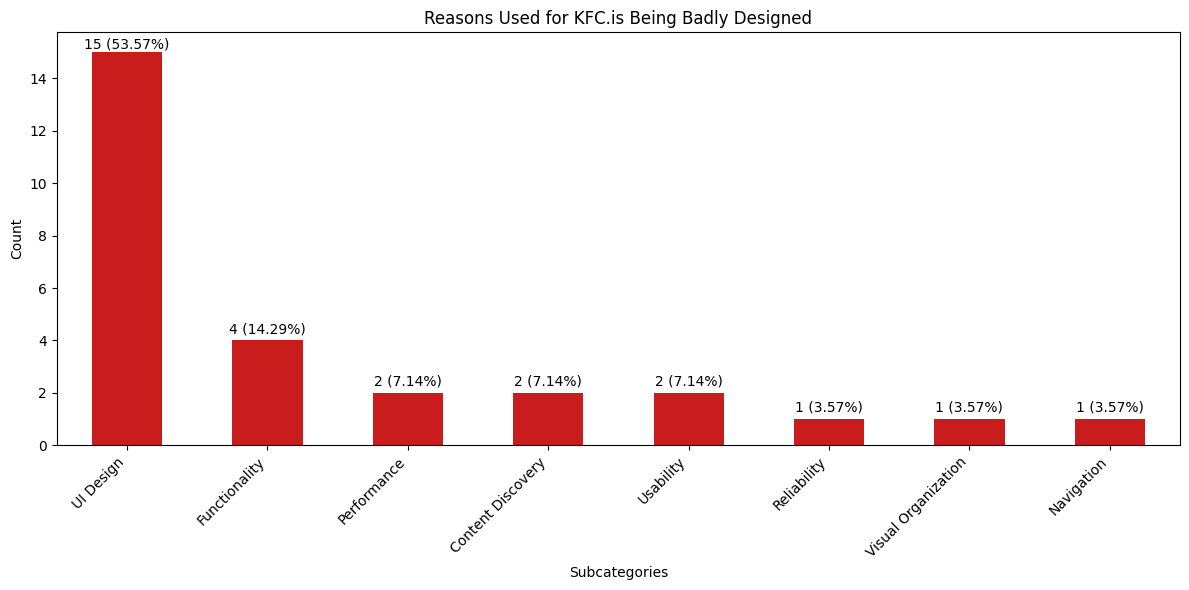

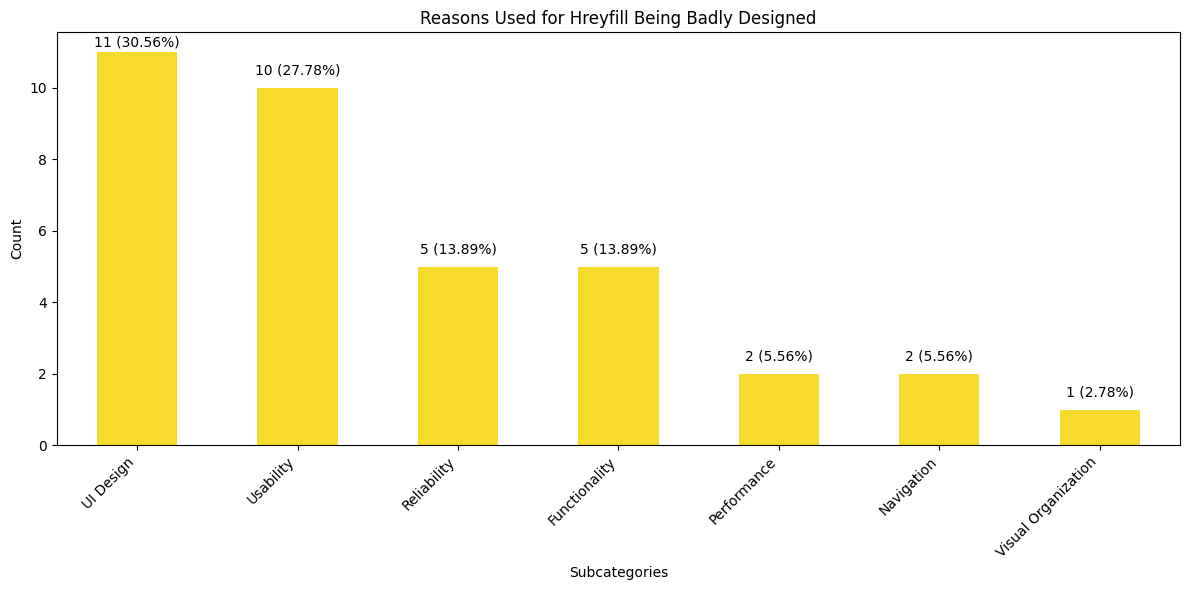

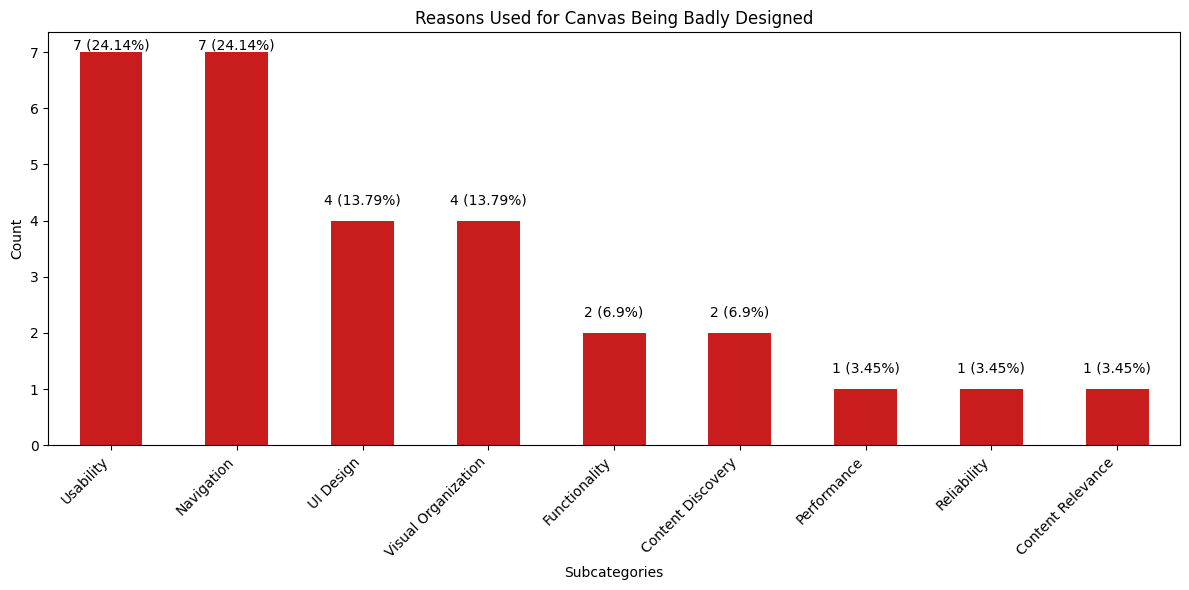

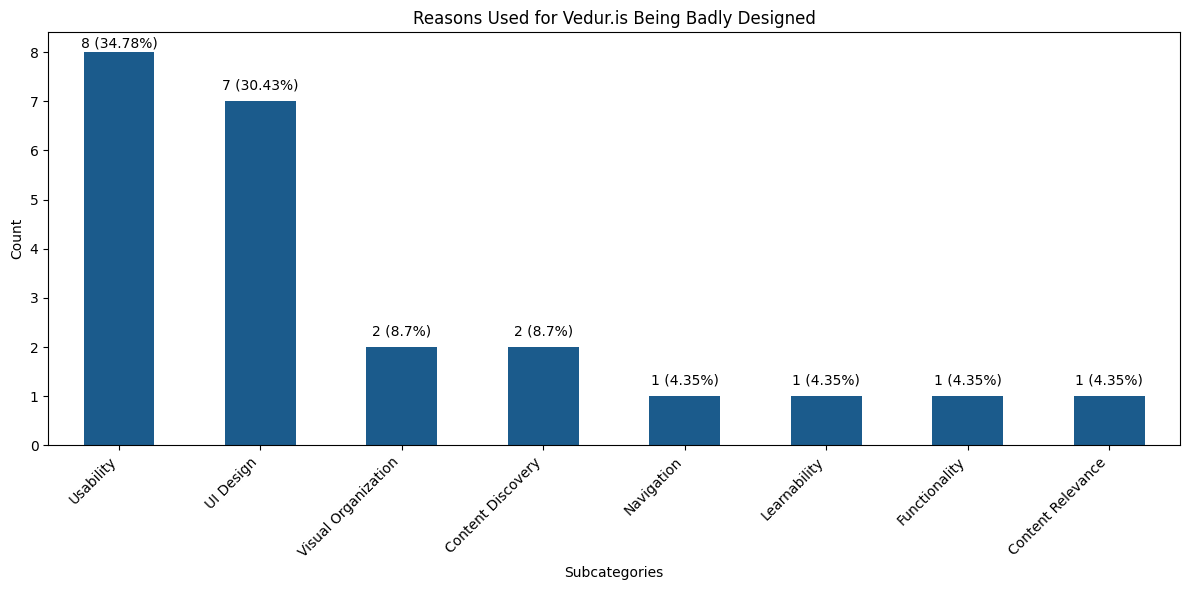

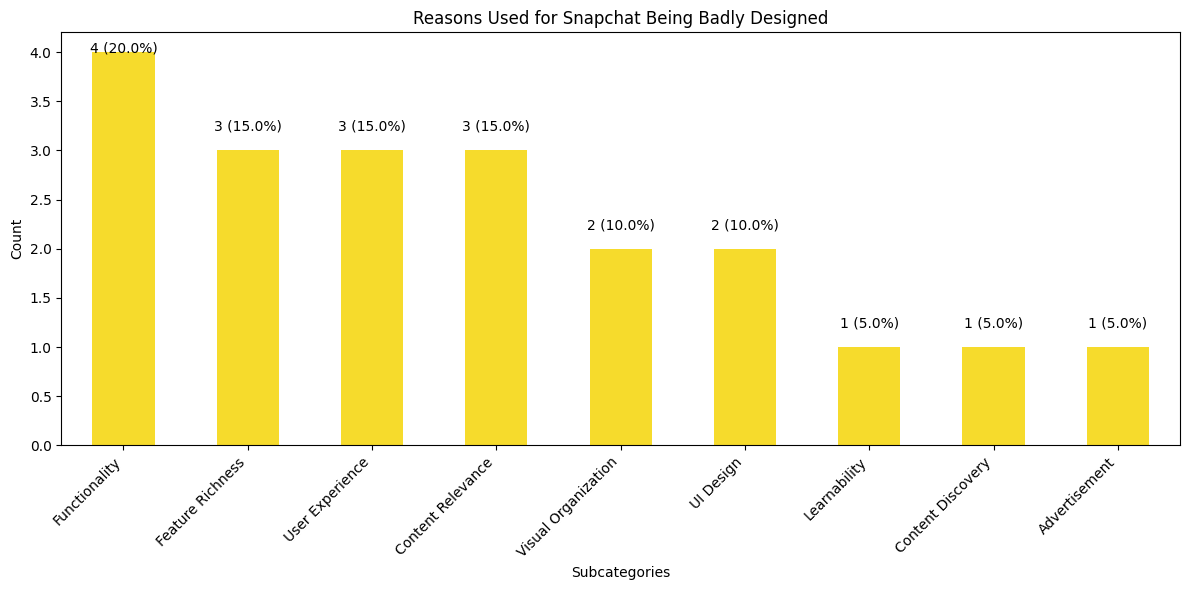

╒══════════╤═════════════╤════════════════╤═════════════════╤═════════════════════╤════════════════════╤══════════════╤═════════════════════╤═════════════╤═══════════════╤═══════════════════════╤═══════════════╤═══════════════╤════════════╤═══════════╤═════════════════╤════════════════════════════════╤══════════════════╤═════════════════╤═══════════════════╤═════════════════════════╤════════════════════════╕
│          │ Usability   │ Learnability   │ Functionality   │ Content Relevance   │ Feature Richness   │ Navigation   │ Content Discovery   │ UI Design   │ Consistency   │ Visual Organization   │ Reliability   │ Performance   │ Security   │ Privacy   │ Advertisement   │ Cross-Platform Compatibility   │ Responsiveness   │ Accessibility   │ User Experience   │ Onboarding Experience   │ Addictive Experience   │
╞══════════╪═════════════╪════════════════╪═════════════════╪═════════════════════╪════════════════════╪══════════════╪═════════════════════╪═════════════╪═══════════════╪═════

In [34]:
bad_reasons_map = {}

for name, info in data_bad_software.items():
  reasons = plot_sub_reasons_for_designed_simple(name, info['color'], info['distance'], df_top_bad, False)
  add_reasons_to_hash(reasons, name, bad_reasons_map)

print_reasons_table(bad_reasons_map, subcategories, list(data_bad_software.keys()), False)

# Reasons Used for All Software Design Opinions

## Functions

In [35]:
def add_all_main_categories(df, sub_to_main_dict):
    # Copy the DataFrame to avoid modifying the original
    df_main = df.copy()

    # Apply the function to each row of the DataFrame
    df_main.loc[:, 'mainCategories'] = df_main.apply(lambda row: [sub_to_main_dict[col] for col in row[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].dropna()], axis=1)

    return df_main

In [36]:
import matplotlib.pyplot as plt

def plot_main_categories_counts(df, isGoodInt, color):

    # Step 1: Get value counts of mainCategories
    main_categories_counts = df['mainCategories'].explode().value_counts()

    # Step 2: Calculate percentages
    total_apps = main_categories_counts.sum()
    main_categories_percentages = (main_categories_counts / total_apps) * 100

    # Step 3: Plot the counts with percentages and values
    plt.figure(figsize=(10, 6))
    bar_plot = main_categories_counts.plot(kind='bar', color=color)
    for index, value in enumerate(main_categories_counts):
        plt.text(index, value + 0.5, f"{value} ({main_categories_percentages.iloc[index]:.1f}%)", ha='center', va='bottom')

    title = ''
    # Set title based on isGood
    if isGoodInt == 1:
        title = 'Reasons Used for Software Being Well Designed'
    if isGoodInt == 0:
        title = 'Reasons Used for Software Being Badly Designed'
    if isGoodInt == 2:
        title = 'Reasons Used for Software Being Well and Badly Designed'

    plt.xlabel('Main Category')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()


In [37]:
import seaborn as sns

def plot_main_sub_category_counts(df, isGoodInt):

    # Plot all the main categories
    main_categories = df['mainCategories'].explode()
    # Count occurrences of each main category
    main_category_counts = main_categories.value_counts()

    # Concatenate the reasons from multiple columns into a single Series
    sub_categories = pd.concat([df['reason1'], df['reason2'], df['reason3'],
                         df['reason4'], df['reason5'], df['reason6']])

    # Drop NaN values
    sub_categories = sub_categories.dropna()

    # Create a dictionary to store the counts of subcategories for each main category
    main_category_subcategory_counts = {main_cat: {subcategory: 0 for subcategory in subcategory_to_maincategory.keys()}
                                        for main_cat in main_categories}

    # Iterate through sub_categories and count subcategory occurrences for each main category
    for category in sub_categories:
        main_cat = subcategory_to_maincategory.get(category)
        if main_cat:
            main_category_subcategory_counts[main_cat][category] += 1

    # Filter out main categories with no subcategories
    main_category_subcategory_counts = {key: value for key, value in main_category_subcategory_counts.items() if any(value.values())}
    main_category_subcategory_counts = {key: {inner_key: inner_value for inner_key, inner_value in value.items() if inner_value != 0} for key, value in main_category_subcategory_counts.items()}

    # Create a DataFrame from the counts
    df_counts = pd.DataFrame(main_category_subcategory_counts).T

    # Order df_counts
    # Calculate the sum of each row
    row_sums = df_counts.sum(axis=1)

    # Sort the DataFrame based on the row sums (descending order)
    df_counts = df_counts.loc[row_sums.sort_values(ascending=False).index]

    plt.figure(figsize=(15, 10))
    ax = plt.gca()  # Get the current axes

    # Plot the DataFrame using the custom color palette
    df_counts.plot(kind='bar', stacked=True, ax=ax, color=[subcategories_palette.get(subcategory, '#999999') for subcategory in df_counts.columns])

    # Set title based on isGood
    title = ''
    if isGoodInt == 1:
      title = 'Reasons Used for Software Being Well Designed'
    if isGoodInt == 0:
      title = 'Reasons Used for Software Being Badly Designed'
    if isGoodInt == 2:
      title = 'Reasons Used for Software Being Well and Badly Designed'
    plt.title(title)
    plt.xlabel('Main Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    total_count = df_counts.sum(axis=1).sum()
    for x, y in enumerate(df_counts.sum(axis=1)):
        ax.annotate(f'{int(y)} ({(y/total_count) * 100:.2f}%)', (x, y+2.5), ha='center')

    # Let's put the annotations inside the bars themselves by using a
    # negative offset.

    # Set offsets based on isGood
    if isGoodInt == 1:
      default_offset = -2.5
      # For each patch (basically each rectangle within the bar), add a label.
      for i, bar in enumerate(ax.patches):
        if i == 20:
            y_offset = -10
        if i == 6:
            y_offset = -6
        if i != 20 and i != 6:
            y_offset = default_offset  # Otherwise, use the default y_offset
        ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        # Center the labels and style them a bit.
        ha='center',
        color='w',
        weight='bold',
        size=9
    )
    if isGoodInt == 0:
      default_offset = -2
      # For each patch (basically each rectangle within the bar), add a label.
      for i, bar in enumerate(ax.patches):
        if i == 69:
            y_offset = -5
        if i == 78:
            y_offset = -2
        if i == 87:
            y_offset = -1.5
        if i != 69 and i != 78 and i != 87:
            y_offset = default_offset  # Otherwise, use the default y_offset
        ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        # Center the labels and style them a bit.
        ha='center',
        color='w',
        weight='bold',
        size=9
    )
    if isGoodInt == 2:
      default_offset = -5
      # For each patch (basically each rectangle within the bar), add a label.
      for i, bar in enumerate(ax.patches):
        if i == 189:
            y_offset = -3  # lower bar
        if i == 199:
            y_offset = -3  # higher bar
        if i == 17:  # the small higher bar (1)
            y_offset = -4
        if i == 7:  # bigger lower bar (9)
            y_offset = -7
        if i != 17 and i != 7 and i != 189 and i != 199:
            y_offset = default_offset  # Otherwise, use the default y_offset
        ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        # Center the labels and style them a bit.
        ha='center',
        color='w',
        weight='bold',
        size=9
    )


    # Create legend entries for each main category with their respective subcategories
    legend_handles = []
    legend_labels = []
    for main_cat, subcat_dict in main_category_subcategory_counts.items():
        legend_handles.append(plt.Rectangle((0,0),1,1, color='white'))
        legend_labels.append(r'$\bf{' + main_cat.replace(" ", r"\ ") + '}$')
        for subcat, count in subcat_dict.items():
            color = subcategories_palette.get(subcat, '#999999')
            legend_handles.append(plt.Rectangle((0,0),1,1, color=color))
            legend_labels.append(f'{subcat}')

    # Add combined legend to the plot
    ax.legend(legend_handles, legend_labels, title='Main and Subcategories', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

    plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

    return main_categories

## Main Categories

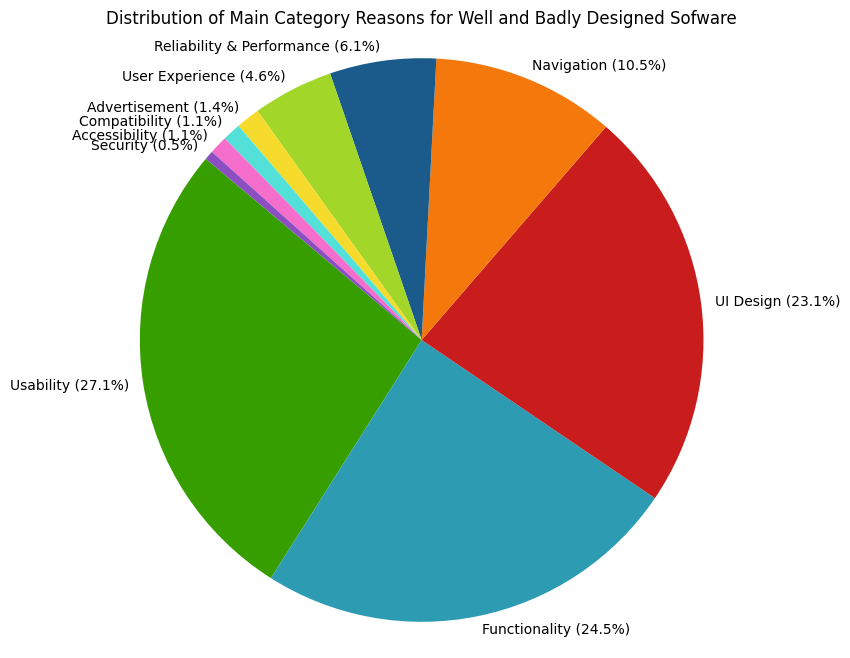

In [38]:
software_df_with_main_categories = pd.DataFrame()

for name, info in data_good_and_bad_software.items():
    software_df_with_main_categories = pd.concat([software_df_with_main_categories, add_main_categories(df_top_good_and_bad, subcategory_to_maincategory, name)], ignore_index=True)

# Count the occurrences of each main category
category_counts = software_df_with_main_categories['mainCategories'].explode().value_counts()

# Calculate the percentage for each category
percentages = category_counts / category_counts.sum() * 100

# Get colors from the custom palette based on main categories
colors = [maincategories_palette.get(category, 'gray') for category in category_counts.index]

# Create labels with main category names and percentage values
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, percentages)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(category_counts, labels=labels, startangle=140, colors=colors, labeldistance=1.05)

title = 'Distribution of Main Category Reasons for Well and Badly Designed Sofware'
plt.title(title)
plt.axis('equal')
plt.savefig(f'{title}.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


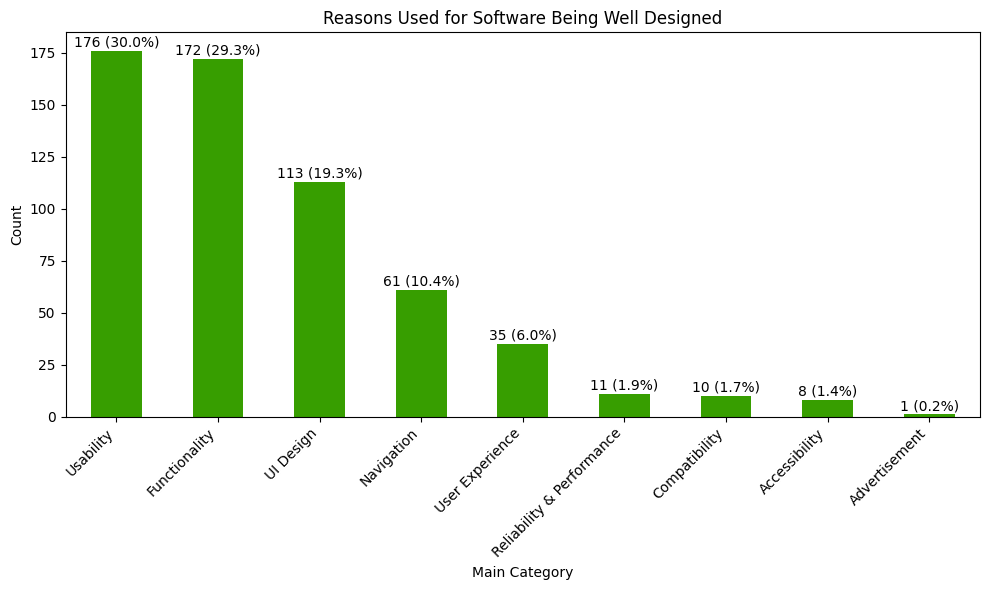

In [39]:
df_good_with_main_categories = df_top_good.copy()

# Apply the function to each row of the DataFrame
df_good_with_main_categories.loc[:, 'mainCategories'] = df_good_with_main_categories.apply(
    lambda row: [subcategory_to_maincategory[col] for col in row[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].dropna()],
    axis=1
)
plot_main_categories_counts(df_good_with_main_categories, IsGood, green)

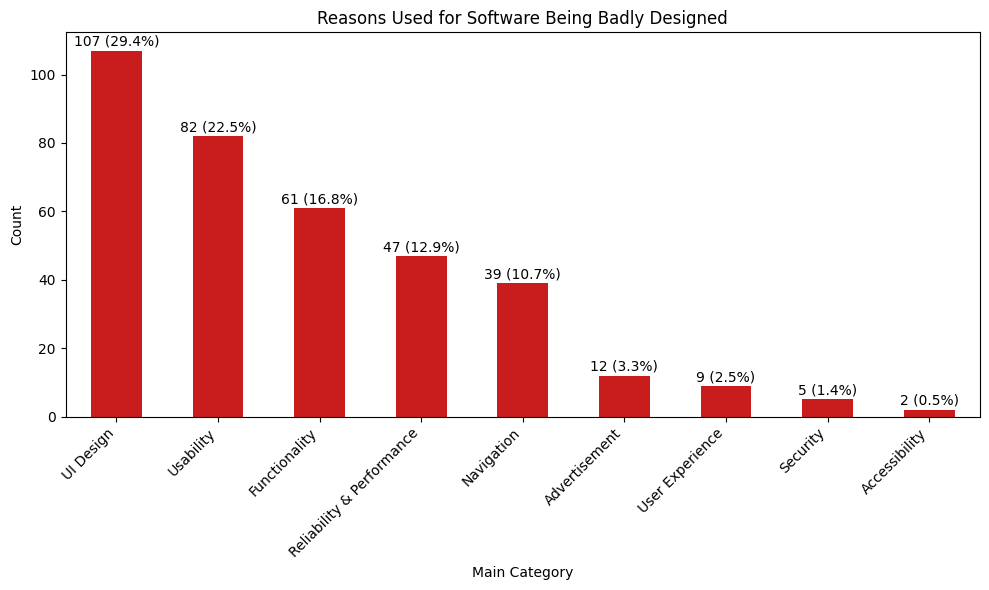

In [40]:
df_bad_with_main_categories = df_top_bad.copy()

# Apply the function to each row of the DataFrame
df_bad_with_main_categories.loc[:, 'mainCategories'] = df_bad_with_main_categories.apply(
    lambda row: [subcategory_to_maincategory[col] for col in row[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].dropna()],
    axis=1
)
plot_main_categories_counts(df_bad_with_main_categories, IsBad, red)

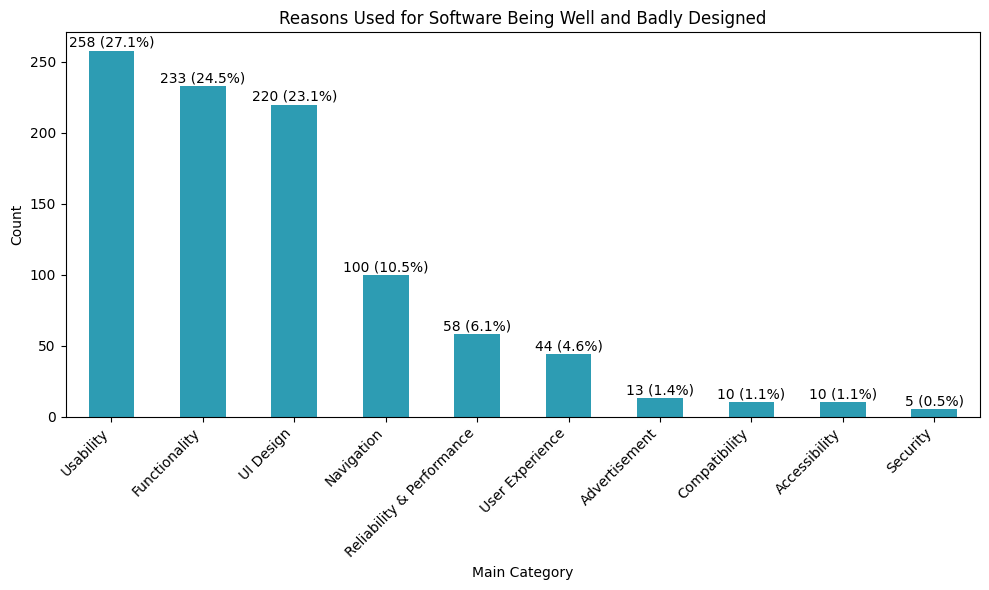

In [41]:
df_good_bad_main_categories = df_top_good_and_bad.copy()

# Apply the function to each row of the DataFrame
df_good_bad_main_categories.loc[:, 'mainCategories'] = df_good_bad_main_categories.apply(
    lambda row: [subcategory_to_maincategory[col] for col in row[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].dropna()],
    axis=1
)
plot_main_categories_counts(df_good_bad_main_categories, IsGoodAndBad, blue)

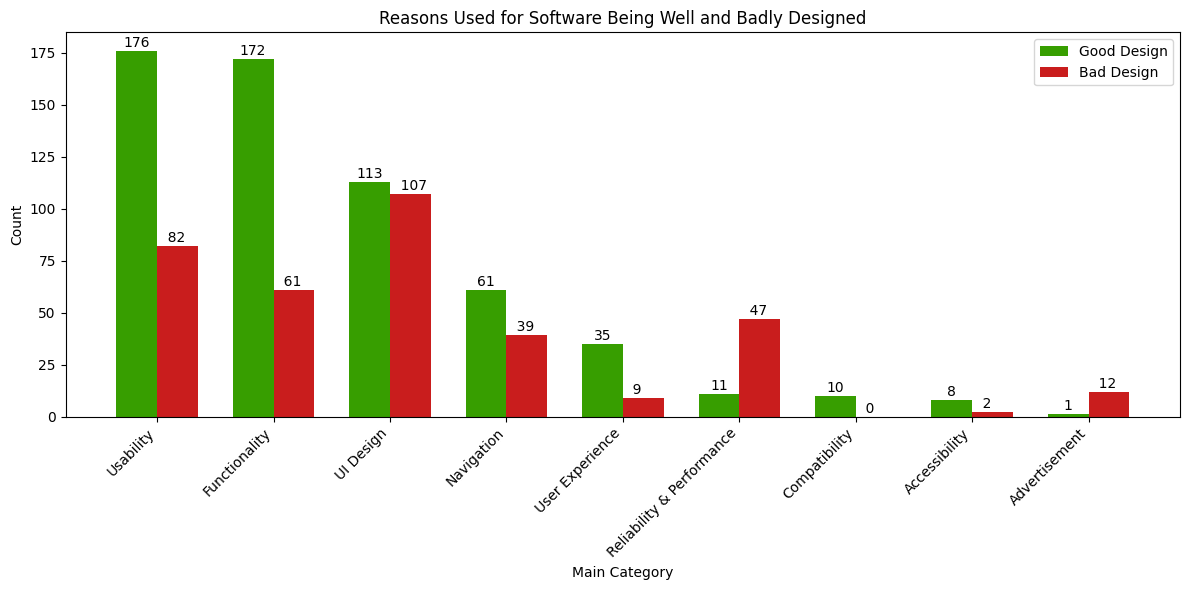

In [42]:
def plot_main_categories_counts_together(df_good, df_bad):

    # Step 1: Get value counts of mainCategories
    good_main_categories_counts = df_good['mainCategories'].explode().value_counts()
    bad_main_categories_counts =df_bad['mainCategories'].explode().value_counts()

    # Step 2: Calculate percentages
    total_apps_good = good_main_categories_counts.sum()
    good_main_categories_percentages = (good_main_categories_counts / total_apps_good) * 100

    total_apps_bad = bad_main_categories_counts.sum()
    bad_main_categories_percentages = (bad_main_categories_counts / total_apps_bad) * 100

    categories = good_main_categories_counts.index
    num_categories = len(categories)
    indices = np.arange(num_categories)
    bar_width = 0.35

    plt.figure(figsize=(12, 6))
    # Step 3: Create the bar for good and bad design
    good_bars = plt.bar(indices, good_main_categories_counts.reindex(categories, fill_value=0), bar_width, color=green, label='Good Design')
    bad_bars = plt.bar(indices + bar_width, bad_main_categories_counts.reindex(categories, fill_value=0), bar_width, color=red, label='Bad Design')

    # Step 4: Plot the values
    for index, value in enumerate(good_main_categories_counts):
        plt.text(index, value + 0.5, f"{value}", ha='center', va='bottom')

    bad_main_categories_reindex = bad_main_categories_counts.reindex(categories, fill_value=0)
    for index, value in enumerate(bad_main_categories_reindex):
        plt.text(index, value + 0.5, f"       {value}", ha='left', va='bottom') #Spacing

    plt.xlabel('Main Category')
    plt.ylabel('Count')
    plt.title('Reasons Used for Software Being Well and Badly Designed')
    plt.xticks(indices + bar_width / 2, categories, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    plt.show()

df_bad_with_main_categories
df_good_with_main_categories
plot_main_categories_counts_together(df_good_with_main_categories, df_bad_with_main_categories)


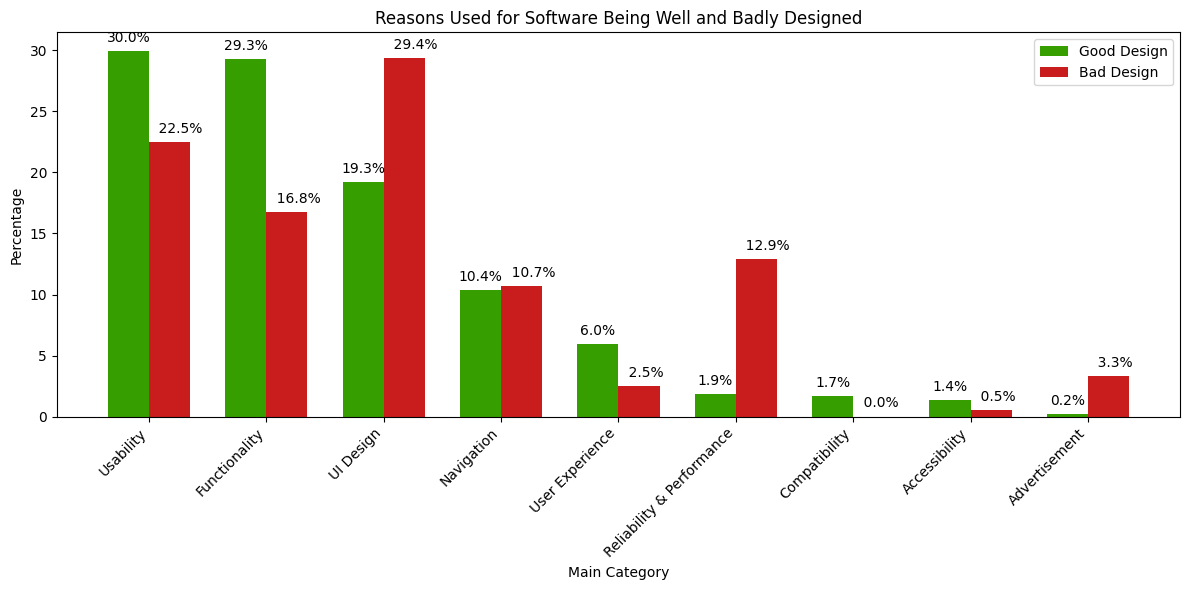

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_main_categories_percentages_together(df_good, df_bad):
    # Step 1: Get value counts of mainCategories
    good_main_categories_counts = df_good['mainCategories'].explode().value_counts()
    bad_main_categories_counts = df_bad['mainCategories'].explode().value_counts()

    # Step 2: Calculate percentages
    total_apps_good = good_main_categories_counts.sum()
    good_main_categories_percentages = (good_main_categories_counts / total_apps_good) * 100

    total_apps_bad = bad_main_categories_counts.sum()
    bad_main_categories_percentages = (bad_main_categories_counts / total_apps_bad) * 100

    categories = good_main_categories_counts.index
    num_categories = len(categories)
    indices = np.arange(num_categories)
    bar_width = 0.35

    plt.figure(figsize=(12, 6))
    # Step 3: Create the bar for good and bad design
    good_bars = plt.bar(indices, good_main_categories_percentages.reindex(categories, fill_value=0), bar_width, color=green, label='Good Design')
    bad_bars = plt.bar(indices + bar_width, bad_main_categories_percentages.reindex(categories, fill_value=0), bar_width, color=red, label='Bad Design')

    # Step 4: Plot the percentages
    for index, value in enumerate(good_main_categories_percentages):
        plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', va='bottom')

    bad_main_categories_reindex = bad_main_categories_percentages.reindex(categories, fill_value=0)
    for index, value in enumerate(bad_main_categories_reindex):
        plt.text(index, value + 0.5, f"       {value:.1f}%", ha='left', va='bottom') #Spacing

        # plt.text(index, value + 0.5, f"{value:.1f}%", ha='left', va='bottom') #Spacing

    plt.xlabel('Main Category')
    plt.ylabel('Percentage')
    plt.title('Reasons Used for Software Being Well and Badly Designed')
    plt.xticks(indices + bar_width / 2, categories, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    plt.show()

# Assuming df_bad_with_main_categories and df_good_with_main_categories are defined
plot_main_categories_percentages_together(df_good_with_main_categories, df_bad_with_main_categories)


## Sub Reasons

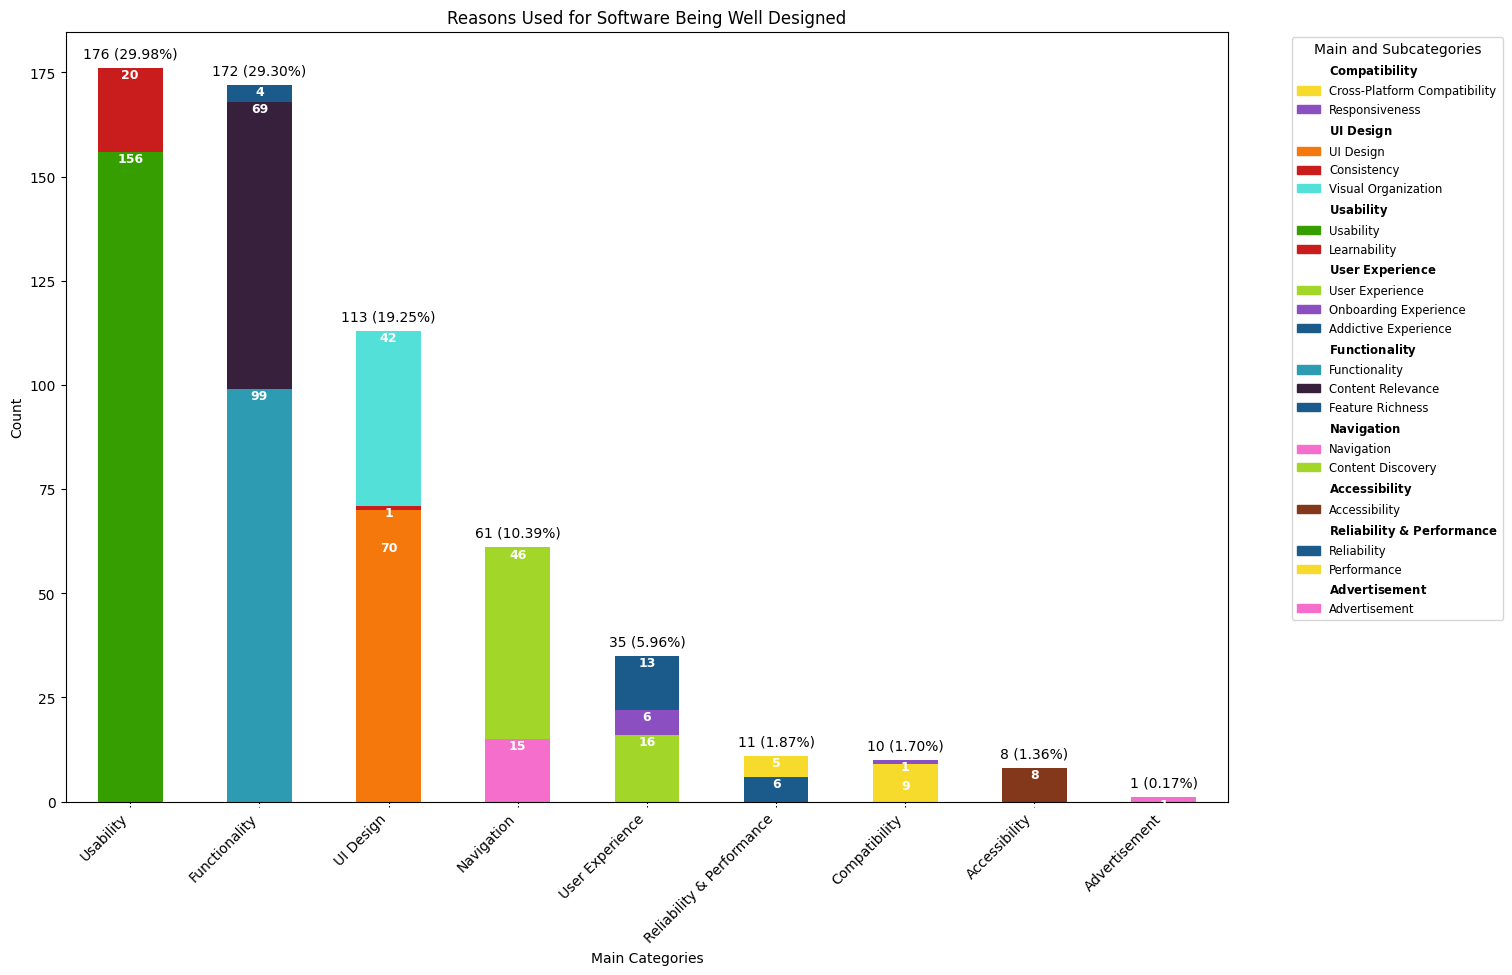

In [44]:
df_main = add_all_main_categories(df_top_good, subcategory_to_maincategory)
main_reasons = plot_main_sub_category_counts(df_main, IsGood)

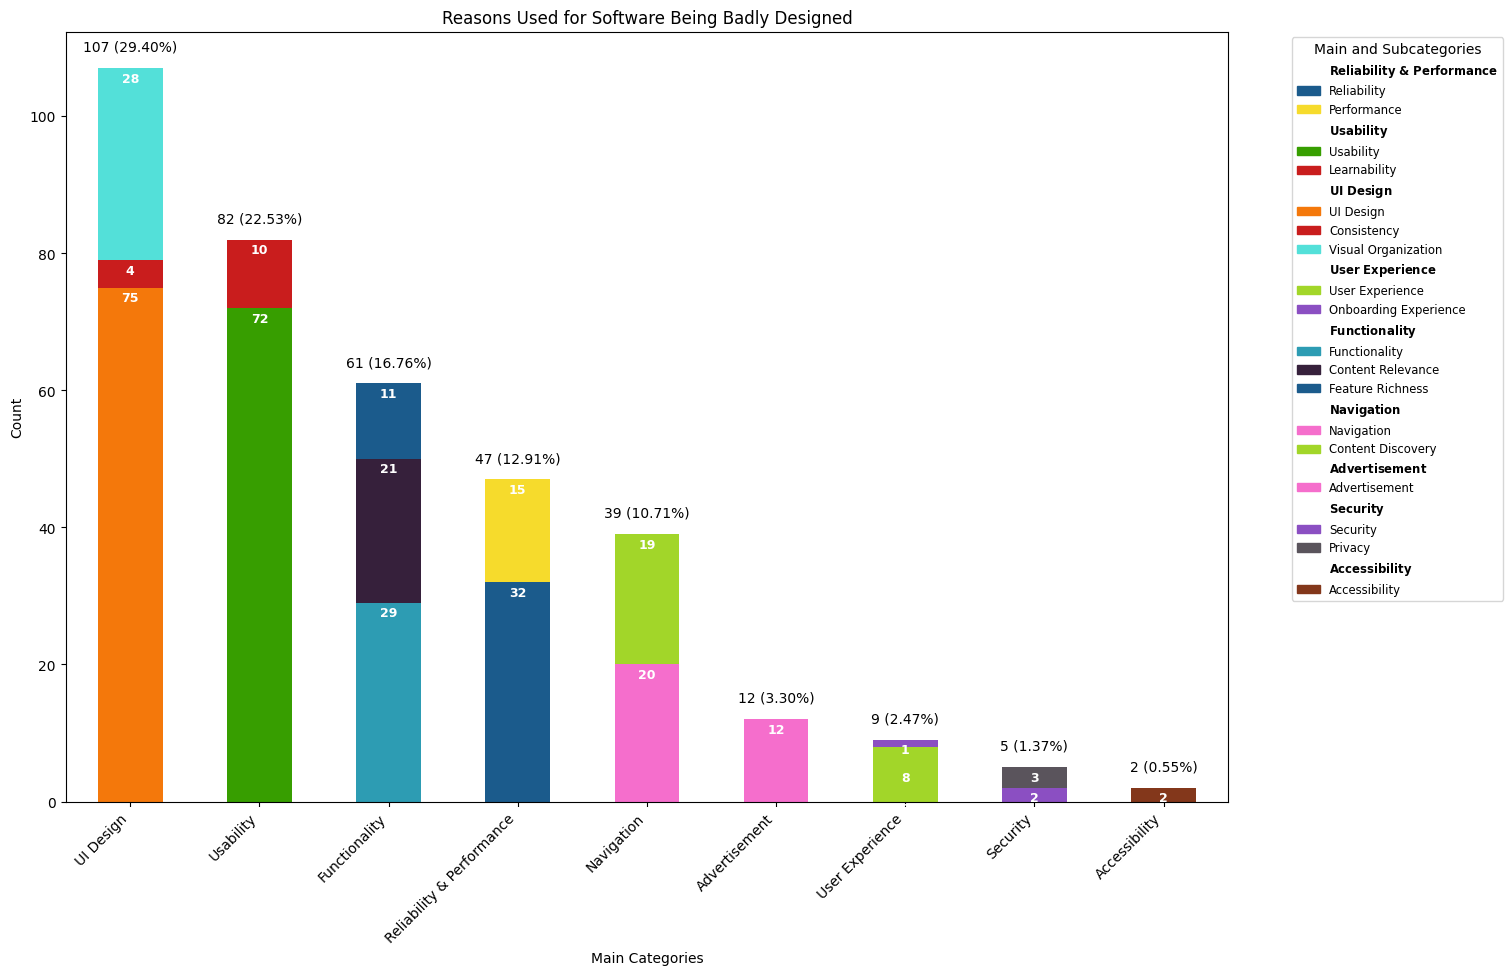

In [45]:
df_main = add_all_main_categories(df_top_bad, subcategory_to_maincategory)
main_reasons = plot_main_sub_category_counts(df_main, IsBad)

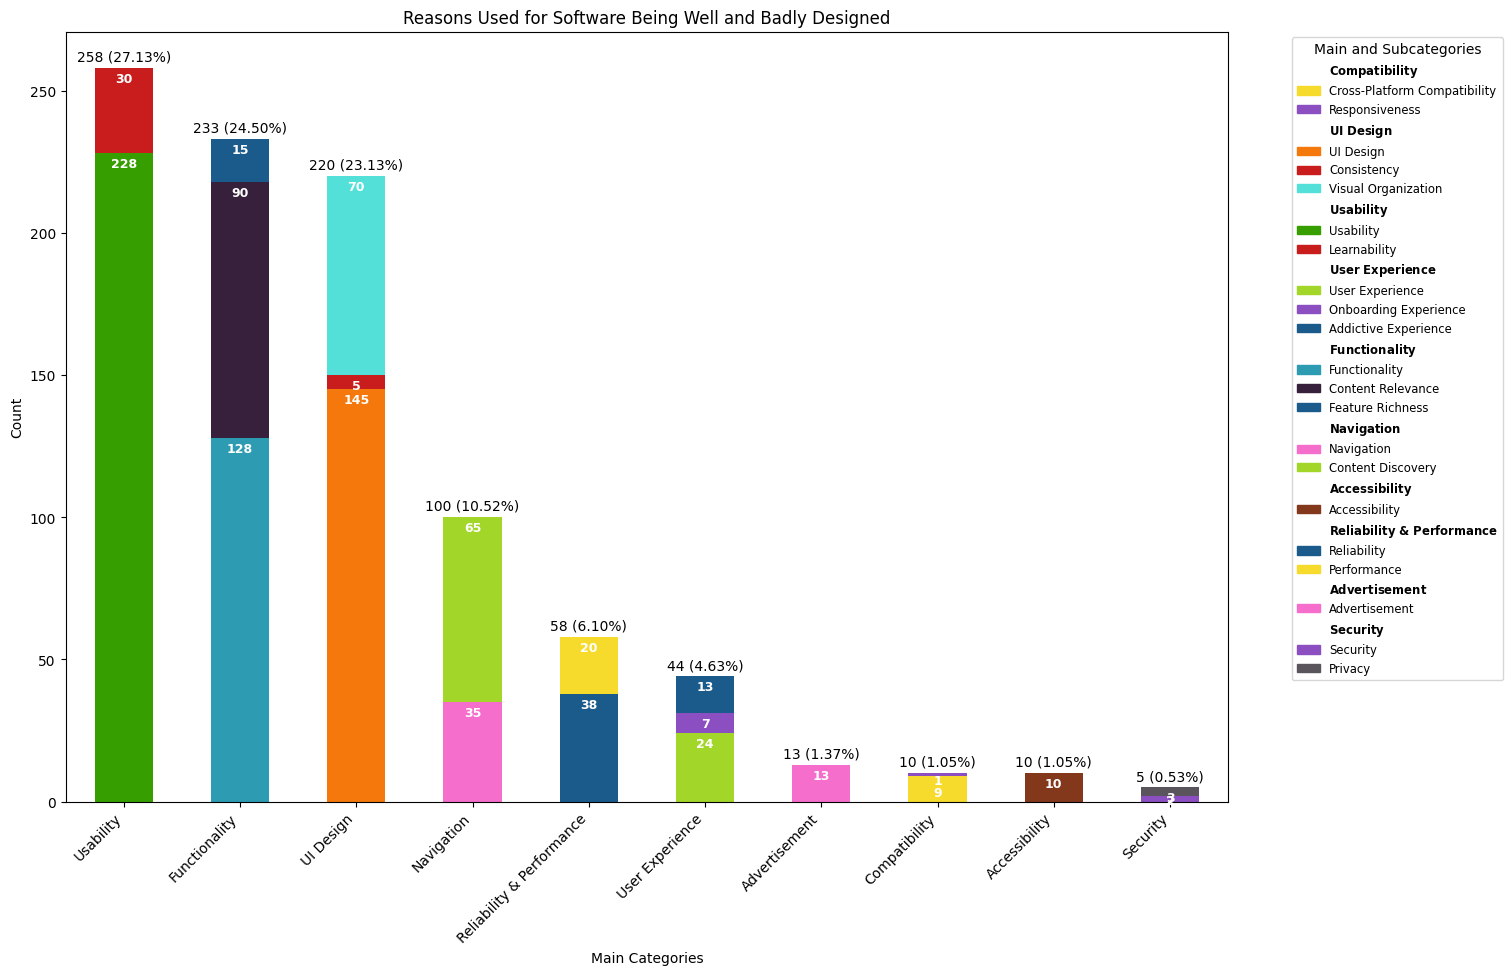

In [46]:
df_main = add_all_main_categories(df_top_good_and_bad, subcategory_to_maincategory)
main_reasons = plot_main_sub_category_counts(df_main, IsGoodAndBad)

# Filtering Data for Analysis of Reasons in Results Chapter

In [48]:
# Set pandas display options to show more content and wrap text
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Define the target reasons and software names
targets = ['Usability']  # Add more target reasons as needed

names = ["Spotify"]

# Filter the DataFrame for the specified software names and target reasons
filtered_df = df_all_good[df_all_good['softwareName'].isin(names) &
                      (df_all_good[['reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']].isin(targets).any(axis=1))]

filtered_df = filtered_df.sort_values(by='softwareName')

# Define columns to display
columns_to_display = ['softwareName', 'reasonsOriginal', 'reasonsEnglish', 'reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6']

# Apply left alignment to the DataFrame
styled_df = filtered_df[columns_to_display].style.set_properties(**{'text-align': 'left'})

# Display the DataFrame
styled_df